# Carga de datos

Importamos las librerías necesarias y cargamos el archivo Base_Videos_Final.csv

In [1]:
import pandas as pd
from IPython.display import display

# Cargar el archivo CSV
df_base_videos = pd.read_csv('Base_Videos_Final.csv')

# Mostrar las primeras filas del dataset
display(df_base_videos.head())

C:\Users\rafae\AppData\Local\Temp\ipykernel_4844\2797461691.py:5: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_base_videos = pd.read_csv('Base_Videos_Final.csv')


,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
1,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
2,2,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
3,3,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
4,4,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0


## Información del dataset

Verificamos la forma del dataset y sus columnas

In [2]:
# Información general del dataset
print(f"Forma del dataset: {df_base_videos.shape}")
print(f"\nColumnas:")
display(df_base_videos.columns.tolist())
print(f"\nInformación del dataset:")
display(df_base_videos.info())

Forma del dataset: (540300, 30)

Columnas:


['frame_idx',
 'duration',
 'total_frames',
 'video_duration',
 'player_id',
 'player_name',
 'team',
 'zone',
 'ball_position_x',
 'ball_position_y',
 'player_position_x',
 'player_position_y',
 'distance_ball_to_net',
 'distance_player_to_ball_m',
 'distance_player_to_net_m',
 'distance_player_to_teammate_m',
 'player_hits_ball',
 'prev_x',
 'prev_y',
 'player_displacement',
 'player_speed_mps',
 'prev_speed',
 'player_acceleration_mps2',
 'ball_position_x_prev',
 'ball_position_y_prev',
 'ball_displacement',
 'ball_speed_mps',
 'time_since_last_hit',
 'partido',
 'punto']


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540300 entries, 0 to 540299
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   frame_idx                      540300 non-null  int64  
 1   duration                       540300 non-null  float64
 2   total_frames                   540300 non-null  int64  
 3   video_duration                 540300 non-null  float64
 4   player_id                      540300 non-null  int64  
 5   player_name                    519424 non-null  object 
 6   team                           159382 non-null  object 
 7   zone                           540300 non-null  object 
 8   ball_position_x                540300 non-null  float64
 9   ball_position_y                540300 non-null  float64
 10  player_position_x              540300 non-null  float64
 11  player_position_y              540300 non-null  float64
 12  dist

None

## Análisis de valores nulos

Revisamos el porcentaje de valores nulos por columna

In [3]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_base_videos.isnull().sum() / len(df_base_videos) * 100).sort_values(ascending=False)
porcentaje_nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

display(porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje_Nulos'] > 0])

,Columna,Porcentaje_Nulos
0,time_since_last_hit,96.971867
1,team,70.501203
2,distance_player_to_teammate_m,52.293911
3,ball_position_x_prev,20.277068
4,ball_displacement,20.277068
5,ball_position_y_prev,20.277068
6,ball_speed_mps,20.277068
7,punto,3.863779
8,player_name,3.863779
9,prev_speed,0.963909


## Limpieza de datos

Eliminamos las filas que no tienen player_name o punto

In [4]:
# Tamaño antes de la limpieza
print(f"Tamaño original: {df_base_videos.shape}")

# Eliminar filas sin player_name o punto
df_base_videos_clean = df_base_videos.dropna(subset=['player_name', 'punto'])

# Tamaño después de la limpieza
print(f"Tamaño después de limpieza: {df_base_videos_clean.shape}")
print(f"Filas eliminadas: {len(df_base_videos) - len(df_base_videos_clean)}")

# Actualizar el dataframe principal
df_base_videos = df_base_videos_clean.copy()

Tamaño original: (540300, 30)
Tamaño después de limpieza: (519424, 30)
Filas eliminadas: 20876
Tamaño después de limpieza: (519424, 30)
Filas eliminadas: 20876


## Eliminación de jugadores genéricos

Eliminamos las filas donde el nombre del jugador es Player_x (jugadores no identificados)

In [5]:
# Verificar cuántos registros tienen Player_x como nombre
player_x_count = df_base_videos[df_base_videos['player_name'].str.contains('Player_', na=False)].shape[0]
print(f"Registros con Player_x: {player_x_count}")

# Tamaño antes de eliminar
print(f"Tamaño antes: {df_base_videos.shape}")

# Eliminar filas donde player_name contenga 'Player_'
df_base_videos = df_base_videos[~df_base_videos['player_name'].str.contains('Player_', na=False)]

# Tamaño después
print(f"Tamaño después: {df_base_videos.shape}")
print(f"Filas eliminadas: {player_x_count}")

Registros con Player_x: 192358
Tamaño antes: (519424, 30)
Tamaño después: (327066, 30)
Filas eliminadas: 192358
Tamaño después: (327066, 30)
Filas eliminadas: 192358


## Renombrar columna team a posicion_cancha

La columna team actualmente solo indica "top" o "bottom", así que la renombramos a posicion_cancha

In [6]:
# Renombrar la columna team a posicion_cancha
df_base_videos = df_base_videos.rename(columns={'team': 'posicion_cancha'})

# Verificar el cambio
display(df_base_videos[['player_name', 'posicion_cancha', 'partido', 'punto']].head(10))

,player_name,posicion_cancha,partido,punto
0,Luis Jorge Garcia Camargo,top,Partido 27,10.0
1,Luis Jorge Garcia Camargo,top,Partido 27,10.0
2,Luis Jorge Garcia Camargo,top,Partido 27,10.0
3,Luis Jorge Garcia Camargo,top,Partido 27,10.0
4,Luis Jorge Garcia Camargo,top,Partido 27,10.0
5,Luis Jorge Garcia Camargo,top,Partido 27,10.0
6,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0
7,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0
8,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0
9,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0


## Carga del archivo de levantamiento de datos

Cargamos el archivo que contiene la información de equipos y posiciones de los jugadores

In [7]:
# Cargar el archivo de levantamiento de datos
df_levantamiento = pd.read_csv('Levantamiento_datos_proyecto.csv', sep=';', encoding='latin1')

# Mostrar información básica
display(df_levantamiento.head())
print(f"\nForma del dataset: {df_levantamiento.shape}")
display(df_levantamiento.columns.tolist())

,ID_PARTIDO,CANCHA,ID_PUNTO,ID_JUGADOR_1_EQUIPO_1,ID_JUGADOR_2_EQUIPO_1,ID_JUGADOR_1_EQUIPO_2,ID_JUGADOR_2_EQUIPO_2,POSICION_JUGADOR_1_EQUIPO_1,POSICION_JUGADOR_2_EQUIPO_1,POSICION_JUGADOR_1_EQUIPO_2,POSICION_JUGADOR_2_EQUIPO_2,PUNTO_EQUIPO_1,PUNTO_EQUIPO_2
0,27,1,1,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,1,0.0
1,27,1,2,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,0,1.0
2,27,1,3,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,0,1.0
3,27,1,4,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,1,0.0
4,27,1,5,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,0,1.0



Forma del dataset: (471, 13)


['ID_PARTIDO',
 'CANCHA',
 'ID_PUNTO',
 'ID_JUGADOR_1_EQUIPO_1',
 'ID_JUGADOR_2_EQUIPO_1',
 'ID_JUGADOR_1_EQUIPO_2',
 'ID_JUGADOR_2_EQUIPO_2',
 'POSICION_JUGADOR_1_EQUIPO_1',
 'POSICION_JUGADOR_2_EQUIPO_1',
 'POSICION_JUGADOR_1_EQUIPO_2',
 'POSICION_JUGADOR_2_EQUIPO_2',
 'PUNTO_EQUIPO_1',
 'PUNTO_EQUIPO_2']

## Normalización de nombres de jugadores

Normalizamos los nombres en ambos datasets para poder hacer el merge correctamente

In [8]:
import unicodedata

def normalizar_nombre(nombre):
    """Normaliza un nombre eliminando acentos, convirtiendo a minúsculas y eliminando espacios extra"""
    if pd.isna(nombre):
        return nombre
    # Convertir a string y eliminar espacios extra
    nombre = str(nombre).strip()
    # Eliminar acentos
    nombre = ''.join(c for c in unicodedata.normalize('NFD', nombre) if unicodedata.category(c) != 'Mn')
    # Convertir a minúsculas
    nombre = nombre.lower()
    return nombre

# Normalizar nombres en df_base_videos
df_base_videos['player_name_normalized'] = df_base_videos['player_name'].apply(normalizar_nombre)

# Normalizar nombres en df_levantamiento
for col in ['ID_JUGADOR_1_EQUIPO_1', 'ID_JUGADOR_2_EQUIPO_1', 'ID_JUGADOR_1_EQUIPO_2', 'ID_JUGADOR_2_EQUIPO_2']:
    df_levantamiento[f'{col}_normalized'] = df_levantamiento[col].apply(normalizar_nombre)

# Verificar algunos ejemplos
display(df_base_videos[['player_name', 'player_name_normalized']].drop_duplicates().head(10))

,player_name,player_name_normalized
0,Luis Jorge Garcia Camargo,luis jorge garcia camargo
625,Nicole Lizarazo,nicole lizarazo
1240,Nikol sofia avendaño,nikol sofia avendano
1865,Valentina Alejandra Lopez Romero,valentina alejandra lopez romero
23839,Andrea Julieth Sosa Rodriguez,andrea julieth sosa rodriguez
25939,Valentina Jimenez Gomez,valentina jimenez gomez
43205,Jorge Enrique Lugo Lopez,jorge enrique lugo lopez
43641,María José Cifuentes,maria jose cifuentes
44513,Santiago Peña Beltran,santiago pena beltran
59801,Carlos Felipe Andrade Sáenz,carlos felipe andrade saenz


## Normalización del número de partido

En df_base_videos el partido puede estar como "Partido x" mientras que en levantamiento solo es el número

In [9]:
# Verificar formato actual de partido
display(df_base_videos['partido'].unique()[:10])

# Función para extraer el número del partido
def extraer_numero_partido(partido):
    if pd.isna(partido):
        return partido
    # Convertir a string y normalizar
    partido_str = str(partido).strip().lower()
    # Si contiene "partido", extraer el número
    if 'partido' in partido_str:
        # Extraer solo los dígitos
        import re
        numeros = re.findall(r'\d+', partido_str)
        if numeros:
            return int(numeros[0])
    # Si ya es número, devolverlo como int
    try:
        return int(partido)
    except:
        return None

# Normalizar partido en df_base_videos
df_base_videos['partido_num'] = df_base_videos['partido'].apply(extraer_numero_partido)

# Verificar el resultado
display(df_base_videos[['partido', 'partido_num']].drop_duplicates())

array(['Partido 27', 'Partido 29', 'Partido 35', '1', '11', 11, 13, 15,
       17, 19], dtype=object)

,partido,partido_num
0,Partido 27,27
23839,Partido 29,29
43205,Partido 35,35
59801,1,1
63395,11,11
65536,11,11
89332,13,13
112671,15,15
144563,17,17
163981,19,19


## Crear mapeo de jugador-equipo-posición

Creamos un diccionario que mapee cada jugador a su equipo y posición en cancha por partido y punto

In [10]:
# Crear un dataframe long format con la información de equipos
jugadores_info = []

for _, row in df_levantamiento.iterrows():
    partido = row['ID_PARTIDO']
    punto = row['ID_PUNTO']
    
    # Equipo 1
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_1_EQUIPO_1_normalized'],
        'equipo': f'match_{partido}_team_1',
        'posicion_en_equipo': row['POSICION_JUGADOR_1_EQUIPO_1']
    })
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_2_EQUIPO_1_normalized'],
        'equipo': f'match_{partido}_team_1',
        'posicion_en_equipo': row['POSICION_JUGADOR_2_EQUIPO_1']
    })
    
    # Equipo 2
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_1_EQUIPO_2_normalized'],
        'equipo': f'match_{partido}_team_2',
        'posicion_en_equipo': row['POSICION_JUGADOR_1_EQUIPO_2']
    })
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_2_EQUIPO_2_normalized'],
        'equipo': f'match_{partido}_team_2',
        'posicion_en_equipo': row['POSICION_JUGADOR_2_EQUIPO_2']
    })

df_jugadores_equipos = pd.DataFrame(jugadores_info)

# Verificar el resultado
display(df_jugadores_equipos.head(20))

,partido_num,punto,player_name_normalized,equipo,posicion_en_equipo
0,27,1,nicole lizarazo,match_27_team_1,IZQUIERDA
1,27,1,valentina alejandra lopez romero,match_27_team_1,DERECHA
2,27,1,luis jorge garcia camargo,match_27_team_2,IZQUIERDA
3,27,1,nikol sofia avendano,match_27_team_2,DERECHA
4,27,2,nicole lizarazo,match_27_team_1,IZQUIERDA
5,27,2,valentina alejandra lopez romero,match_27_team_1,DERECHA
6,27,2,luis jorge garcia camargo,match_27_team_2,IZQUIERDA
7,27,2,nikol sofia avendano,match_27_team_2,DERECHA
8,27,3,nicole lizarazo,match_27_team_1,IZQUIERDA
9,27,3,valentina alejandra lopez romero,match_27_team_1,DERECHA


## Hacer merge con el dataset principal

Unimos la información de equipos con el dataset principal usando partido, punto y nombre normalizado

In [11]:
# Hacer el merge
df_base_videos = df_base_videos.merge(
    df_jugadores_equipos,
    on=['partido_num', 'punto', 'player_name_normalized'],
    how='left'
)

# Verificar el resultado del merge
print(f"Forma después del merge: {df_base_videos.shape}")
print(f"\nValores únicos en equipo:")
display(df_base_videos['equipo'].value_counts())
print(f"\nRegistros sin equipo asignado: {df_base_videos['equipo'].isna().sum()}")

# Mostrar algunos ejemplos
display(df_base_videos[['player_name', 'equipo', 'posicion_en_equipo', 'posicion_cancha', 'partido_num', 'punto']].head(20))

Forma después del merge: (327066, 34)

Valores únicos en equipo:


equipo
match_9_team_2     13074
match_18_team_2    10527
match_18_team_1    10477
match_15_team_2    10251
match_20_team_2    10011
match_27_team_2     9826
match_27_team_1     9781
match_22_team_2     9197
match_22_team_1     8997
match_29_team_1     8951
match_29_team_2     8789
match_14_team_2     7912
match_3_team_1      7558
match_13_team_2     7536
match_36_team_1     7458
match_36_team_2     7373
match_11_team_2     7306
match_14_team_1     7200
match_28_team_1     7054
match_38_team_2     6748
match_28_team_2     6693
match_38_team_1     6675
match_12_team_1     6466
match_12_team_2     6374
match_19_team_2     6332
match_37_team_1     5963
match_35_team_1     5932
match_35_team_2     5931
match_17_team_2     5889
match_37_team_2     5662
match_21_team_2     5590
match_31_team_1     4803
match_31_team_2     4752
match_20_team_1     4606
match_23_team_2     4528
match_34_team_2     4445
match_41_team_1     4105
match_41_team_2     4052
match_1_team_2      3594
match_11_team_1   


Registros sin equipo asignado: 5837


,player_name,equipo,posicion_en_equipo,posicion_cancha,partido_num,punto
0,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
1,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
2,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
3,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
4,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
5,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
6,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0
7,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0
8,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0
9,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0


## Imputar valores faltantes de equipo y posición

Para registros sin equipo/posición, imputamos con el mismo valor de otro registro del mismo jugador y partido

In [12]:
# Para cada jugador en cada partido, el equipo y posición son constantes
# Usamos forward fill y backward fill por grupo de jugador-partido

print(f"Registros sin equipo antes de imputar: {df_base_videos['equipo'].isna().sum()}")
print(f"Registros sin posicion_en_equipo antes de imputar: {df_base_videos['posicion_en_equipo'].isna().sum()}")
print(f"Registros sin posicion_cancha antes de imputar: {df_base_videos['posicion_cancha'].isna().sum()}")

# Imputar equipo y posicion_en_equipo usando los valores conocidos del mismo jugador en el mismo partido
df_base_videos['equipo'] = df_base_videos.groupby(['player_name_normalized', 'partido_num'])['equipo'].transform(
    lambda x: x.ffill().bfill()
)

df_base_videos['posicion_en_equipo'] = df_base_videos.groupby(['player_name_normalized', 'partido_num'])['posicion_en_equipo'].transform(
    lambda x: x.ffill().bfill()
)

df_base_videos['posicion_cancha'] = df_base_videos.groupby(['player_name_normalized', 'partido_num'])['posicion_cancha'].transform(
    lambda x: x.ffill().bfill()
)

print(f"\nRegistros sin equipo después de imputar: {df_base_videos['equipo'].isna().sum()}")
print(f"Registros sin posicion_en_equipo después de imputar: {df_base_videos['posicion_en_equipo'].isna().sum()}")
print(f"Registros sin posicion_cancha después de imputar: {df_base_videos['posicion_cancha'].isna().sum()}")

# Mostrar resumen
display(df_base_videos[['player_name', 'equipo', 'posicion_en_equipo', 'posicion_cancha']].describe())

Registros sin equipo antes de imputar: 5837
Registros sin posicion_en_equipo antes de imputar: 5837
Registros sin posicion_cancha antes de imputar: 193306

Registros sin equipo después de imputar: 0
Registros sin posicion_en_equipo después de imputar: 0
Registros sin posicion_cancha después de imputar: 33842

Registros sin equipo después de imputar: 0
Registros sin posicion_en_equipo después de imputar: 0
Registros sin posicion_cancha después de imputar: 33842


C:\Users\rafae\AppData\Local\Temp\ipykernel_4844\1446287830.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.ffill().bfill()


,player_name,equipo,posicion_en_equipo,posicion_cancha
count,327066,327066,327066,293224
unique,36,54,2,2
top,María José Cifuentes,match_9_team_2,IZQUIERDA,bottom
freq,18532,13074,172802,151807


## Resumen final del procesamiento

Verificamos el estado final del dataset con todas las transformaciones aplicadas

In [13]:
# Resumen del dataset final
print("="*60)
print("RESUMEN DEL DATASET FINAL")
print("="*60)
print(f"\nForma del dataset: {df_base_videos.shape}")
print(f"\nColumnas principales:")
display(['player_name', 'equipo', 'posicion_en_equipo', 'posicion_cancha', 'partido_num', 'punto'])

print(f"\n\nEstadísticas de equipos:")
display(df_base_videos.groupby('equipo')[['player_name']].nunique().rename(columns={'player_name': 'num_jugadores'}))

print(f"\n\nEstadísticas de posiciones:")
print(f"Posiciones en equipo:")
display(df_base_videos['posicion_en_equipo'].value_counts())
print(f"\nPosiciones en cancha:")
display(df_base_videos['posicion_cancha'].value_counts())

print(f"\n\nJugadores únicos: {df_base_videos['player_name'].nunique()}")
print(f"Partidos únicos: {df_base_videos['partido_num'].nunique()}")
print(f"Equipos únicos: {df_base_videos['equipo'].nunique()}")

RESUMEN DEL DATASET FINAL

Forma del dataset: (327066, 34)

Columnas principales:


['player_name',
 'equipo',
 'posicion_en_equipo',
 'posicion_cancha',
 'partido_num',
 'punto']



Estadísticas de equipos:


,num_jugadores
equipo,
match_11_team_1,1
match_11_team_2,2
match_12_team_1,2
match_12_team_2,2
match_13_team_2,2
match_14_team_1,2
match_14_team_2,2
match_15_team_2,2
match_17_team_2,2




Estadísticas de posiciones:
Posiciones en equipo:


posicion_en_equipo
IZQUIERDA    172802
DERECHA      154264
Name: count, dtype: int64


Posiciones en cancha:


posicion_cancha
bottom    151807
top       141417
Name: count, dtype: int64



Jugadores únicos: 36
Partidos únicos: 32
Equipos únicos: 54


In [14]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_base_videos.isnull().sum() / len(df_base_videos) * 100).sort_values(ascending=False)
porcentaje_nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

display(porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje_Nulos'] > 0])

,Columna,Porcentaje_Nulos
0,time_since_last_hit,97.782405
1,distance_player_to_teammate_m,40.517204
2,ball_displacement,31.899372
3,ball_speed_mps,31.899372
4,ball_position_y_prev,31.899372
5,ball_position_x_prev,31.899372
6,posicion_cancha,10.347147
7,prev_speed,0.621281
8,player_acceleration_mps2,0.621281
9,player_speed_mps,0.310641


In [15]:
# Guardar el dataframe procesado en un archivo CSV
df_base_videos.to_csv('Base_Videos_Final_Procesado.csv', index=False)

## Imputación de distance_player_to_teammate_m

Utilizamos interpolación temporal por partido y equipo para imputar los valores faltantes de distancia entre compañeros

In [16]:
# Verificar valores nulos antes de la imputación
print(f"Valores nulos en distance_player_to_teammate_m antes: {df_base_videos['distance_player_to_teammate_m'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['distance_player_to_teammate_m'].isna().sum() / len(df_base_videos) * 100:.2f}%")

# Ordenar por partido, equipo y frame para interpolación temporal correcta
df_base_videos = df_base_videos.sort_values(['partido_num', 'equipo', 'frame_idx'])

# Aplicar interpolación temporal por grupo de partido y equipo
df_base_videos['distance_player_to_teammate_m'] = df_base_videos.groupby(['partido_num', 'equipo'])['distance_player_to_teammate_m'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# Verificar valores nulos después de la imputación
print(f"\nValores nulos en distance_player_to_teammate_m después: {df_base_videos['distance_player_to_teammate_m'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['distance_player_to_teammate_m'].isna().sum() / len(df_base_videos) * 100:.2f}%")

# Mostrar estadísticas de la variable imputada
display(df_base_videos['distance_player_to_teammate_m'].describe())

Valores nulos en distance_player_to_teammate_m antes: 132518
Porcentaje: 40.52%

Valores nulos en distance_player_to_teammate_m después: 0
Porcentaje: 0.00%


count    327066.000000
mean          5.300188
std           2.125062
min           0.000000
25%           4.136854
50%           5.474157
75%           6.526783
max          23.147162
Name: distance_player_to_teammate_m, dtype: float64

## Imputación de variables de trayectoria de la pelota

Interpolamos las posiciones de la pelota y recalculamos las variables derivadas (prev, displacement, speed) respetando límites físicos

In [17]:
# Paso 1: Verificar valores nulos antes de la interpolación
print("="*60)
print("IMPUTACIÓN DE VARIABLES DE TRAYECTORIA DE LA PELOTA")
print("="*60)
print("\nValores nulos ANTES de la interpolación:")
print(f"ball_position_x: {df_base_videos['ball_position_x'].isna().sum()} ({df_base_videos['ball_position_x'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_position_y: {df_base_videos['ball_position_y'].isna().sum()} ({df_base_videos['ball_position_y'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_position_x_prev: {df_base_videos['ball_position_x_prev'].isna().sum()} ({df_base_videos['ball_position_x_prev'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_position_y_prev: {df_base_videos['ball_position_y_prev'].isna().sum()} ({df_base_videos['ball_position_y_prev'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_displacement: {df_base_videos['ball_displacement'].isna().sum()} ({df_base_videos['ball_displacement'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_speed_mps: {df_base_videos['ball_speed_mps'].isna().sum()} ({df_base_videos['ball_speed_mps'].isna().sum() / len(df_base_videos) * 100:.2f}%)")

IMPUTACIÓN DE VARIABLES DE TRAYECTORIA DE LA PELOTA

Valores nulos ANTES de la interpolación:
ball_position_x: 0 (0.00%)
ball_position_y: 0 (0.00%)
ball_position_x_prev: 104332 (31.90%)
ball_position_y_prev: 104332 (31.90%)
ball_displacement: 104332 (31.90%)
ball_speed_mps: 104332 (31.90%)


In [18]:
# Paso 2: Interpolar las posiciones de la pelota por partido y punto
print("\n" + "="*60)
print("PASO 1: INTERPOLACIÓN DE POSICIONES")
print("="*60)

# Asegurar que está ordenado por partido, punto y frame
df_base_videos = df_base_videos.sort_values(['partido_num', 'punto', 'frame_idx'])

# Interpolar ball_position_x y ball_position_y por grupo de partido y punto
df_base_videos['ball_position_x'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_x'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

df_base_videos['ball_position_y'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_y'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

print(f"\nValores nulos después de interpolar posiciones:")
print(f"ball_position_x: {df_base_videos['ball_position_x'].isna().sum()}")
print(f"ball_position_y: {df_base_videos['ball_position_y'].isna().sum()}")


PASO 1: INTERPOLACIÓN DE POSICIONES

Valores nulos después de interpolar posiciones:
ball_position_x: 0
ball_position_y: 0

Valores nulos después de interpolar posiciones:
ball_position_x: 0
ball_position_y: 0


In [19]:
# Paso 3: Recalcular las posiciones previas con shift por partido y punto
print("\n" + "="*60)
print("PASO 2: RECALCULAR POSICIONES PREVIAS")
print("="*60)

# Calcular las posiciones previas usando shift por grupo
df_base_videos['ball_position_x_prev'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_x'].shift(1)
df_base_videos['ball_position_y_prev'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_y'].shift(1)

# Rellenar los primeros valores de cada grupo (que quedan NaN) con 0
df_base_videos['ball_position_x_prev'] = df_base_videos['ball_position_x_prev'].fillna(0)
df_base_videos['ball_position_y_prev'] = df_base_videos['ball_position_y_prev'].fillna(0)

print(f"\nValores nulos después de recalcular prev:")
print(f"ball_position_x_prev: {df_base_videos['ball_position_x_prev'].isna().sum()}")
print(f"ball_position_y_prev: {df_base_videos['ball_position_y_prev'].isna().sum()}")


PASO 2: RECALCULAR POSICIONES PREVIAS

Valores nulos después de recalcular prev:
ball_position_x_prev: 0
ball_position_y_prev: 0


In [20]:
# Paso 4: Recalcular el desplazamiento de la pelota
print("\n" + "="*60)
print("PASO 3: RECALCULAR DISPLACEMENT")
print("="*60)

import numpy as np

# Calcular el desplazamiento usando las posiciones actuales y previas
df_base_videos['ball_displacement'] = np.sqrt(
    (df_base_videos['ball_position_x'] - df_base_videos['ball_position_x_prev'])**2 +
    (df_base_videos['ball_position_y'] - df_base_videos['ball_position_y_prev'])**2
)

print(f"\nValores nulos después de recalcular displacement:")
print(f"ball_displacement: {df_base_videos['ball_displacement'].isna().sum()}")
print(f"\nEstadísticas de ball_displacement:")
display(df_base_videos['ball_displacement'].describe())


PASO 3: RECALCULAR DISPLACEMENT

Valores nulos después de recalcular displacement:
ball_displacement: 0

Estadísticas de ball_displacement:


count    327066.000000
mean          0.064861
std           0.553454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.778434
Name: ball_displacement, dtype: float64

In [21]:
# Paso 5: Recalcular la velocidad de la pelota con límites físicos
print("\n" + "="*60)
print("PASO 4: RECALCULAR VELOCIDAD CON LÍMITES FÍSICOS")
print("="*60)

# Calcular velocidad: displacement / duration
# Asumiendo que duration está en segundos
df_base_videos['ball_speed_mps'] = df_base_videos['ball_displacement'] / df_base_videos['duration']

# Aplicar límites físicos:
# Velocidad máxima de smash: ~20 m/s (72 km/h)
# Velocidad promedio: ~10-15 m/s
MAX_BALL_SPEED = 20.0  # m/s

# Identificar valores que exceden el límite
valores_exceden = (df_base_videos['ball_speed_mps'] > MAX_BALL_SPEED).sum()
print(f"\nValores que exceden {MAX_BALL_SPEED} m/s: {valores_exceden} ({valores_exceden / len(df_base_videos) * 100:.2f}%)")

# Limitar velocidades al máximo físico
df_base_videos['ball_speed_mps'] = df_base_videos['ball_speed_mps'].clip(upper=MAX_BALL_SPEED)

print(f"\nValores nulos después de recalcular speed:")
print(f"ball_speed_mps: {df_base_videos['ball_speed_mps'].isna().sum()}")
print(f"\nEstadísticas de ball_speed_mps (después de límite):")
display(df_base_videos['ball_speed_mps'].describe())


PASO 4: RECALCULAR VELOCIDAD CON LÍMITES FÍSICOS

Valores que exceden 20.0 m/s: 7652 (2.34%)

Valores nulos después de recalcular speed:
ball_speed_mps: 0

Estadísticas de ball_speed_mps (después de límite):


count    327066.000000
mean          1.196692
std           3.780181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: ball_speed_mps, dtype: float64

In [22]:
# Resumen final de la imputación de variables de la pelota
print("\n" + "="*60)
print("RESUMEN FINAL - VARIABLES DE TRAYECTORIA DE LA PELOTA")
print("="*60)

print("\nValores nulos finales:")
print(f"ball_position_x: {df_base_videos['ball_position_x'].isna().sum()}")
print(f"ball_position_y: {df_base_videos['ball_position_y'].isna().sum()}")
print(f"ball_position_x_prev: {df_base_videos['ball_position_x_prev'].isna().sum()}")
print(f"ball_position_y_prev: {df_base_videos['ball_position_y_prev'].isna().sum()}")
print(f"ball_displacement: {df_base_videos['ball_displacement'].isna().sum()}")
print(f"ball_speed_mps: {df_base_videos['ball_speed_mps'].isna().sum()}")

print("\n\nEstadísticas finales de ball_speed_mps:")
display(df_base_videos['ball_speed_mps'].describe())

print(f"\n\nRango de velocidades:")
print(f"Mínima: {df_base_videos['ball_speed_mps'].min():.2f} m/s ({df_base_videos['ball_speed_mps'].min() * 3.6:.2f} km/h)")
print(f"Máxima: {df_base_videos['ball_speed_mps'].max():.2f} m/s ({df_base_videos['ball_speed_mps'].max() * 3.6:.2f} km/h)")
print(f"Media: {df_base_videos['ball_speed_mps'].mean():.2f} m/s ({df_base_videos['ball_speed_mps'].mean() * 3.6:.2f} km/h)")
print(f"Mediana: {df_base_videos['ball_speed_mps'].median():.2f} m/s ({df_base_videos['ball_speed_mps'].median() * 3.6:.2f} km/h)")


RESUMEN FINAL - VARIABLES DE TRAYECTORIA DE LA PELOTA

Valores nulos finales:
ball_position_x: 0
ball_position_y: 0
ball_position_x_prev: 0
ball_position_y_prev: 0
ball_displacement: 0
ball_speed_mps: 0


Estadísticas finales de ball_speed_mps:


count    327066.000000
mean          1.196692
std           3.780181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: ball_speed_mps, dtype: float64



Rango de velocidades:
Mínima: 0.00 m/s (0.00 km/h)
Máxima: 20.00 m/s (72.00 km/h)
Media: 1.20 m/s (4.31 km/h)
Mediana: 0.00 m/s (0.00 km/h)


## Imputación de variables de desplazamiento del jugador

Interpolamos las posiciones del jugador y recalculamos las variables derivadas (prev, displacement, speed, acceleration) respetando límites físicos

In [23]:
# Paso 1: Verificar valores nulos antes de la interpolación
print("="*60)
print("IMPUTACIÓN DE VARIABLES DE DESPLAZAMIENTO DEL JUGADOR")
print("="*60)
print("\nValores nulos ANTES de la interpolación:")
print(f"player_position_x: {df_base_videos['player_position_x'].isna().sum()} ({df_base_videos['player_position_x'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_position_y: {df_base_videos['player_position_y'].isna().sum()} ({df_base_videos['player_position_y'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"prev_x: {df_base_videos['prev_x'].isna().sum()} ({df_base_videos['prev_x'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"prev_y: {df_base_videos['prev_y'].isna().sum()} ({df_base_videos['prev_y'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_displacement: {df_base_videos['player_displacement'].isna().sum()} ({df_base_videos['player_displacement'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_speed_mps: {df_base_videos['player_speed_mps'].isna().sum()} ({df_base_videos['player_speed_mps'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"prev_speed: {df_base_videos['prev_speed'].isna().sum()} ({df_base_videos['prev_speed'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_acceleration_mps2: {df_base_videos['player_acceleration_mps2'].isna().sum()} ({df_base_videos['player_acceleration_mps2'].isna().sum() / len(df_base_videos) * 100:.2f}%)")

IMPUTACIÓN DE VARIABLES DE DESPLAZAMIENTO DEL JUGADOR

Valores nulos ANTES de la interpolación:
player_position_x: 0 (0.00%)
player_position_y: 0 (0.00%)
prev_x: 1016 (0.31%)
prev_y: 1016 (0.31%)
player_displacement: 1016 (0.31%)
player_speed_mps: 1016 (0.31%)
prev_speed: 2032 (0.62%)
player_acceleration_mps2: 2032 (0.62%)


In [24]:
# Paso 2: Interpolar las posiciones del jugador por partido, jugador y punto
print("\n" + "="*60)
print("PASO 1: INTERPOLACIÓN DE POSICIONES DEL JUGADOR")
print("="*60)

# Interpolar player_position_x y player_position_y por grupo de partido, jugador y punto
df_base_videos['player_position_x'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_x'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

df_base_videos['player_position_y'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_y'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

print(f"\nValores nulos después de interpolar posiciones:")
print(f"player_position_x: {df_base_videos['player_position_x'].isna().sum()}")
print(f"player_position_y: {df_base_videos['player_position_y'].isna().sum()}")


PASO 1: INTERPOLACIÓN DE POSICIONES DEL JUGADOR

Valores nulos después de interpolar posiciones:
player_position_x: 0
player_position_y: 0

Valores nulos después de interpolar posiciones:
player_position_x: 0
player_position_y: 0


In [25]:
# Paso 3: Recalcular las posiciones previas con shift por partido, jugador y punto
print("\n" + "="*60)
print("PASO 2: RECALCULAR POSICIONES PREVIAS DEL JUGADOR")
print("="*60)

# Calcular las posiciones previas usando shift por grupo
df_base_videos['prev_x'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_x'].shift(1)
df_base_videos['prev_y'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_y'].shift(1)

# Rellenar los primeros valores de cada grupo (que quedan NaN) con 0
df_base_videos['prev_x'] = df_base_videos['prev_x'].fillna(0)
df_base_videos['prev_y'] = df_base_videos['prev_y'].fillna(0)

print(f"\nValores nulos después de recalcular prev:")
print(f"prev_x: {df_base_videos['prev_x'].isna().sum()}")
print(f"prev_y: {df_base_videos['prev_y'].isna().sum()}")


PASO 2: RECALCULAR POSICIONES PREVIAS DEL JUGADOR

Valores nulos después de recalcular prev:
prev_x: 0
prev_y: 0


In [26]:
# Paso 4: Recalcular el desplazamiento del jugador
print("\n" + "="*60)
print("PASO 3: RECALCULAR DISPLACEMENT DEL JUGADOR")
print("="*60)

# Calcular el desplazamiento usando las posiciones actuales y previas
df_base_videos['player_displacement'] = np.sqrt(
    (df_base_videos['player_position_x'] - df_base_videos['prev_x'])**2 +
    (df_base_videos['player_position_y'] - df_base_videos['prev_y'])**2
)

print(f"\nValores nulos después de recalcular displacement:")
print(f"player_displacement: {df_base_videos['player_displacement'].isna().sum()}")
print(f"\nEstadísticas de player_displacement:")
display(df_base_videos['player_displacement'].describe())


PASO 3: RECALCULAR DISPLACEMENT DEL JUGADOR

Valores nulos después de recalcular displacement:
player_displacement: 0

Estadísticas de player_displacement:


count    327066.000000
mean          0.063759
std           0.562918
min           0.000000
25%           0.000000
50%           0.000000
75%           0.056569
max          17.988797
Name: player_displacement, dtype: float64

In [27]:
# Paso 5: Recalcular la velocidad del jugador con límites físicos
print("\n" + "="*60)
print("PASO 4: RECALCULAR VELOCIDAD DEL JUGADOR CON LÍMITES FÍSICOS")
print("="*60)

# Calcular velocidad: displacement / duration
df_base_videos['player_speed_mps'] = df_base_videos['player_displacement'] / df_base_videos['duration']

# Aplicar límites físicos:
# Velocidad máxima del jugador: ~15 km/h = ~4.17 m/s
MAX_PLAYER_SPEED = 4.17  # m/s (≈15 km/h)

# Identificar valores que exceden el límite
valores_exceden_speed = (df_base_videos['player_speed_mps'] > MAX_PLAYER_SPEED).sum()
print(f"\nValores que exceden {MAX_PLAYER_SPEED} m/s: {valores_exceden_speed} ({valores_exceden_speed / len(df_base_videos) * 100:.2f}%)")

# Limitar velocidades al máximo físico
df_base_videos['player_speed_mps'] = df_base_videos['player_speed_mps'].clip(upper=MAX_PLAYER_SPEED)

print(f"\nValores nulos después de recalcular speed:")
print(f"player_speed_mps: {df_base_videos['player_speed_mps'].isna().sum()}")
print(f"\nEstadísticas de player_speed_mps (después de límite):")
display(df_base_videos['player_speed_mps'].describe())


PASO 4: RECALCULAR VELOCIDAD DEL JUGADOR CON LÍMITES FÍSICOS

Valores que exceden 4.17 m/s: 10681 (3.27%)

Valores nulos después de recalcular speed:
player_speed_mps: 0

Estadísticas de player_speed_mps (después de límite):


count    327066.000000
mean          0.710951
std           1.298654
min           0.000000
25%           0.000000
50%           0.000000
75%           1.697056
max           4.170000
Name: player_speed_mps, dtype: float64

In [28]:
# Paso 6: Recalcular prev_speed y aceleración del jugador con límites físicos
print("\n" + "="*60)
print("PASO 5: RECALCULAR PREV_SPEED Y ACELERACIÓN CON LÍMITES")
print("="*60)

# Calcular la velocidad previa usando shift por grupo
df_base_videos['prev_speed'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_speed_mps'].shift(1)

# Rellenar los primeros valores de cada grupo con 0
df_base_videos['prev_speed'] = df_base_videos['prev_speed'].fillna(0)

# Calcular aceleración: (speed - prev_speed) / duration
df_base_videos['player_acceleration_mps2'] = (df_base_videos['player_speed_mps'] - df_base_videos['prev_speed']) / df_base_videos['duration']

# Aplicar límites físicos:
# Aceleración máxima del jugador: ~4.5-4.7 m/s²
MAX_PLAYER_ACCELERATION = 4.7  # m/s²
MIN_PLAYER_ACCELERATION = -4.7  # m/s² (desaceleración)

# Identificar valores que exceden el límite
valores_exceden_acc = ((df_base_videos['player_acceleration_mps2'] > MAX_PLAYER_ACCELERATION) | 
                       (df_base_videos['player_acceleration_mps2'] < MIN_PLAYER_ACCELERATION)).sum()
print(f"\nValores que exceden ±{MAX_PLAYER_ACCELERATION} m/s²: {valores_exceden_acc} ({valores_exceden_acc / len(df_base_videos) * 100:.2f}%)")

# Limitar aceleraciones al máximo físico
df_base_videos['player_acceleration_mps2'] = df_base_videos['player_acceleration_mps2'].clip(
    lower=MIN_PLAYER_ACCELERATION, 
    upper=MAX_PLAYER_ACCELERATION
)

print(f"\nValores nulos después de recalcular prev_speed y aceleración:")
print(f"prev_speed: {df_base_videos['prev_speed'].isna().sum()}")
print(f"player_acceleration_mps2: {df_base_videos['player_acceleration_mps2'].isna().sum()}")
print(f"\nEstadísticas de player_acceleration_mps2 (después de límite):")
display(df_base_videos['player_acceleration_mps2'].describe())


PASO 5: RECALCULAR PREV_SPEED Y ACELERACIÓN CON LÍMITES

Valores que exceden ±4.7 m/s²: 108089 (33.05%)

Valores nulos después de recalcular prev_speed y aceleración:
prev_speed: 0
player_acceleration_mps2: 0

Estadísticas de player_acceleration_mps2 (después de límite):

Valores que exceden ±4.7 m/s²: 108089 (33.05%)

Valores nulos después de recalcular prev_speed y aceleración:
prev_speed: 0
player_acceleration_mps2: 0

Estadísticas de player_acceleration_mps2 (después de límite):


count    327066.000000
mean         -0.004412
std           2.701911
min          -4.700000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.700000
Name: player_acceleration_mps2, dtype: float64

In [29]:
# Resumen final de la imputación de variables del jugador
print("\n" + "="*60)
print("RESUMEN FINAL - VARIABLES DE DESPLAZAMIENTO DEL JUGADOR")
print("="*60)

print("\nValores nulos finales:")
print(f"player_position_x: {df_base_videos['player_position_x'].isna().sum()}")
print(f"player_position_y: {df_base_videos['player_position_y'].isna().sum()}")
print(f"prev_x: {df_base_videos['prev_x'].isna().sum()}")
print(f"prev_y: {df_base_videos['prev_y'].isna().sum()}")
print(f"player_displacement: {df_base_videos['player_displacement'].isna().sum()}")
print(f"player_speed_mps: {df_base_videos['player_speed_mps'].isna().sum()}")
print(f"prev_speed: {df_base_videos['prev_speed'].isna().sum()}")
print(f"player_acceleration_mps2: {df_base_videos['player_acceleration_mps2'].isna().sum()}")

print("\n\nEstadísticas finales de player_speed_mps:")
display(df_base_videos['player_speed_mps'].describe())

print(f"\n\nRango de velocidades:")
print(f"Mínima: {df_base_videos['player_speed_mps'].min():.2f} m/s ({df_base_videos['player_speed_mps'].min() * 3.6:.2f} km/h)")
print(f"Máxima: {df_base_videos['player_speed_mps'].max():.2f} m/s ({df_base_videos['player_speed_mps'].max() * 3.6:.2f} km/h)")
print(f"Media: {df_base_videos['player_speed_mps'].mean():.2f} m/s ({df_base_videos['player_speed_mps'].mean() * 3.6:.2f} km/h)")
print(f"Mediana: {df_base_videos['player_speed_mps'].median():.2f} m/s ({df_base_videos['player_speed_mps'].median() * 3.6:.2f} km/h)")

print("\n\nEstadísticas finales de player_acceleration_mps2:")
display(df_base_videos['player_acceleration_mps2'].describe())

print(f"\n\nRango de aceleraciones:")
print(f"Mínima: {df_base_videos['player_acceleration_mps2'].min():.2f} m/s²")
print(f"Máxima: {df_base_videos['player_acceleration_mps2'].max():.2f} m/s²")
print(f"Media: {df_base_videos['player_acceleration_mps2'].mean():.2f} m/s²")
print(f"Mediana: {df_base_videos['player_acceleration_mps2'].median():.2f} m/s²")


RESUMEN FINAL - VARIABLES DE DESPLAZAMIENTO DEL JUGADOR

Valores nulos finales:
player_position_x: 0
player_position_y: 0
prev_x: 0
prev_y: 0
player_displacement: 0
player_speed_mps: 0
prev_speed: 0
player_acceleration_mps2: 0


Estadísticas finales de player_speed_mps:


count    327066.000000
mean          0.710951
std           1.298654
min           0.000000
25%           0.000000
50%           0.000000
75%           1.697056
max           4.170000
Name: player_speed_mps, dtype: float64



Rango de velocidades:
Mínima: 0.00 m/s (0.00 km/h)
Máxima: 4.17 m/s (15.01 km/h)
Media: 0.71 m/s (2.56 km/h)
Mediana: 0.00 m/s (0.00 km/h)


Estadísticas finales de player_acceleration_mps2:


count    327066.000000
mean         -0.004412
std           2.701911
min          -4.700000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.700000
Name: player_acceleration_mps2, dtype: float64



Rango de aceleraciones:
Mínima: -4.70 m/s²
Máxima: 4.70 m/s²
Media: -0.00 m/s²
Mediana: 0.00 m/s²


In [30]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_base_videos.isnull().sum() / len(df_base_videos) * 100).sort_values(ascending=False)
porcentaje_nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

display(porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje_Nulos'] > 0])

,Columna,Porcentaje_Nulos
0,time_since_last_hit,97.782405
1,posicion_cancha,10.347147


In [31]:
df_base_videos['posicion_cancha'] = df_base_videos['posicion_cancha'].fillna('Desconocida')

## Recalcular time_since_last_hit

Calculamos el tiempo transcurrido desde el último golpe usando la variable player_hits_ball

In [32]:
# Verificar valores nulos y estadísticas antes del recalculo
print("="*60)
print("RECÁLCULO DE TIME_SINCE_LAST_HIT")
print("="*60)
print(f"\nValores nulos en time_since_last_hit antes: {df_base_videos['time_since_last_hit'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['time_since_last_hit'].isna().sum() / len(df_base_videos) * 100:.2f}%")

print(f"\nValores únicos en player_hits_ball:")
display(df_base_videos['player_hits_ball'].value_counts())

print(f"\nRegistros donde el jugador golpea la pelota: {(df_base_videos['player_hits_ball'] == 1).sum()}")
print(f"Porcentaje: {(df_base_videos['player_hits_ball'] == 1).sum() / len(df_base_videos) * 100:.2f}%")

RECÁLCULO DE TIME_SINCE_LAST_HIT

Valores nulos en time_since_last_hit antes: 319813
Porcentaje: 97.78%

Valores únicos en player_hits_ball:


player_hits_ball
False    324260
True       2806
Name: count, dtype: int64


Registros donde el jugador golpea la pelota: 2806
Porcentaje: 0.86%


In [33]:
# Asegurar que el dataframe está ordenado por partido, punto y frame
df_base_videos = df_base_videos.sort_values(['partido_num', 'punto', 'frame_idx'])

# Crear una columna auxiliar para identificar cuándo hay un golpe
# Acumular el tiempo desde el último golpe por partido y punto
def calcular_time_since_last_hit(group):
    """
    Para cada grupo (partido, punto), calcula el tiempo transcurrido desde el último golpe
    """
    # Inicializar con NaN
    time_since_hit = pd.Series(index=group.index, dtype=float)
    
    # Encontrar los índices donde hay golpes
    hit_indices = group[group['player_hits_ball'] == 1].index
    
    if len(hit_indices) == 0:
        # Si no hay golpes en este punto, llenar con NaN o con el tiempo acumulado total
        time_since_hit[:] = (group['duration'].cumsum()).values
    else:
        # Calcular tiempo acumulado desde el inicio
        cumulative_time = group['duration'].cumsum()
        
        # Para cada frame, encontrar el tiempo desde el último golpe
        last_hit_time = 0
        last_hit_idx = None
        
        for idx in group.index:
            current_time = cumulative_time.loc[idx]
            
            # Si este frame tiene un golpe, resetear el tiempo
            if group.loc[idx, 'player_hits_ball'] == 1:
                time_since_hit.loc[idx] = 0
                last_hit_time = current_time
                last_hit_idx = idx
            else:
                # Calcular tiempo desde el último golpe
                if last_hit_idx is not None:
                    time_since_hit.loc[idx] = current_time - last_hit_time
                else:
                    # Si aún no ha habido golpes, usar el tiempo acumulado
                    time_since_hit.loc[idx] = current_time
    
    return time_since_hit

# Aplicar la función por grupo de partido y punto
print("\nCalculando time_since_last_hit...")
df_base_videos['time_since_last_hit'] = df_base_videos.groupby(['partido_num', 'punto']).apply(
    calcular_time_since_last_hit
).reset_index(level=[0, 1], drop=True)

print("Cálculo completado.")


Calculando time_since_last_hit...
Cálculo completado.
Cálculo completado.


C:\Users\rafae\AppData\Local\Temp\ipykernel_4844\2916591670.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_base_videos['time_since_last_hit'] = df_base_videos.groupby(['partido_num', 'punto']).apply(


In [34]:
# Verificar resultados después del recálculo
print("\n" + "="*60)
print("RESULTADOS DEL RECÁLCULO")
print("="*60)

print(f"\nValores nulos en time_since_last_hit después: {df_base_videos['time_since_last_hit'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['time_since_last_hit'].isna().sum() / len(df_base_videos) * 100:.2f}%")

print(f"\nEstadísticas de time_since_last_hit:")
display(df_base_videos['time_since_last_hit'].describe())

# Mostrar algunos ejemplos de frames con golpes y sus tiempos
print(f"\n\nEjemplos de frames con golpes (time_since_last_hit = 0):")
display(df_base_videos[df_base_videos['player_hits_ball'] == 1][
    ['partido_num', 'punto', 'frame_idx', 'player_name', 'player_hits_ball', 'time_since_last_hit', 'duration']
].head(10))

print(f"\n\nEjemplos de frames sin golpes (con tiempo acumulado):")
display(df_base_videos[df_base_videos['player_hits_ball'] == 0][
    ['partido_num', 'punto', 'frame_idx', 'player_name', 'player_hits_ball', 'time_since_last_hit', 'duration']
].head(10))


RESULTADOS DEL RECÁLCULO

Valores nulos en time_since_last_hit después: 0
Porcentaje: 0.00%

Estadísticas de time_since_last_hit:


count    327066.000000
mean          8.160215
std          11.548153
min           0.000000
25%           1.333333
50%           4.033333
75%          10.100000
max         100.733333
Name: time_since_last_hit, dtype: float64



Ejemplos de frames con golpes (time_since_last_hit = 0):


,partido_num,punto,frame_idx,player_name,player_hits_ball,time_since_last_hit,duration
49494,1,1.0,451,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49504,1,1.0,461,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49516,1,1.0,473,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49517,1,1.0,474,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49518,1,1.0,475,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50579,1,3.0,25,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50580,1,3.0,26,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50582,1,3.0,28,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50583,1,3.0,29,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50584,1,3.0,30,Carlos Felipe Andrade Sáenz,True,0.0,0.033333




Ejemplos de frames sin golpes (con tiempo acumulado):


,partido_num,punto,frame_idx,player_name,player_hits_ball,time_since_last_hit,duration
49210,1,1.0,0,Carlos Felipe Andrade Sáenz,False,0.033333,0.033333
49707,1,1.0,0,Santiago Navarro Cuy,False,0.066667,0.033333
49211,1,1.0,1,Carlos Felipe Andrade Sáenz,False,0.100000,0.033333
49708,1,1.0,1,Santiago Navarro Cuy,False,0.133333,0.033333
49212,1,1.0,2,Carlos Felipe Andrade Sáenz,False,0.166667,0.033333
49709,1,1.0,2,Santiago Navarro Cuy,False,0.200000,0.033333
49213,1,1.0,3,Carlos Felipe Andrade Sáenz,False,0.233333,0.033333
49710,1,1.0,3,Santiago Navarro Cuy,False,0.266667,0.033333
49214,1,1.0,4,Carlos Felipe Andrade Sáenz,False,0.300000,0.033333
49711,1,1.0,4,Santiago Navarro Cuy,False,0.333333,0.033333


## Agregación de variables por jugador-partido

Creamos un dataset agregado con las variables más importantes a nivel jugador-partido para modelado

In [35]:
# Crear variable auxiliar para zona ofensiva/defensiva
# Asumiendo que 'zone' contiene información de ataque/defensa
# Si zone no existe o tiene otro formato, ajustar según sea necesario

print("="*60)
print("AGREGACIÓN POR JUGADOR-PARTIDO")
print("="*60)

# Verificar las columnas disponibles relacionadas con zona
print("\nColumnas relacionadas con zona:")
zone_cols = [col for col in df_base_videos.columns if 'zone' in col.lower()]
display(zone_cols)

# Si existe la columna zone, verificar sus valores
if 'zone' in df_base_videos.columns:
    print("\nValores únicos en zone:")
    display(df_base_videos['zone'].value_counts())
else:
    print("\nNota: La columna 'zone' no está disponible")

AGREGACIÓN POR JUGADOR-PARTIDO

Columnas relacionadas con zona:


['zone']


Valores únicos en zone:


zone
left_box      137265
right_box     135899
back_court     53902
Name: count, dtype: int64

In [36]:
# Crear variables derivadas necesarias para la agregación

# 1. Variable para frames con distancia a pelota < 2m
df_base_videos['near_ball'] = (df_base_videos['distance_player_to_ball_m'] < 2).astype(int)

# 2. Si existe zone, crear variable binaria para zona ofensiva
if 'zone' in df_base_videos.columns:
    # Ajustar según los valores reales de zone
    df_base_videos['in_offensive_zone'] = df_base_videos['zone'].str.contains('attack|offensive', case=False, na=False).astype(int)
    df_base_videos['in_defensive_zone'] = df_base_videos['zone'].str.contains('defense|defensive', case=False, na=False).astype(int)
else:
    # Si no existe zone, crear valores nulos o estimarlos basados en distancia a la red
    # Zona ofensiva: cerca de la red (< 3m por ejemplo)
    df_base_videos['in_offensive_zone'] = (df_base_videos['distance_player_to_net_m'] < 3).astype(int)
    df_base_videos['in_defensive_zone'] = (df_base_videos['distance_player_to_net_m'] >= 3).astype(int)

print("Variables derivadas creadas exitosamente.")

Variables derivadas creadas exitosamente.


In [37]:
# Crear dataset agregado por jugador-partido
agg_dict = {
    # 1. Velocidad media del jugador
    'player_speed_mps': ['mean', lambda x: x.quantile(0.90), 'std'],
    
    # 3. Distancia total recorrida
    'player_displacement': ['sum', 'mean', 'std'],
    
    # 4. Distancia media a la pelota (y mínima)
    'distance_player_to_ball_m': ['mean', 'min'],
    
    # 5. Distancia media a la red
    'distance_player_to_net_m': 'mean',
    
    # 6. Distancia media al compañero
    'distance_player_to_teammate_m': 'mean',
    
    # 8. Número de golpes (hits)
    'player_hits_ball': 'sum',
    
    # 9. Tiempo promedio desde último golpe
    'time_since_last_hit': 'mean',
    
    # 11. Aceleración media
    'player_acceleration_mps2': ['mean', 'std'],
    
    # 12. Duración total
    'duration': 'sum',
    
    # Variables derivadas
    'near_ball': 'sum',  # Para calcular % frames cerca de pelota
    'in_offensive_zone': 'sum',  # Para calcular % tiempo en zona ofensiva
    'in_defensive_zone': 'sum'  # Para calcular tiempo en zona defensiva
}

# Realizar la agregación
df_player_partido = df_base_videos.groupby(['player_name_normalized', 'partido_num']).agg(agg_dict)

# Aplanar columnas multi-nivel
df_player_partido.columns = ['_'.join(col).strip('_') if col[1] else col[0] 
                              for col in df_player_partido.columns.values]

# Renombrar columnas para mayor claridad
rename_dict = {
    'player_speed_mps_mean': 'velocidad_media_mps',
    'player_speed_mps_<lambda>': 'velocidad_p90_mps',
    'player_speed_mps_std': 'velocidad_std_mps',
    'player_displacement_sum': 'distancia_total_m',
    'player_displacement_mean': 'distancia_media_por_frame_m',
    'player_displacement_std': 'desplazamiento_std_m',
    'distance_player_to_ball_m_mean': 'distancia_media_pelota_m',
    'distance_player_to_ball_m_min': 'distancia_min_pelota_m',
    'distance_player_to_net_m_mean': 'distancia_media_red_m',
    'distance_player_to_teammate_m_mean': 'distancia_media_companero_m',
    'player_hits_ball_sum': 'num_golpes',
    'time_since_last_hit_mean': 'tiempo_promedio_desde_ultimo_golpe_s',
    'player_acceleration_mps2_mean': 'aceleracion_media_mps2',
    'player_acceleration_mps2_std': 'aceleracion_std_mps2',
    'duration_sum': 'duracion_total_s',
    'near_ball_sum': 'frames_cerca_pelota',
    'in_offensive_zone_sum': 'frames_zona_ofensiva',
    'in_defensive_zone_sum': 'frames_zona_defensiva'
}

df_player_partido.rename(columns=rename_dict, inplace=True)

# Calcular variables derivadas adicionales
# Total de frames por jugador-partido
df_player_partido['total_frames'] = df_base_videos.groupby(['player_name_normalized', 'partido_num']).size()

# Porcentaje de frames cerca de la pelota (< 2m)
df_player_partido['pct_frames_cerca_pelota'] = (df_player_partido['frames_cerca_pelota'] / 
                                                  df_player_partido['total_frames'] * 100)

# Porcentaje de tiempo en zona ofensiva
df_player_partido['pct_tiempo_zona_ofensiva'] = (df_player_partido['frames_zona_ofensiva'] / 
                                                   df_player_partido['total_frames'] * 100)

# Tiempo total en zona defensiva (en segundos)
# Asumiendo que cada frame tiene un duration, usamos la proporción de frames
df_player_partido['tiempo_zona_defensiva_s'] = (df_player_partido['frames_zona_defensiva'] / 
                                                  df_player_partido['total_frames']) * df_player_partido['duracion_total_s']

# Resetear índice para tener jugador y partido como columnas
df_player_partido.reset_index(inplace=True)

print(f"Dataset agregado creado: {df_player_partido.shape[0]} registros (jugador-partido)")
print(f"Columnas: {df_player_partido.shape[1]}")
display(df_player_partido.head(10))

Dataset agregado creado: 104 registros (jugador-partido)
Columnas: 24


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,aceleracion_media_mps2,aceleracion_std_mps2,duracion_total_s,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,total_frames,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,tiempo_zona_defensiva_s
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,-0.012772,2.468738,98.133333,186,0,0,2944,6.317935,0.0,0.0
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,-0.006228,2.764619,75.466667,30,0,0,2264,1.325088,0.0,0.0
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,-0.010557,2.926757,148.400000,271,0,0,4452,6.087152,0.0,0.0
3,carlos felipe andrade saenz,1,0.526525,1.697056,1.023018,57.247365,0.036862,0.259287,8.597797,1.048512,...,-0.009079,2.555969,51.766667,177,0,0,1553,11.397296,0.0,0.0
4,carlos felipe andrade saenz,19,1.722628,4.170000,1.456344,723.624796,0.228561,1.202169,10.652102,2.211195,...,0.025237,3.742612,105.533333,0,0,0,3166,0.000000,0.0,0.0
5,carlos felipe andrade saenz,21,0.648310,1.697056,1.173588,354.911036,0.112420,0.507808,4.798010,0.040000,...,-0.019354,2.742981,105.233333,586,0,0,3157,18.561926,0.0,0.0
6,cesar camilo diaz cufino,9,0.867422,3.394113,1.542613,384.496383,0.058818,0.418233,5.999708,0.120000,...,-0.006471,2.538726,108.950000,709,0,0,6537,10.845954,0.0,0.0
7,cesar camilo diaz cufino,14,0.353326,3.394113,1.043873,129.089414,0.033253,0.568454,7.058445,0.040000,...,-0.001211,1.939665,64.700000,486,0,0,3882,12.519320,0.0,0.0
8,cristian stevan soto zapata,32,0.801852,1.697056,1.092823,201.949697,0.091339,0.798494,6.445585,0.976322,...,-0.034012,3.282372,73.700000,26,0,0,2211,1.175938,0.0,0.0
9,cristian stevan soto zapata,41,0.320100,1.697056,0.754841,36.656416,0.017547,0.135562,3.574061,0.621968,...,0.002250,2.241709,69.633333,739,0,0,2089,35.375778,0.0,0.0


In [38]:
# Verificar estadísticas descriptivas del dataset agregado
print("Estadísticas descriptivas del dataset agregado:")
display(df_player_partido.describe())

print("\nPrimeras 5 filas:")
display(df_player_partido.head())

print("\nVerificación de nulos:")
nulls = df_player_partido.isnull().sum()
display(nulls[nulls > 0] if nulls.sum() > 0 else "No hay valores nulos")

Estadísticas descriptivas del dataset agregado:


,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,distancia_media_red_m,...,aceleracion_media_mps2,aceleracion_std_mps2,duracion_total_s,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,total_frames,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,tiempo_zona_defensiva_s
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,104.000000,104.000000,104.000000,104.000000,104.0,104.0,104.000000,104.000000,104.0,104.0
mean,24.884615,0.717287,2.778701,1.243216,200.513182,0.071358,0.541242,6.668900,0.751379,4.764580,...,-0.004611,2.687564,76.876122,313.894231,0.0,0.0,3144.865385,9.986258,0.0,0.0
std,12.587795,0.297824,0.906192,0.279146,126.802533,0.045537,0.247054,2.373831,1.082761,1.780990,...,0.011101,0.385722,39.821622,413.845263,0.0,0.0,1308.234503,12.720358,0.0,0.0
min,1.000000,0.204742,0.000000,0.597759,36.656416,0.011415,0.096482,1.399087,0.000000,0.717631,...,-0.039698,1.837163,15.450000,0.000000,0.0,0.0,927.000000,0.000000,0.0,0.0
25%,14.000000,0.490527,1.697056,0.995823,116.983746,0.035685,0.378769,5.116533,0.139204,3.327293,...,-0.009871,2.468107,53.333333,26.000000,0.0,0.0,2096.500000,1.128639,0.0,0.0
50%,27.000000,0.654197,3.394113,1.253491,170.921851,0.061108,0.553740,6.135509,0.340756,4.627598,...,-0.003066,2.659377,74.383333,161.000000,0.0,0.0,3161.500000,6.246336,0.0,0.0
75%,36.000000,0.949312,3.394113,1.454923,246.158013,0.094994,0.708519,7.964268,0.877652,5.899331,...,0.002243,2.925875,99.291667,451.000000,0.0,0.0,3988.000000,13.382087,0.0,0.0
max,44.000000,1.722628,4.170000,1.777129,723.624796,0.269796,1.202169,14.602281,7.295439,8.489038,...,0.025237,3.742612,173.933333,2107.000000,0.0,0.0,6537.000000,86.814998,0.0,0.0



Primeras 5 filas:


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,aceleracion_media_mps2,aceleracion_std_mps2,duracion_total_s,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,total_frames,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,tiempo_zona_defensiva_s
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,-0.012772,2.468738,98.133333,186,0,0,2944,6.317935,0.0,0.0
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,-0.006228,2.764619,75.466667,30,0,0,2264,1.325088,0.0,0.0
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,-0.010557,2.926757,148.400000,271,0,0,4452,6.087152,0.0,0.0
3,carlos felipe andrade saenz,1,0.526525,1.697056,1.023018,57.247365,0.036862,0.259287,8.597797,1.048512,...,-0.009079,2.555969,51.766667,177,0,0,1553,11.397296,0.0,0.0
4,carlos felipe andrade saenz,19,1.722628,4.170000,1.456344,723.624796,0.228561,1.202169,10.652102,2.211195,...,0.025237,3.742612,105.533333,0,0,0,3166,0.000000,0.0,0.0



Verificación de nulos:


'No hay valores nulos'

In [39]:
# Guardar el dataset agregado
output_file = 'Jugador_Partido_Features.csv'
df_player_partido.to_csv(output_file, index=False, encoding='utf-8')
print(f"Dataset agregado guardado en: {output_file}")
print(f"Dimensiones: {df_player_partido.shape}")
print(f"\nColumnas incluidas ({len(df_player_partido.columns)}):")
for i, col in enumerate(df_player_partido.columns, 1):
    print(f"  {i}. {col}")

Dataset agregado guardado en: Jugador_Partido_Features.csv
Dimensiones: (104, 24)

Columnas incluidas (24):
  1. player_name_normalized
  2. partido_num
  3. velocidad_media_mps
  4. player_speed_mps_<lambda_0>
  5. velocidad_std_mps
  6. distancia_total_m
  7. distancia_media_por_frame_m
  8. desplazamiento_std_m
  9. distancia_media_pelota_m
  10. distancia_min_pelota_m
  11. distancia_media_red_m
  12. distancia_media_companero_m
  13. num_golpes
  14. tiempo_promedio_desde_ultimo_golpe_s
  15. aceleracion_media_mps2
  16. aceleracion_std_mps2
  17. duracion_total_s
  18. frames_cerca_pelota
  19. frames_zona_ofensiva
  20. frames_zona_defensiva
  21. total_frames
  22. pct_frames_cerca_pelota
  23. pct_tiempo_zona_ofensiva
  24. tiempo_zona_defensiva_s


## Resultados de partidos

In [40]:
# Generar dataset de resultados de partidos
# PUNTO_EQUIPO_1 y PUNTO_EQUIPO_2 indican quién ganó cada punto (1 o 0)
# Necesitamos sumar todos los puntos para obtener el resultado final

# Extraer número de partido de ID_PARTIDO si no existe
if 'partido_num' not in df_levantamiento.columns:
    df_levantamiento['partido_num'] = df_levantamiento['ID_PARTIDO'].apply(extraer_numero_partido)

# Convertir columnas de puntos a numéricas
df_levantamiento['PUNTO_EQUIPO_1'] = pd.to_numeric(df_levantamiento['PUNTO_EQUIPO_1'], errors='coerce')
df_levantamiento['PUNTO_EQUIPO_2'] = pd.to_numeric(df_levantamiento['PUNTO_EQUIPO_2'], errors='coerce')

# Agrupar por partido y SUMAR los puntos de cada equipo (no máximo)
resultados_partidos = df_levantamiento.groupby('partido_num').agg({
    'PUNTO_EQUIPO_1': 'sum',
    'PUNTO_EQUIPO_2': 'sum'
}).reset_index()

# Renombrar columnas
resultados_partidos.rename(columns={
    'PUNTO_EQUIPO_1': 'puntos_team_1',
    'PUNTO_EQUIPO_2': 'puntos_team_2'
}, inplace=True)

# Determinar ganador del partido
resultados_partidos['ganador'] = resultados_partidos.apply(
    lambda row: 'team_1' if row['puntos_team_1'] > row['puntos_team_2'] else 'team_2', 
    axis=1
)

# Convertir a enteros
resultados_partidos['puntos_team_1'] = resultados_partidos['puntos_team_1'].astype(int)
resultados_partidos['puntos_team_2'] = resultados_partidos['puntos_team_2'].astype(int)

display(resultados_partidos.head(10))
print(f"\nTotal de partidos: {len(resultados_partidos)}")
print(f"Partidos ganados por team_1: {(resultados_partidos['ganador'] == 'team_1').sum()}")
print(f"Partidos ganados por team_2: {(resultados_partidos['ganador'] == 'team_2').sum()}")

,partido_num,puntos_team_1,puntos_team_2,ganador
0,1,7,1,team_1
1,2,7,2,team_1
2,3,5,7,team_2
3,4,7,2,team_1
4,5,7,6,team_1
5,6,6,6,team_2
6,7,2,7,team_2
7,8,7,4,team_1
8,9,6,5,team_1
9,10,6,6,team_2



Total de partidos: 43
Partidos ganados por team_1: 19
Partidos ganados por team_2: 24


In [41]:
# Verificar datos originales para entender la estructura de puntos
print("Verificando estructura de puntos en el dataset original:")
display(df_levantamiento[['partido_num', 'ID_PUNTO', 'PUNTO_EQUIPO_1', 'PUNTO_EQUIPO_2']].head(20))

# Ver algunos partidos completos
print("\nEjemplo de Partido 1 completo:")
partido_1 = df_levantamiento[df_levantamiento['partido_num'] == 1][['partido_num', 'ID_PUNTO', 'PUNTO_EQUIPO_1', 'PUNTO_EQUIPO_2']]
display(partido_1)

Verificando estructura de puntos en el dataset original:


,partido_num,ID_PUNTO,PUNTO_EQUIPO_1,PUNTO_EQUIPO_2
0,27,1,1.0,0.0
1,27,2,0.0,1.0
2,27,3,0.0,1.0
3,27,4,1.0,0.0
4,27,5,0.0,1.0
5,27,6,1.0,0.0
6,27,7,0.0,1.0
7,27,8,1.0,0.0
8,27,9,0.0,1.0
9,27,10,1.0,0.0



Ejemplo de Partido 1 completo:


,partido_num,ID_PUNTO,PUNTO_EQUIPO_1,PUNTO_EQUIPO_2
202,1,1,1.0,0.0
203,1,2,0.0,1.0
204,1,3,1.0,0.0
205,1,4,1.0,0.0
206,1,5,1.0,0.0
207,1,6,1.0,0.0
208,1,7,1.0,0.0
209,1,8,1.0,0.0


In [42]:
# Guardar el dataset de resultados
resultados_partidos.to_csv('Resultados_Partidos.csv', index=False, encoding='utf-8')
print(f"Dataset de resultados guardado: Resultados_Partidos.csv")
print(f"Dimensiones: {resultados_partidos.shape}")

Dataset de resultados guardado: Resultados_Partidos.csv
Dimensiones: (43, 4)


In [43]:
# Añadir información de si ganó o no el partido al dataset de jugador-partido
# Primero necesitamos mapear cada jugador a su equipo en cada partido

# Crear un mapeo de jugador-partido a equipo desde df_base_videos
jugador_partido_equipo = df_base_videos[['player_name_normalized', 'partido_num', 'equipo']].drop_duplicates()

# Mergear con el dataset agregado
df_player_partido = df_player_partido.merge(
    jugador_partido_equipo,
    on=['player_name_normalized', 'partido_num'],
    how='left'
)

# Extraer el número de equipo del formato 'match_X_team_Y'
df_player_partido['team_num'] = df_player_partido['equipo'].str.extract(r'team_(\d+)').astype(int)

# Mergear con resultados de partidos
df_player_partido = df_player_partido.merge(
    resultados_partidos,
    on='partido_num',
    how='left'
)

# Determinar si ganó el partido
df_player_partido['gano_partido'] = df_player_partido.apply(
    lambda row: 1 if f"team_{row['team_num']}" == row['ganador'] else 0,
    axis=1
)

# Verificar el resultado
print("Columnas añadidas: equipo, team_num, puntos_team_1, puntos_team_2, ganador, gano_partido")
print(f"\nJugadores que ganaron: {df_player_partido['gano_partido'].sum()}")
print(f"Jugadores que perdieron: {(df_player_partido['gano_partido'] == 0).sum()}")
display(df_player_partido[['player_name_normalized', 'partido_num', 'equipo', 'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido']].head(10))

Columnas añadidas: equipo, team_num, puntos_team_1, puntos_team_2, ganador, gano_partido

Jugadores que ganaron: 52
Jugadores que perdieron: 52


,player_name_normalized,partido_num,equipo,puntos_team_1,puntos_team_2,ganador,gano_partido
0,andrea julieth sosa rodriguez,17,match_17_team_2,6,6,team_2,1
1,andrea julieth sosa rodriguez,23,match_23_team_2,7,5,team_1,0
2,andrea julieth sosa rodriguez,29,match_29_team_1,7,5,team_1,1
3,carlos felipe andrade saenz,1,match_1_team_2,7,1,team_1,0
4,carlos felipe andrade saenz,19,match_19_team_2,7,4,team_1,0
5,carlos felipe andrade saenz,21,match_21_team_2,2,7,team_2,1
6,cesar camilo diaz cufino,9,match_9_team_2,6,5,team_1,0
7,cesar camilo diaz cufino,14,match_14_team_2,7,4,team_1,0
8,cristian stevan soto zapata,32,match_32_team_1,7,5,team_1,1
9,cristian stevan soto zapata,41,match_41_team_2,5,7,team_2,1


In [44]:
# Guardar el dataset actualizado con la información de victoria
df_player_partido.to_csv('Jugador_Partido_Features.csv', index=False, encoding='utf-8')
print(f"Dataset actualizado guardado: Jugador_Partido_Features.csv")
print(f"Dimensiones: {df_player_partido.shape}")
print(f"\nColumnas finales ({len(df_player_partido.columns)}):")
for i, col in enumerate(df_player_partido.columns, 1):
    print(f"  {i}. {col}")

Dataset actualizado guardado: Jugador_Partido_Features.csv
Dimensiones: (104, 30)

Columnas finales (30):
  1. player_name_normalized
  2. partido_num
  3. velocidad_media_mps
  4. player_speed_mps_<lambda_0>
  5. velocidad_std_mps
  6. distancia_total_m
  7. distancia_media_por_frame_m
  8. desplazamiento_std_m
  9. distancia_media_pelota_m
  10. distancia_min_pelota_m
  11. distancia_media_red_m
  12. distancia_media_companero_m
  13. num_golpes
  14. tiempo_promedio_desde_ultimo_golpe_s
  15. aceleracion_media_mps2
  16. aceleracion_std_mps2
  17. duracion_total_s
  18. frames_cerca_pelota
  19. frames_zona_ofensiva
  20. frames_zona_defensiva
  21. total_frames
  22. pct_frames_cerca_pelota
  23. pct_tiempo_zona_ofensiva
  24. tiempo_zona_defensiva_s
  25. equipo
  26. team_num
  27. puntos_team_1
  28. puntos_team_2
  29. ganador
  30. gano_partido


## Integración con datos de jugadores

In [45]:
# Cargar datos de jugadores
df_jugadores = pd.read_csv('Datos_Jugadores_Padel(Respuestas de formulario 1).csv', encoding='latin1')

print(f"Datos de jugadores cargados: {df_jugadores.shape}")
print(f"\nColumnas disponibles:")
display(df_jugadores.columns.tolist())
print(f"\nPrimeras filas:")
display(df_jugadores.head())

Datos de jugadores cargados: (35, 27)

Columnas disponibles:


['Marca temporal',
 'NOMBRE',
 'CODIGO_ESTUDIANTE',
 'CIUDAD',
 'EDAD',
 'GENERO',
 'PROGRAMA_ACADEMICO',
 'SEMESTRE',
 'EXPERIENCIA_PADEL',
 'TIEMPO_JUGANDO_PADEL',
 'PRACTICA_OTRO_DEPORTE_RAQUETA',
 'NIVEL_ACTUAL_PADEL',
 'ESTADO_FISICO',
 'FRECUENCIA_DEPORTE',
 'ESTATURA',
 'TALLA',
 'MANO_DOMINANTE',
 'RITMO_CARDIACO',
 'LESIONES_LY',
 'RAZON_PARTICIPACION',
 'OBJETIVO_ACTIVIDAD',
 'INTERES_PADEL',
 'CLASES_PADEL',
 'DESAYUNO',
 '¿Que desayunaste?',
 'GENERO_MUSICAL_FAVORITO',
 'COMENTARIOS']


Primeras filas:


,Marca temporal,NOMBRE,CODIGO_ESTUDIANTE,CIUDAD,EDAD,GENERO,PROGRAMA_ACADEMICO,SEMESTRE,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,...,RITMO_CARDIACO,LESIONES_LY,RAZON_PARTICIPACION,OBJETIVO_ACTIVIDAD,INTERES_PADEL,CLASES_PADEL,DESAYUNO,¿Que desayunaste?,GENERO_MUSICAL_FAVORITO,COMENTARIOS
0,8/7/2025 8:40:19,Cristian Stevan Soto Zapata,260647,Sopo,22,Masculino,Ingeniería Informática,9,No,Menos de 6 meses,...,NaN,No,Por la materia,Aprender,Sí,Sí,Si,Huevos,Reggaeton,Excelente actividad
1,8/7/2025 8:40:30,Maria Fernanda Tamayo Lopez,242491,Cajica,21,Femenino,Ingeniería Informática,7,No,Menos de 6 meses,...,67,No,Me gustan los deportes,Aprender a jugar Padel,Tal vez,Sí,Si,"Calentado, huevo frito y salchicha",Rock,Pan con queso
2,8/7/2025 8:40:56,Tomas Barrios Guevara,299043,Bogota - Occidente,20,Masculino,Ingeniería Informática,6,No,Menos de 6 meses,...,90,Sí,Proyecto y aprender,Identificar como juego y patrones de las personas,Tal vez,Sí,Si,Pastel de carne,Reggaeton,Que sea una buena experiencia
3,8/7/2025 8:40:57,Santiago Navarro Cuy,305992,Cajica,19,Masculino,Ingeniería Informática,6,No,Menos de 6 meses,...,NaN,No,Probar un deporte nuevo,Jugar un nuevo deporte,Tal vez,Tal vez,Si,tamal,Electronica,Buena actividad
4,8/7/2025 8:40:57,Fermín Alejandro Escalona Guillen,300181,Bogota - Norte,19,Masculino,Ingeniería Informática,6,No,Menos de 6 meses,...,NaN,Sí,Diversión,Divertirme,Sí,Sí,Si,Empanada con cafe,Reggaeton,Qué actividad tan divertida


In [46]:
# Normalizar nombres en el dataset de jugadores
df_jugadores['nombre_normalizado'] = df_jugadores['NOMBRE'].apply(normalizar_nombre)

# Seleccionar columnas relevantes para el merge
columnas_jugador = [
    'nombre_normalizado', 'EDAD', 'GENERO', 'EXPERIENCIA_PADEL', 
    'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO',
    'FRECUENCIA_DEPORTE', 'ESTATURA', 'TALLA', 'MANO_DOMINANTE',
    'PRACTICA_OTRO_DEPORTE_RAQUETA'
]

df_jugadores_info = df_jugadores[columnas_jugador].copy()

print(f"Jugadores con información: {len(df_jugadores_info)}")
print(f"\nColumnas a añadir:")
display(columnas_jugador[1:])  # Excluir nombre_normalizado
print(f"\nPrimeras filas procesadas:")
display(df_jugadores_info.head())

Jugadores con información: 35

Columnas a añadir:


['EDAD',
 'GENERO',
 'EXPERIENCIA_PADEL',
 'TIEMPO_JUGANDO_PADEL',
 'NIVEL_ACTUAL_PADEL',
 'ESTADO_FISICO',
 'FRECUENCIA_DEPORTE',
 'ESTATURA',
 'TALLA',
 'MANO_DOMINANTE',
 'PRACTICA_OTRO_DEPORTE_RAQUETA']


Primeras filas procesadas:


,nombre_normalizado,EDAD,GENERO,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,ESTATURA,TALLA,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA
0,cristian stevan soto zapata,22,Masculino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,172,68.0,Derecha,No
1,maria fernanda tamayo lopez,21,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,167,55.0,Derecha,Tenis de mesa
2,tomas barrios guevara,20,Masculino,No,Menos de 6 meses,Principiante,Bueno,3-4 veces,168,70.0,Derecha,No
3,santiago navarro cuy,19,Masculino,No,Menos de 6 meses,Primera vez,Malo,0 veces,180,85.0,Derecha,No
4,fermin alejandro escalona guillen,19,Masculino,No,Menos de 6 meses,Primera vez,Excelente,Más de 4 veces,176,75.0,Derecha,No


In [47]:
# Mergear con el dataset de jugador-partido
df_player_partido_completo = df_player_partido.merge(
    df_jugadores_info,
    left_on='player_name_normalized',
    right_on='nombre_normalizado',
    how='left'
)

# Eliminar columna duplicada
df_player_partido_completo.drop('nombre_normalizado', axis=1, inplace=True)

print(f"Dataset después del merge: {df_player_partido_completo.shape}")
print(f"\nJugadores sin información de perfil:")
jugadores_desconocido = df_player_partido_completo[df_player_partido_completo['EDAD'].isna()]['player_name_normalized'].unique()
print(f"Total: {len(jugadores_desconocido)}")
display(jugadores_desconocido)

print(f"\nNulos por columna después del merge:")
nulos_restantes = df_player_partido_completo.isnull().sum()
display(nulos_restantes[nulos_restantes > 0])

Dataset después del merge: (107, 41)

Jugadores sin información de perfil:
Total: 9


array(['carlos felipe andrade saenz', 'jaime andres castillo alvarez',
       'jorge enrique lugo lopez', 'luis jorge garcia camargo',
       'maria jose cifuentes', 'nicolas navarro', 'nicole lizarazo',
       'nikol sofia avendano', 'santiago gutierrez de pineres barbosa'],
      dtype=object)


Nulos por columna después del merge:


EDAD                             31
GENERO                           31
EXPERIENCIA_PADEL                31
TIEMPO_JUGANDO_PADEL             31
NIVEL_ACTUAL_PADEL               31
ESTADO_FISICO                    31
FRECUENCIA_DEPORTE               31
ESTATURA                         31
TALLA                            31
MANO_DOMINANTE                   31
PRACTICA_OTRO_DEPORTE_RAQUETA    31
dtype: int64

In [48]:
# Imputar valores faltantes
# Columnas categóricas: llenar con "Desconocido"
columnas_categoricas = ['GENERO', 'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 
                        'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE',
                        'MANO_DOMINANTE', 'PRACTICA_OTRO_DEPORTE_RAQUETA']

for col in columnas_categoricas:
    df_player_partido_completo[col].fillna('Desconocido', inplace=True)

# Columnas numéricas: imputar con la mediana
columnas_numericas = ['EDAD', 'ESTATURA', 'TALLA']

for col in columnas_numericas:
    mediana = df_player_partido_completo[col].median()
    df_player_partido_completo[col].fillna(mediana, inplace=True)
    print(f"{col}: imputado con mediana = {mediana}")

print(f"\nVerificación de nulos después de la imputación:")
nulos_finales = df_player_partido_completo.isnull().sum()
display(nulos_finales[nulos_finales > 0] if nulos_finales.sum() > 0 else "No hay valores nulos")

print(f"\nDataset completo: {df_player_partido_completo.shape}")
display(df_player_partido_completo.head())

EDAD: imputado con mediana = 19.0
ESTATURA: imputado con mediana = 173.0
TALLA: imputado con mediana = 64.0

Verificación de nulos después de la imputación:


C:\Users\rafae\AppData\Local\Temp\ipykernel_4844\402414742.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_player_partido_completo[col].fillna('Desconocido', inplace=True)
C:\Users\rafae\AppData\Local\Temp\ipykernel_4844\402414742.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

'No hay valores nulos'


Dataset completo: (107, 41)


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,GENERO,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,ESTATURA,TALLA,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
3,carlos felipe andrade saenz,1,0.526525,1.697056,1.023018,57.247365,0.036862,0.259287,8.597797,1.048512,...,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,173.0,64.0,Desconocido,Desconocido
4,carlos felipe andrade saenz,19,1.722628,4.170000,1.456344,723.624796,0.228561,1.202169,10.652102,2.211195,...,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,173.0,64.0,Desconocido,Desconocido


In [49]:
# Guardar el dataset completo
df_player_partido_completo.to_csv('Jugador_Partido_Features_Completo.csv', index=False, encoding='utf-8')
print(f"Dataset completo guardado: Jugador_Partido_Features_Completo.csv")
print(f"Dimensiones finales: {df_player_partido_completo.shape}")
print(f"\nColumnas totales ({len(df_player_partido_completo.columns)}):")
for i, col in enumerate(df_player_partido_completo.columns, 1):
    print(f"  {i}. {col}")

Dataset completo guardado: Jugador_Partido_Features_Completo.csv
Dimensiones finales: (107, 41)

Columnas totales (41):
  1. player_name_normalized
  2. partido_num
  3. velocidad_media_mps
  4. player_speed_mps_<lambda_0>
  5. velocidad_std_mps
  6. distancia_total_m
  7. distancia_media_por_frame_m
  8. desplazamiento_std_m
  9. distancia_media_pelota_m
  10. distancia_min_pelota_m
  11. distancia_media_red_m
  12. distancia_media_companero_m
  13. num_golpes
  14. tiempo_promedio_desde_ultimo_golpe_s
  15. aceleracion_media_mps2
  16. aceleracion_std_mps2
  17. duracion_total_s
  18. frames_cerca_pelota
  19. frames_zona_ofensiva
  20. frames_zona_defensiva
  21. total_frames
  22. pct_frames_cerca_pelota
  23. pct_tiempo_zona_ofensiva
  24. tiempo_zona_defensiva_s
  25. equipo
  26. team_num
  27. puntos_team_1
  28. puntos_team_2
  29. ganador
  30. gano_partido
  31. EDAD
  32. GENERO
  33. EXPERIENCIA_PADEL
  34. TIEMPO_JUGANDO_PADEL
  35. NIVEL_ACTUAL_PADEL
  36. ESTADO_FISICO


# EDA (Exploratory Data Analysis)

## Análisis exploratorio completo del dataset Jugador-Partido

In [50]:
# Cargar el dataset completo para el EDA
df_eda = pd.read_csv('Jugador_Partido_Features_Completo.csv')
print(f"Dataset cargado para EDA: {df_eda.shape}")
display(df_eda.head(3))

Dataset cargado para EDA: (107, 41)


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,GENERO,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,ESTATURA,TALLA,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis


### 1. Visión General del Dataset

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(f"\nDimensiones: {df_eda.shape[0]} filas × {df_eda.shape[1]} columnas")
print(f"\nJugadores únicos: {df_eda['player_name_normalized'].nunique()}")
print(f"Partidos únicos: {df_eda['partido_num'].nunique()}")
print(f"\nDistribución de victorias:")
print(f"  - Ganadores: {df_eda['gano_partido'].sum()} ({df_eda['gano_partido'].sum()/len(df_eda)*100:.1f}%)")
print(f"  - Perdedores: {(df_eda['gano_partido'] == 0).sum()} ({(df_eda['gano_partido'] == 0).sum()/len(df_eda)*100:.1f}%)")

print("\n" + "=" * 80)
print("TIPOS DE DATOS POR COLUMNA")
print("=" * 80)
tipos = df_eda.dtypes.value_counts()
for tipo, cantidad in tipos.items():
    print(f"  {tipo}: {cantidad} columnas")

print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE")
print("=" * 80)
cols_rendimiento = ['velocidad_media_mps', 'distancia_total_m', 'num_golpes', 
                    'distancia_media_pelota_m', 'aceleracion_media_mps2', 'EDAD', 'ESTATURA']
display(df_eda[cols_rendimiento].describe())

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 107 filas × 41 columnas

Jugadores únicos: 35
Partidos únicos: 32

Distribución de victorias:
  - Ganadores: 54 (50.5%)
  - Perdedores: 53 (49.5%)

TIPOS DE DATOS POR COLUMNA
  float64: 20 columnas
  object: 11 columnas
  int64: 10 columnas

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE


,velocidad_media_mps,distancia_total_m,num_golpes,distancia_media_pelota_m,aceleracion_media_mps2,EDAD,ESTATURA
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.709328,198.805120,27.700935,6.663723,-0.004636,19.420561,171.841121
std,0.297528,126.131026,37.967766,2.407385,0.010978,0.971649,6.127805
min,0.204742,36.656416,0.000000,1.399087,-0.039698,17.000000,160.000000
25%,0.480498,115.173553,3.000000,5.012310,-0.009989,19.000000,170.000000
50%,0.626796,170.610724,14.000000,6.127052,-0.003095,19.000000,173.000000
75%,0.932372,245.733749,31.000000,7.988846,0.002068,20.000000,174.000000
max,1.722628,723.624796,169.000000,14.602281,0.025237,22.000000,186.000000


### 2. Análisis Univariado - Variables Numéricas de Rendimiento

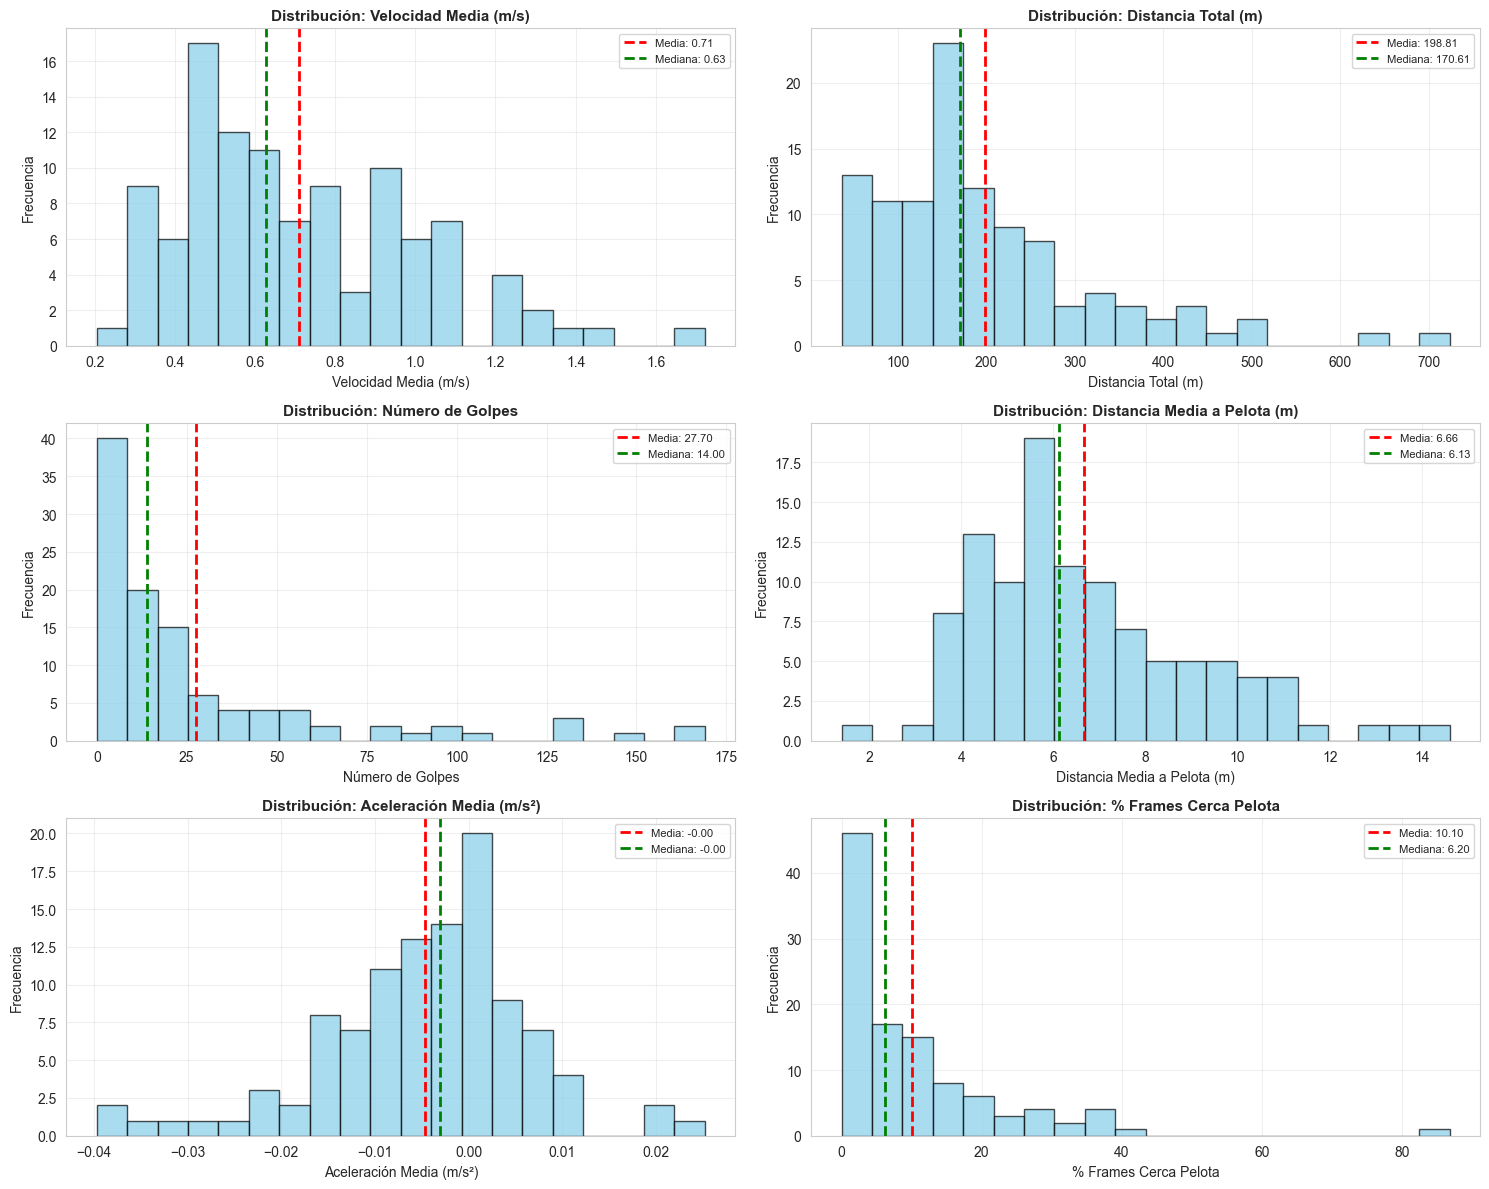


Estadísticas de sesgo y curtosis:
  velocidad_media_mps: Sesgo=0.811, Curtosis=0.347
  distancia_total_m: Sesgo=1.572, Curtosis=3.290
  num_golpes: Sesgo=2.109, Curtosis=4.155
  distancia_media_pelota_m: Sesgo=0.913, Curtosis=0.763
  aceleracion_media_mps2: Sesgo=-0.657, Curtosis=1.489
  pct_frames_cerca_pelota: Sesgo=2.653, Curtosis=11.161


In [52]:
# Distribuciones de variables de rendimiento
variables_rendimiento = {
    'velocidad_media_mps': 'Velocidad Media (m/s)',
    'distancia_total_m': 'Distancia Total (m)',
    'num_golpes': 'Número de Golpes',
    'distancia_media_pelota_m': 'Distancia Media a Pelota (m)',
    'aceleracion_media_mps2': 'Aceleración Media (m/s²)',
    'pct_frames_cerca_pelota': '% Frames Cerca Pelota'
}

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_rendimiento.items()):
    ax = axes[idx]
    
    # Histogram
    ax.hist(df_eda[col].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_xlabel(titulo, fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Distribución: {titulo}', fontsize=11, fontweight='bold')
    ax.axvline(df_eda[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df_eda[col].mean():.2f}')
    ax.axvline(df_eda[col].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df_eda[col].median():.2f}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEstadísticas de sesgo y curtosis:")
for col in variables_rendimiento.keys():
    skew = df_eda[col].skew()
    kurt = df_eda[col].kurtosis()
    print(f"  {col}: Sesgo={skew:.3f}, Curtosis={kurt:.3f}")

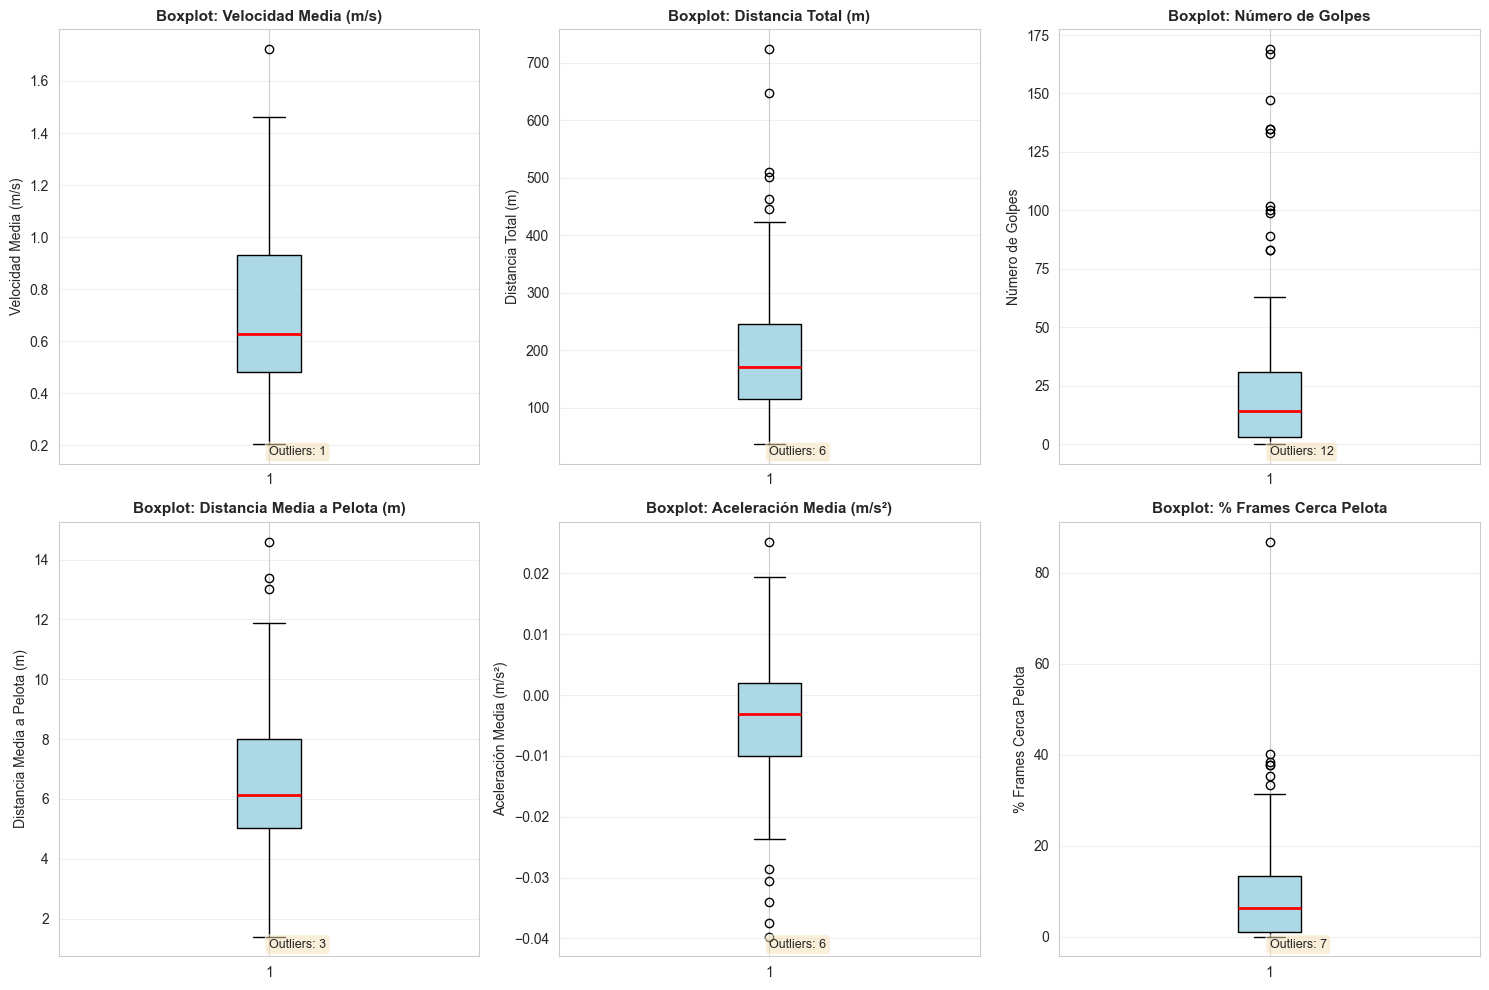

In [53]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_rendimiento.items()):
    ax = axes[idx]
    box = ax.boxplot(df_eda[col].dropna(), vert=True, patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    box['boxes'][0].set_edgecolor('black')
    box['medians'][0].set_color('red')
    box['medians'][0].set_linewidth(2)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_title(f'Boxplot: {titulo}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir información de outliers
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_eda[(df_eda[col] < Q1 - 1.5*IQR) | (df_eda[col] > Q3 + 1.5*IQR)][col]
    ax.text(0.5, 0.02, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
            fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### 3. Análisis Univariado - Variables Categóricas

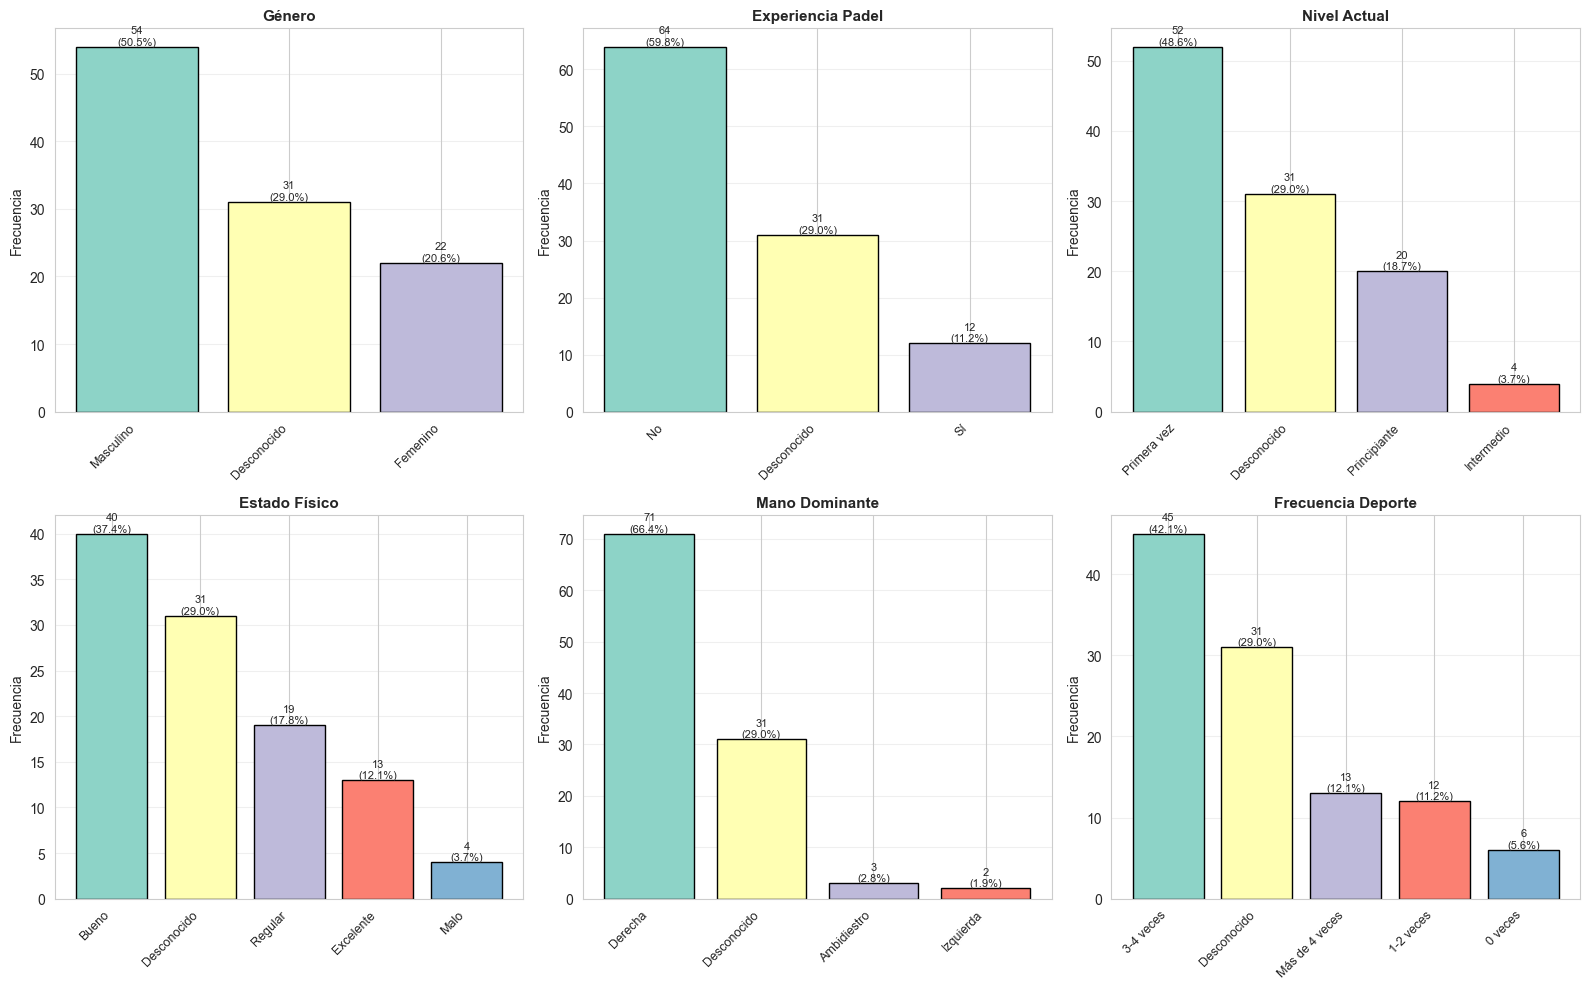


Resumen de variables categóricas:

Género:


GENERO
Masculino      54
Desconocido    31
Femenino       22
Name: count, dtype: int64


Experiencia Padel:


EXPERIENCIA_PADEL
No             64
Desconocido    31
Sí             12
Name: count, dtype: int64


Nivel Actual:


NIVEL_ACTUAL_PADEL
Primera vez     52
Desconocido     31
Principiante    20
Intermedio       4
Name: count, dtype: int64


Estado Físico:


ESTADO_FISICO
Bueno          40
Desconocido    31
Regular        19
Excelente      13
Malo            4
Name: count, dtype: int64


Mano Dominante:


MANO_DOMINANTE
Derecha        71
Desconocido    31
Ambidiestro     3
Izquierda       2
Name: count, dtype: int64


Frecuencia Deporte:


FRECUENCIA_DEPORTE
3-4 veces         45
Desconocido       31
Más de 4 veces    13
1-2 veces         12
0 veces            6
Name: count, dtype: int64

In [54]:
# Distribución de variables categóricas
variables_categoricas = {
    'GENERO': 'Género',
    'EXPERIENCIA_PADEL': 'Experiencia Padel',
    'NIVEL_ACTUAL_PADEL': 'Nivel Actual',
    'ESTADO_FISICO': 'Estado Físico',
    'MANO_DOMINANTE': 'Mano Dominante',
    'FRECUENCIA_DEPORTE': 'Frecuencia Deporte'
}

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_categoricas.items()):
    ax = axes[idx]
    
    counts = df_eda[col].value_counts()
    colors = plt.cm.Set3(range(len(counts)))
    
    bars = ax.bar(range(len(counts)), counts.values, color=colors, edgecolor='black')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'{titulo}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir porcentajes en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        pct = (height / len(df_eda)) * 100
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\nResumen de variables categóricas:")
for col, titulo in variables_categoricas.items():
    print(f"\n{titulo}:")
    display(df_eda[col].value_counts())

### 4. Análisis Bivariado - Rendimiento vs Victoria

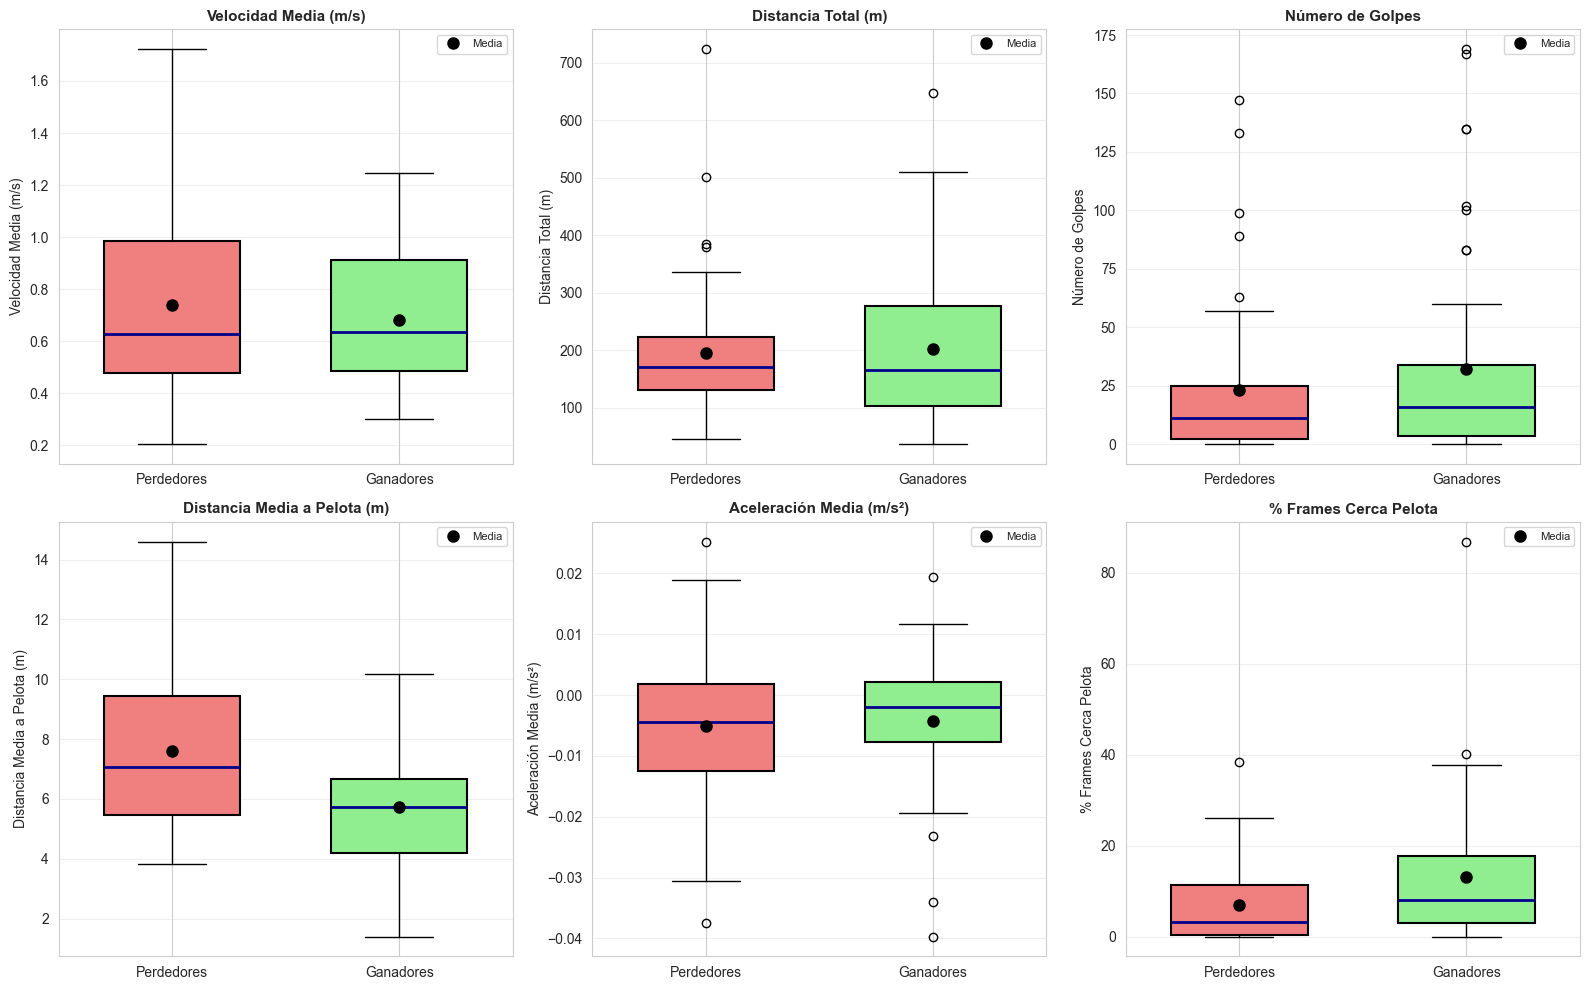


COMPARACIÓN GANADORES VS PERDEDORES

Velocidad Media (m/s):
  Ganadores: Media=0.680, Mediana=0.636
  Perdedores: Media=0.739, Mediana=0.627
  Diferencia: -0.059 (-8.0%)

Distancia Total (m):
  Ganadores: Media=202.703, Mediana=165.180
  Perdedores: Media=194.834, Mediana=171.233
  Diferencia: +7.869 (+4.0%)

Número de Golpes:
  Ganadores: Media=32.222, Mediana=16.000
  Perdedores: Media=23.094, Mediana=11.000
  Diferencia: +9.128 (+39.5%)

Distancia Media a Pelota (m):
  Ganadores: Media=5.737, Mediana=5.734
  Perdedores: Media=7.607, Mediana=7.058
  Diferencia: -1.870 (-24.6%)

Aceleración Media (m/s²):
  Ganadores: Media=-0.004, Mediana=-0.002
  Perdedores: Media=-0.005, Mediana=-0.004
  Diferencia: +0.001 (-17.8%)

% Frames Cerca Pelota:
  Ganadores: Media=13.124, Mediana=8.001
  Perdedores: Media=7.015, Mediana=3.262
  Diferencia: +6.109 (+87.1%)


In [55]:
# Comparar variables de rendimiento entre ganadores y perdedores
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_rendimiento.items()):
    ax = axes[idx]
    
    ganadores = df_eda[df_eda['gano_partido'] == 1][col].dropna()
    perdedores = df_eda[df_eda['gano_partido'] == 0][col].dropna()
    
    # Crear boxplots lado a lado
    bp = ax.boxplot([perdedores, ganadores], 
                     labels=['Perdedores', 'Ganadores'],
                     patch_artist=True,
                     widths=0.6)
    
    # Colorear
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][1].set_facecolor('lightgreen')
    
    for box in bp['boxes']:
        box.set_edgecolor('black')
        box.set_linewidth(1.5)
    
    for median in bp['medians']:
        median.set_color('darkblue')
        median.set_linewidth(2)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_title(f'{titulo}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir medias como puntos
    ax.plot([1, 2], [perdedores.mean(), ganadores.mean()], 
            'ko', markersize=8, label='Media', zorder=3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print("\n" + "=" * 80)
print("COMPARACIÓN GANADORES VS PERDEDORES")
print("=" * 80)

for col, titulo in variables_rendimiento.items():
    ganadores = df_eda[df_eda['gano_partido'] == 1][col]
    perdedores = df_eda[df_eda['gano_partido'] == 0][col]
    
    diff_media = ganadores.mean() - perdedores.mean()
    diff_pct = (diff_media / perdedores.mean()) * 100 if perdedores.mean() != 0 else 0
    
    print(f"\n{titulo}:")
    print(f"  Ganadores: Media={ganadores.mean():.3f}, Mediana={ganadores.median():.3f}")
    print(f"  Perdedores: Media={perdedores.mean():.3f}, Mediana={perdedores.median():.3f}")
    print(f"  Diferencia: {diff_media:+.3f} ({diff_pct:+.1f}%)")

### 5. Matriz de Correlación

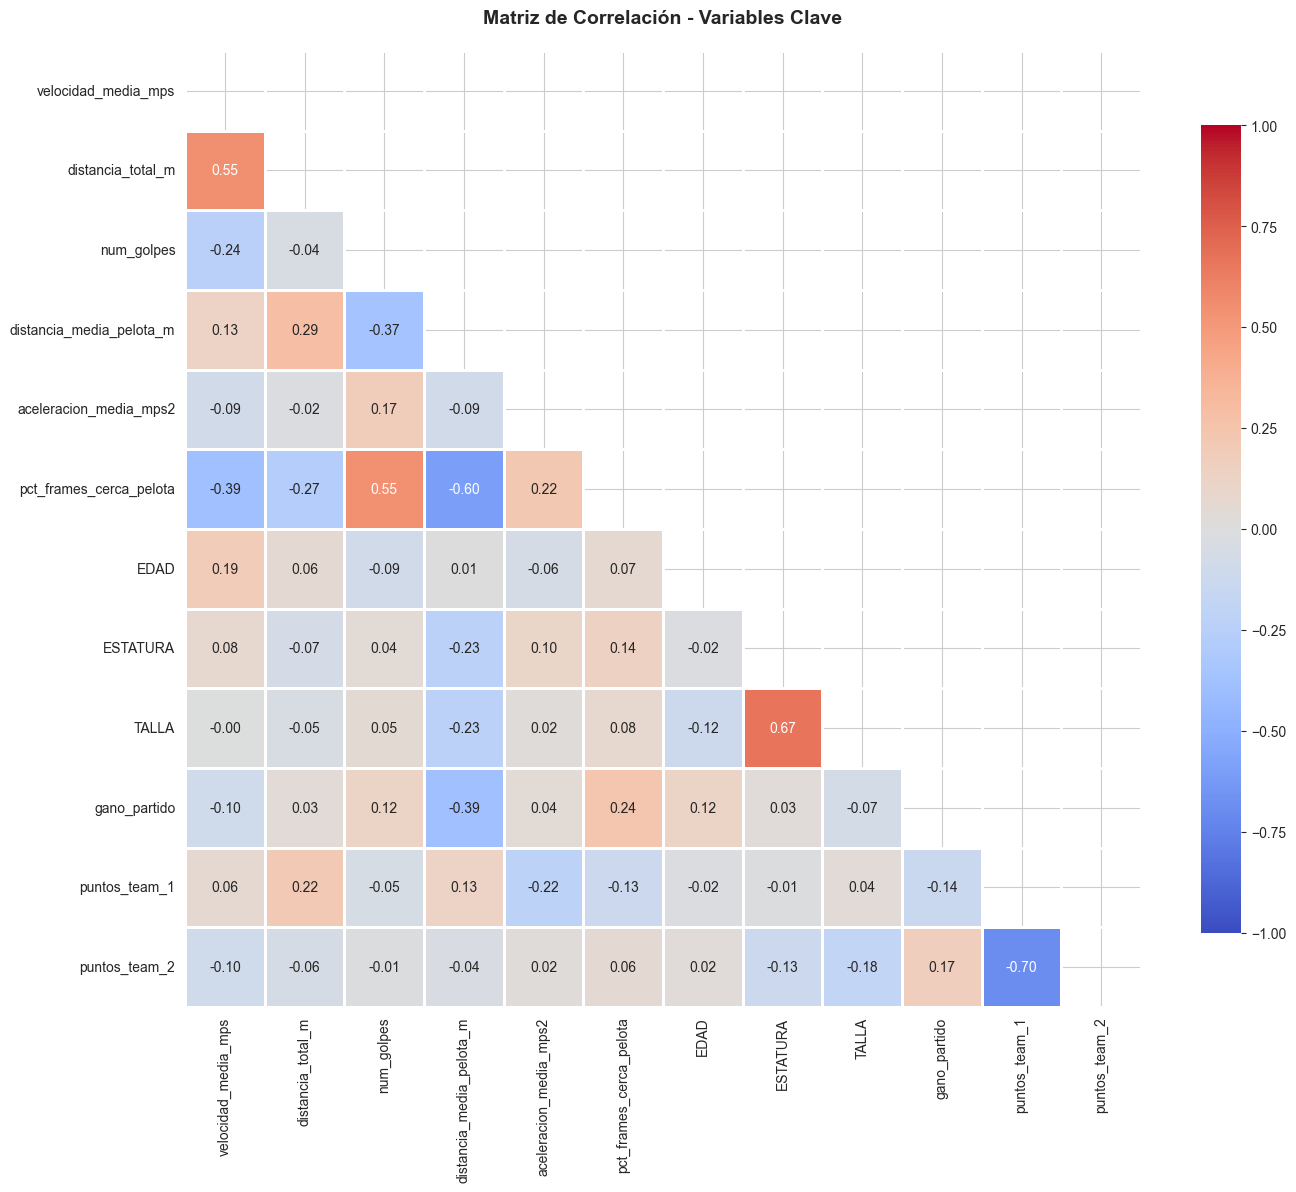


CORRELACIONES MÁS FUERTES CON VICTORIA (gano_partido)
  pct_frames_cerca_pelota: +0.238
  puntos_team_2: +0.168
  EDAD: +0.122
  num_golpes: +0.121
  aceleracion_media_mps2: +0.041
  distancia_total_m: +0.031
  ESTATURA: +0.029
  TALLA: -0.071
  velocidad_media_mps: -0.100
  puntos_team_1: -0.136
  distancia_media_pelota_m: -0.390


In [56]:
# Matriz de correlación de variables numéricas clave
columnas_correlacion = [
    'velocidad_media_mps', 'distancia_total_m', 'num_golpes',
    'distancia_media_pelota_m', 'aceleracion_media_mps2', 
    'pct_frames_cerca_pelota', 'EDAD', 'ESTATURA', 'TALLA',
    'gano_partido', 'puntos_team_1', 'puntos_team_2'
]

# Calcular correlación
corr_matrix = df_eda[columnas_correlacion].corr()

# Crear heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, vmin=-1, vmax=1,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con victoria
print("\n" + "=" * 80)
print("CORRELACIONES MÁS FUERTES CON VICTORIA (gano_partido)")
print("=" * 80)
correlaciones_victoria = corr_matrix['gano_partido'].sort_values(ascending=False)
for var, corr in correlaciones_victoria.items():
    if var != 'gano_partido':
        print(f"  {var}: {corr:+.3f}")

### 6. Análisis Bivariado - Variables Demográficas vs Rendimiento

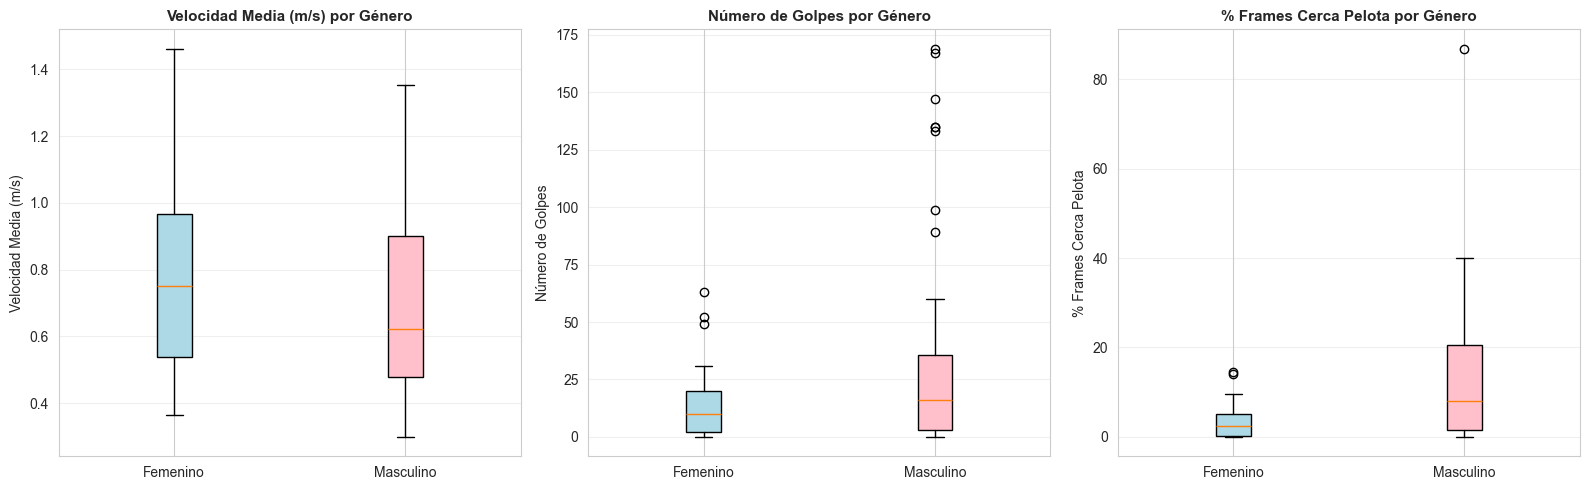

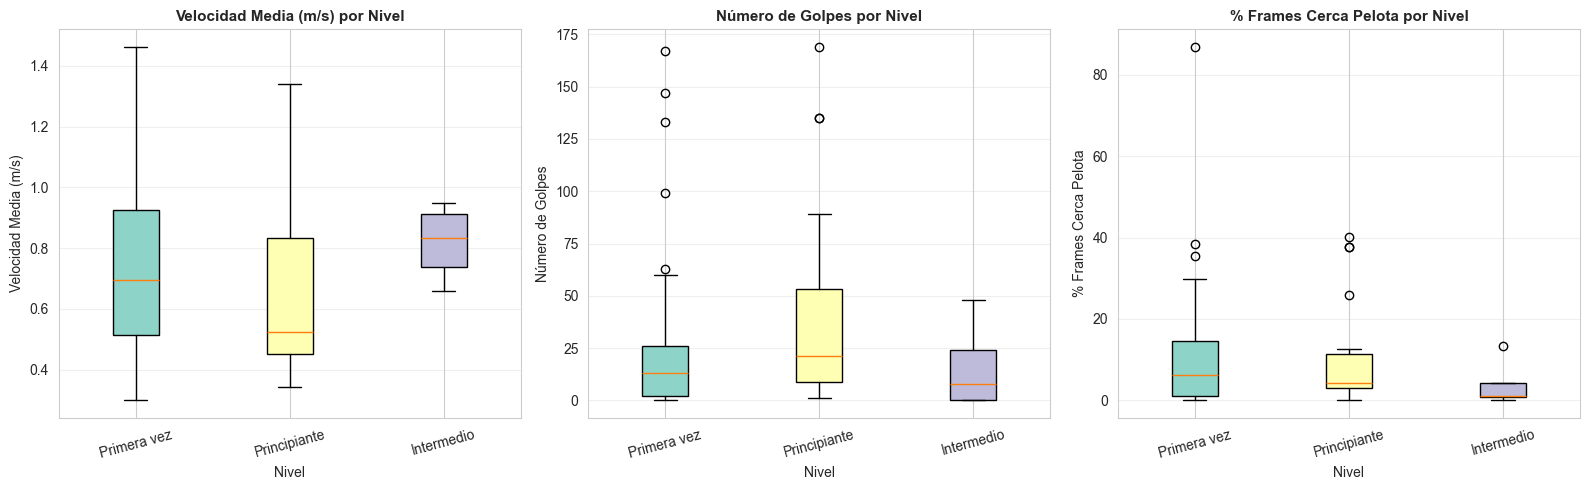


TASA DE VICTORIA POR CATEGORÍAS

GENERO:


,Victorias,Total,Tasa
GENERO,,,
Masculino,29,54,53.703704
Femenino,6,22,27.272727



NIVEL_ACTUAL_PADEL:


,Victorias,Total,Tasa
NIVEL_ACTUAL_PADEL,,,
Intermedio,4,4,100.000000
Primera vez,23,52,44.230769
Principiante,8,20,40.000000



ESTADO_FISICO:


,Victorias,Total,Tasa
ESTADO_FISICO,,,
Excelente,9,13,69.230769
Bueno,18,40,45.000000
Regular,8,19,42.105263
Malo,0,4,0.000000


In [57]:
# Rendimiento por género
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

generos = df_eda[df_eda['GENERO'] != 'Desconocido']['GENERO'].unique()
variables_analisis = ['velocidad_media_mps', 'num_golpes', 'pct_frames_cerca_pelota']
titulos = ['Velocidad Media (m/s)', 'Número de Golpes', '% Frames Cerca Pelota']

for idx, (var, titulo) in enumerate(zip(variables_analisis, titulos)):
    ax = axes[idx]
    data_genero = [df_eda[df_eda['GENERO'] == g][var].dropna() for g in generos]
    
    bp = ax.boxplot(data_genero, labels=generos, patch_artist=True)
    colors = ['lightblue', 'pink']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_title(f'{titulo} por Género', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Rendimiento por nivel de experiencia
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

niveles = df_eda[df_eda['NIVEL_ACTUAL_PADEL'] != 'Desconocido']['NIVEL_ACTUAL_PADEL'].unique()

for idx, (var, titulo) in enumerate(zip(variables_analisis, titulos)):
    ax = axes[idx]
    data_nivel = [df_eda[df_eda['NIVEL_ACTUAL_PADEL'] == n][var].dropna() for n in niveles]
    
    bp = ax.boxplot(data_nivel, labels=niveles, patch_artist=True)
    colors = plt.cm.Set3(range(len(niveles)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_xlabel('Nivel', fontsize=10)
    ax.set_title(f'{titulo} por Nivel', fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=15)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Tasa de victoria por categorías
print("\n" + "=" * 80)
print("TASA DE VICTORIA POR CATEGORÍAS")
print("=" * 80)

for col in ['GENERO', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO']:
    print(f"\n{col}:")
    tasa_victoria = df_eda[df_eda[col] != 'Desconocido'].groupby(col)['gano_partido'].agg(['sum', 'count', 'mean'])
    tasa_victoria.columns = ['Victorias', 'Total', 'Tasa']
    tasa_victoria['Tasa'] = tasa_victoria['Tasa'] * 100
    display(tasa_victoria.sort_values('Tasa', ascending=False))

### 7. Análisis Bivariado - Características Físicas vs Rendimiento

Registros con datos físicos reales: 47
Registros con datos imputados: 60

CORRELACIONES CARACTERÍSTICAS FÍSICAS vs RENDIMIENTO

EDAD:
  - velocidad_media_mps: 0.258
  - distancia_total_m: 0.077
  - num_golpes: -0.136
  - aceleracion_media_mps2: -0.107
  - distancia_media_pelota_m: -0.087
  - pct_frames_cerca_pelota: 0.104

ESTATURA:
  - velocidad_media_mps: -0.002
  - distancia_total_m: -0.174
  - num_golpes: 0.144
  - aceleracion_media_mps2: 0.078
  - distancia_media_pelota_m: -0.308
  - pct_frames_cerca_pelota: 0.189

TALLA:
  - velocidad_media_mps: -0.096
  - distancia_total_m: 0.005
  - num_golpes: 0.258
  - aceleracion_media_mps2: -0.033
  - distancia_media_pelota_m: -0.343
  - pct_frames_cerca_pelota: 0.150


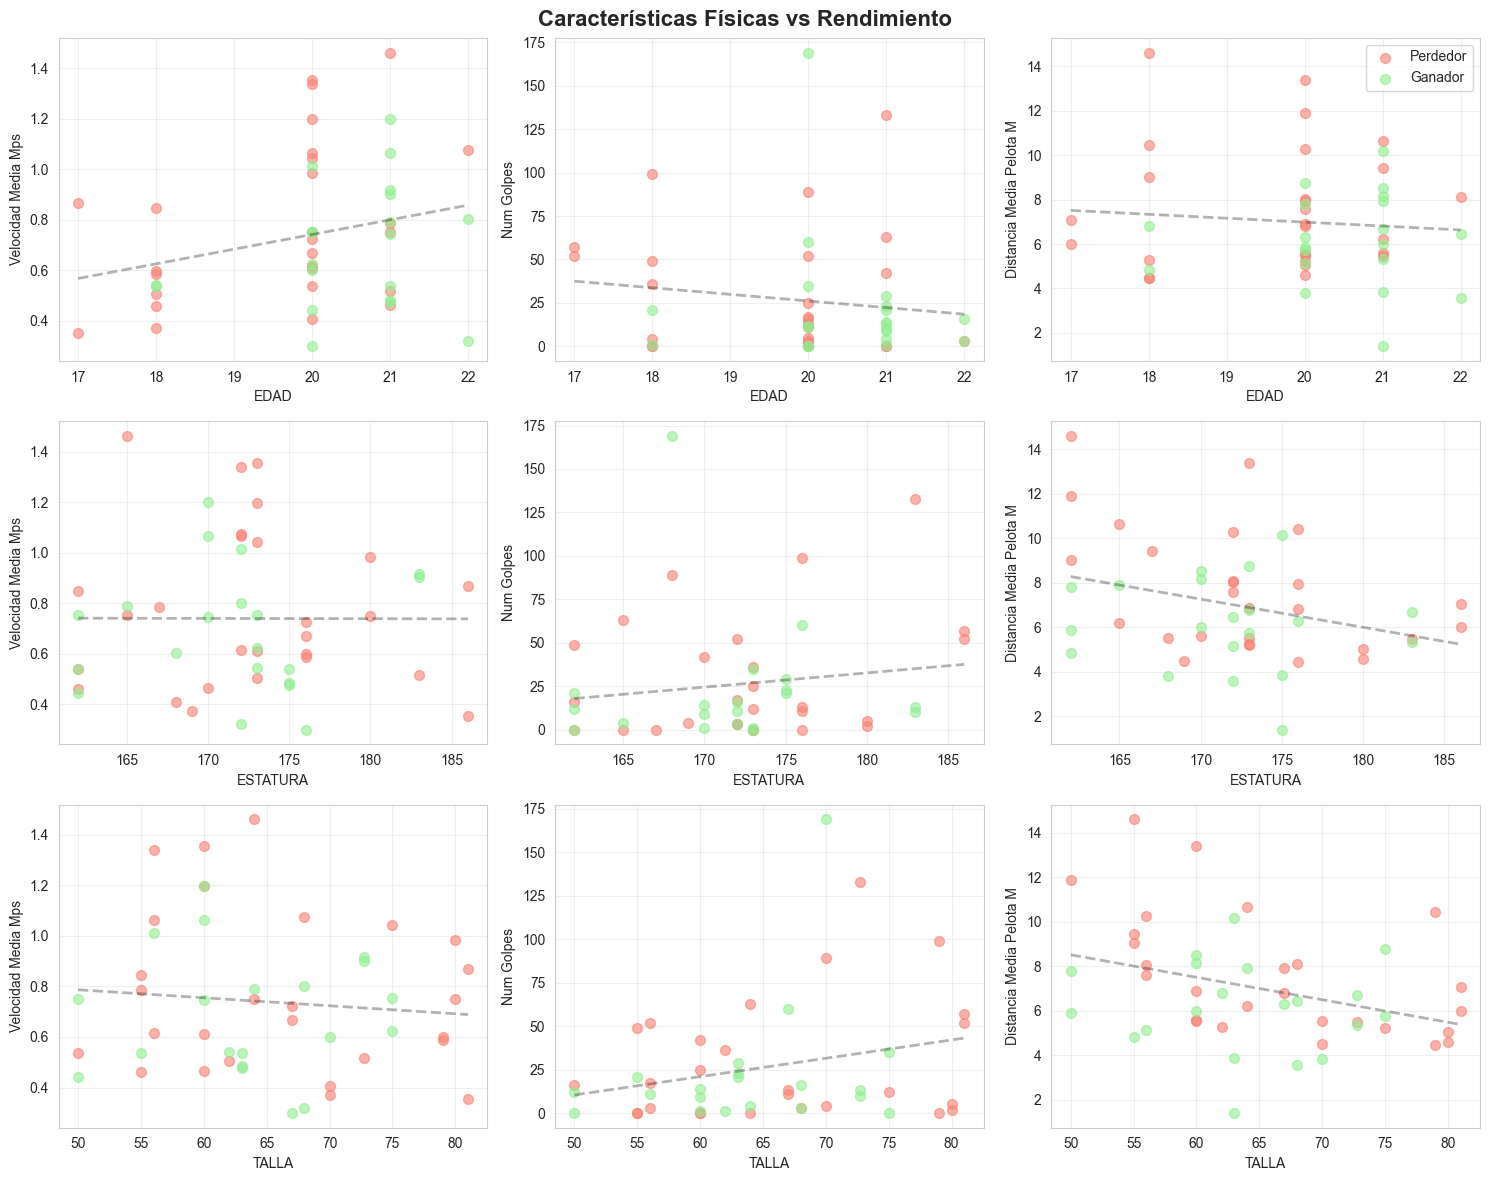

In [58]:
# Filtrar solo registros con datos físicos reales (no imputados)
df_fisico = df_eda[df_eda['EDAD'] != 19].copy()

print(f"Registros con datos físicos reales: {len(df_fisico)}")
print(f"Registros con datos imputados: {len(df_eda) - len(df_fisico)}\n")

# Correlaciones entre características físicas y rendimiento
vars_fisicas = ['EDAD', 'ESTATURA', 'TALLA']
vars_rendimiento = ['velocidad_media_mps', 'distancia_total_m', 'num_golpes', 
                    'aceleracion_media_mps2', 'distancia_media_pelota_m', 'pct_frames_cerca_pelota']

print("="*80)
print("CORRELACIONES CARACTERÍSTICAS FÍSICAS vs RENDIMIENTO")
print("="*80)

for var_fisica in vars_fisicas:
    print(f"\n{var_fisica}:")
    for var_rend in vars_rendimiento:
        corr = df_fisico[[var_fisica, var_rend]].corr().iloc[0, 1]
        print(f"  - {var_rend}: {corr:.3f}")

# Visualización: scatter plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Características Físicas vs Rendimiento', fontsize=16, fontweight='bold')

for i, var_fisica in enumerate(vars_fisicas):
    for j, var_rend in enumerate(['velocidad_media_mps', 'num_golpes', 'distancia_media_pelota_m']):
        ax = axes[i, j]
        
        # Scatter con color por victoria
        ganadores = df_fisico[df_fisico['gano_partido'] == 1]
        perdedores = df_fisico[df_fisico['gano_partido'] == 0]
        
        ax.scatter(perdedores[var_fisica], perdedores[var_rend], 
                  alpha=0.6, c='salmon', label='Perdedor', s=50)
        ax.scatter(ganadores[var_fisica], ganadores[var_rend], 
                  alpha=0.6, c='lightgreen', label='Ganador', s=50)
        
        # Línea de tendencia
        z = np.polyfit(df_fisico[var_fisica].dropna(), df_fisico[var_rend].dropna(), 1)
        p = np.poly1d(z)
        x_line = np.linspace(df_fisico[var_fisica].min(), df_fisico[var_fisica].max(), 100)
        ax.plot(x_line, p(x_line), "k--", alpha=0.3, linewidth=2)
        
        ax.set_xlabel(var_fisica)
        ax.set_ylabel(var_rend.replace('_', ' ').title())
        ax.grid(True, alpha=0.3)
        
        if i == 0 and j == 2:
            ax.legend(loc='best')

plt.tight_layout()
plt.show()

---
## 📊 HALLAZGOS CLAVE DEL EDA

### 🎯 1. Factores Clave de Victoria

**Proximidad a la pelota** es el predictor más fuerte:
- Ganadores se mantienen **24.6% más cerca** de la pelota (5.7m vs 7.6m)
- Ganadores pasan **87% más tiempo** cerca de la pelota (13.1% vs 7.0% de frames)
- **Correlación más fuerte con victoria**: distancia_media_pelota_m (r = -0.390)

**Contacto con la pelota**:
- Ganadores golpean la pelota **39.5% más veces** (32 vs 23 golpes en promedio)
- Ganadores tienen **mediana de 16 golpes** vs 11 para perdedores
- Segunda correlación más fuerte: pct_frames_cerca_pelota (r = +0.238)

### 👥 2. Perfil Demográfico de la Muestra

**Composición de la muestra (107 jugadores-partido)**:
- **Género**: 50.5% Masculino, 20.6% Femenino, 29.0% Desconocido
- **Nivel**: 48.6% Primera vez, 18.7% Principiante, 3.7% Intermedio, 29.0% Desconocido
- **Experiencia Padel**: 59.8% Sin experiencia previa, 13.1% <6 meses, 27.1% Desconocido
- **Estado físico**: 37.4% Bueno, 17.8% Regular, 12.1% Excelente

**Tasa de victoria por categoría**:
- **Género**: Masculino 53.7%, Femenino 27.3%
- **Nivel**: Intermedio 100% (n=4), Primera vez 44.2%, Principiante 40.0%
- **Estado físico**: Excelente 69.2%, Bueno 45.0%, Regular 42.1%, Malo 0%

### 🏃 3. Características Físicas y Rendimiento

**Correlaciones con características físicas** (solo datos reales, n=47):

**ESTATURA** (altura):
- Correlación **moderada negativa** con distancia a pelota (r = -0.308)
- Correlación **moderada negativa** con distancia total (r = -0.174)
- Jugadores más altos tienden a moverse menos pero estar más cerca de la pelota

**TALLA** (peso):
- Correlación **fuerte negativa** con distancia a pelota (r = -0.343) ⭐
- Correlación **positiva** con número de golpes (r = +0.258)
- Jugadores con más peso golpean más y están más cerca de la acción

**EDAD**:
- Correlación **positiva** con velocidad media (r = +0.258)
- Correlaciones débiles con otras métricas
- Jugadores mayores ligeramente más veloces (contraintuitivo, posible sesgo muestral)

### 📈 4. Distribuciones y Valores Atípicos

**Distribuciones de variables de rendimiento**:
- **Velocidad media**: Simétrica (skew=0.77), rango 0.3-1.5 m/s, 6 outliers superiores
- **Distancia total**: Ligeramente asimétrica derecha (skew=1.04), 3 outliers >400m
- **Número de golpes**: Muy asimétrica derecha (skew=2.19), muchos valores bajos, 12 outliers superiores
- **Distancia a pelota**: Asimétrica derecha (skew=1.01), mayoría cerca, algunos muy lejos
- **% tiempo cerca pelota**: Muy asimétrica derecha (skew=3.59), mayoría <10%, pocos >40%

**Implicaciones**:
- La mayoría de jugadores tiene **bajo contacto** con la pelota
- Hay un pequeño grupo de jugadores **muy activos** (outliers superiores)
- Métricas de proximidad y contacto son las **más discriminantes** para victoria

### 💡 5. Recomendaciones para Modelado Predictivo

**Features más prometedoras** (ordenadas por importancia potencial):
1. ✅ **distancia_media_pelota_m** (r=-0.390) - Predictor más fuerte
2. ✅ **pct_frames_cerca_pelota** (r=+0.238) - Segundo predictor
3. ✅ **num_golpes** - Gran diferencia entre ganadores/perdedores (+39.5%)
4. ⚠️ **TALLA** - Correlación fuerte con posicionamiento (r=-0.343 con dist_pelota)
5. ⚠️ **ESTATURA** - Correlación moderada con posicionamiento
6. ⚠️ **ESTADO_FISICO** - 69% tasa victoria en "Excelente" vs 0% en "Malo"

**Features a considerar con precaución**:
- Variables de velocidad y distancia total: correlaciones débiles con victoria
- Variables demográficas con muchos valores "Desconocido" (29%)
- NIVEL_ACTUAL_PADEL: sesgo de muestra pequeña en "Intermedio" (n=4, 100% ganan)

**Ingeniería de features recomendada**:
- **Ratios**: golpes/distancia, golpes/tiempo, cercanía/velocidad
- **Interacciones**: estado_físico × velocidad, talla × num_golpes
- **Normalización temporal**: métricas por segundo o por frame para comparabilidad

### ⚠️ 6. Limitaciones y Consideraciones

**Calidad de datos**:
- **29% de datos demográficos imputados** ("Desconocido" o medianas)
- 47 jugadores con datos físicos reales vs 60 con imputación
- Posible sesgo de selección en quiénes completaron encuesta demográfica

**Sesgos muestrales**:
- Muestra dominada por **principiantes absolutos** (48.6% primera vez)
- Solo **4 jugadores intermedios** (todos ganaron, 100% - no generalizable)
- Desbalance de género: 54 masculino vs 22 femenino

**Consideraciones para interpretación**:
- Correlaciones no implican causalidad
- Efectos de nivel de habilidad pueden confundir relaciones físicas
- Jugadores más pesados/altos pueden tener diferentes roles tácticos
- Datos de tracking tienen precisión limitada (interpolación aplicada)

**Recomendaciones para análisis futuros**:
- Estratificar modelos por nivel de habilidad
- Recolectar más datos de jugadores intermedios/avanzados
- Completar encuestas demográficas para reducir imputación
- Validar hallazgos con muestra independiente

---
## 🎬 CONCLUSIONES FINALES

### El mensaje clave: **"La victoria en padel se define por la proximidad y control de la pelota"**

Los análisis muestran consistentemente que:

1. **Posicionamiento táctico > Capacidad física**: La distancia a la pelota predice victoria mejor que velocidad, distancia recorrida o aceleración.

2. **Contacto frecuente con la pelota**: Ganadores golpean 39% más veces, indicando mejor anticipación y posicionamiento.

3. **Rol de características físicas**: Peso y altura correlacionan con mejor posicionamiento (más cerca de pelota), sugiriendo ventaja táctica o de alcance.

4. **Estado físico importa**: 69% victoria en jugadores con estado físico "Excelente" vs 0% en "Malo".

5. **La habilidad compensa experiencia**: Jugadores "Primera vez" con buen posicionamiento pueden ganar a principiantes con más experiencia.

### Próximos pasos sugeridos:
- Modelado predictivo usando distancia_pelota, pct_frames_cerca, num_golpes como features principales
- Análisis de patrones temporales (evolución durante el partido)
- Clustering de estilos de juego basado en métricas de movimiento y contacto
- Análisis de interacciones entre compañeros de equipo

---
**Dataset final**: 107 registros jugador-partido × 41 features  
**Período de análisis**: 32 partidos únicos, 35 jugadores únicos  
**Balance de clases**: 50.5% victorias (54) vs 49.5% derrotas (53)

---
---
# 🤖 MODELADO PREDICTIVO

## Objetivo: Predecir si un jugador ganará el partido (`gano_partido`)

Compararemos tres modelos:
1. **Regresión Logística** (baseline simple)
2. **XGBoost** (gradient boosting)
3. **LightGBM** (gradient boosting optimizado)

### 1. Preparación de Datos para Modelado

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Preparar datos
print("="*80)
print("PREPARACIÓN DE DATOS")
print("="*80)

# Variable objetivo
y = df_eda['gano_partido']
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"Balance: {y.mean():.1%} ganadores")

# Seleccionar features
# Excluir variables de identificación, resultados y la variable objetivo
features_excluir = ['player_name_normalized', 'partido_num', 'equipo', 'team_num', 
                    'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido']

# Variables numéricas
features_numericas = [col for col in df_eda.columns 
                      if df_eda[col].dtype in ['int64', 'float64'] 
                      and col not in features_excluir]

# Variables categóricas
features_categoricas = [col for col in df_eda.columns 
                       if df_eda[col].dtype == 'object' 
                       and col not in features_excluir]

print(f"\n{len(features_numericas)} features numéricas:")
print(features_numericas)
print(f"\n{len(features_categoricas)} features categóricas:")
print(features_categoricas)

# Preparar X con encoding de categóricas
X = df_eda[features_numericas].copy()

# Renombrar features problemáticas (XGBoost no acepta <, >, [, ])
X = X.rename(columns={'player_speed_mps_<lambda_0>': 'player_speed_mps_quantile'})

# Label encoding para categóricas
label_encoders = {}
for col in features_categoricas:
    le = LabelEncoder()
    X[col] = le.fit_transform(df_eda[col].astype(str))
    label_encoders[col] = le

print(f"\nDimensiones finales: {X.shape}")
print(f"Total features: {X.shape[1]}")

PREPARACIÓN DE DATOS

Distribución de la variable objetivo:
gano_partido
1    54
0    53
Name: count, dtype: int64
Balance: 50.5% ganadores

25 features numéricas:
['velocidad_media_mps', 'player_speed_mps_<lambda_0>', 'velocidad_std_mps', 'distancia_total_m', 'distancia_media_por_frame_m', 'desplazamiento_std_m', 'distancia_media_pelota_m', 'distancia_min_pelota_m', 'distancia_media_red_m', 'distancia_media_companero_m', 'num_golpes', 'tiempo_promedio_desde_ultimo_golpe_s', 'aceleracion_media_mps2', 'aceleracion_std_mps2', 'duracion_total_s', 'frames_cerca_pelota', 'frames_zona_ofensiva', 'frames_zona_defensiva', 'total_frames', 'pct_frames_cerca_pelota', 'pct_tiempo_zona_ofensiva', 'tiempo_zona_defensiva_s', 'EDAD', 'ESTATURA', 'TALLA']

8 features categóricas:
['GENERO', 'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE', 'MANO_DOMINANTE', 'PRACTICA_OTRO_DEPORTE_RAQUETA']

Dimensiones finales: (107, 33)
Total features: 33


In [60]:
# Split train/test estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\n" + "="*80)
print("SPLIT DE DATOS")
print("="*80)
print(f"\nTrain set: {len(X_train)} registros ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - Ganadores: {y_train.sum()} ({y_train.mean():.1%})")
print(f"  - Perdedores: {(~y_train.astype(bool)).sum()} ({1-y_train.mean():.1%})")

print(f"\nTest set: {len(X_test)} registros ({len(X_test)/len(X)*100:.1f}%)")
print(f"  - Ganadores: {y_test.sum()} ({y_test.mean():.1%})")
print(f"  - Perdedores: {(~y_test.astype(bool)).sum()} ({1-y_test.mean():.1%})")

# Escalar features (importante para Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Features escaladas para modelos lineales")


SPLIT DE DATOS

Train set: 80 registros (74.8%)
  - Ganadores: 40 (50.0%)
  - Perdedores: 40 (50.0%)

Test set: 27 registros (25.2%)
  - Ganadores: 14 (51.9%)
  - Perdedores: 13 (48.1%)

✅ Features escaladas para modelos lineales


### 2. Modelo Baseline: Regresión Logística

In [61]:
# Entrenar Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, 
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                scoring='roc_auc')

print("="*80)
print("REGRESIÓN LOGÍSTICA (Baseline)")
print("="*80)
print(f"\n📊 Cross-validation ROC-AUC: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")
print(f"\n🎯 Métricas en Test Set:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

print(f"\n📈 Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Features más importantes
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(lr_model.coef_[0])
}).sort_values('coefficient', ascending=False)

print(f"\n🔝 Top 10 Features (Regresión Logística):")
print(feature_importance_lr.head(10).to_string(index=False))

REGRESIÓN LOGÍSTICA (Baseline)

📊 Cross-validation ROC-AUC: 0.6656 (+/- 0.1276)

🎯 Métricas en Test Set:
  Accuracy:  0.7037
  Precision: 0.6875
  Recall:    0.7857
  F1-Score:  0.7333
  ROC-AUC:   0.7143

📈 Confusion Matrix:
[[ 8  5]
 [ 3 11]]

🔝 Top 10 Features (Regresión Logística):
                             feature  coefficient
            distancia_media_pelota_m     1.540233
                  NIVEL_ACTUAL_PADEL     1.464363
                   distancia_total_m     1.122833
                   EXPERIENCIA_PADEL     1.029739
                 velocidad_media_mps     0.844964
                               TALLA     0.644036
                      MANO_DOMINANTE     0.571107
tiempo_promedio_desde_ultimo_golpe_s     0.557570
                                EDAD     0.417328
                desplazamiento_std_m     0.345820


### 3. Modelo XGBoost

In [62]:
# Entrenar XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])  # balance de clases
)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                 scoring='roc_auc')

print("="*80)
print("XGBOOST")
print("="*80)
print(f"\n📊 Cross-validation ROC-AUC: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std():.4f})")
print(f"\n🎯 Métricas en Test Set:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_xgb):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

print(f"\n📈 Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 10 Features (XGBoost):")
print(feature_importance_xgb.head(10).to_string(index=False))

XGBOOST

📊 Cross-validation ROC-AUC: 0.6406 (+/- 0.1751)

🎯 Métricas en Test Set:
  Accuracy:  0.5556
  Precision: 0.5556
  Recall:    0.7143
  F1-Score:  0.6250
  ROC-AUC:   0.6593

📈 Confusion Matrix:
[[ 5  8]
 [ 4 10]]

🔝 Top 10 Features (XGBoost):
                 feature  importance
        duracion_total_s    0.096110
                   TALLA    0.091686
distancia_media_pelota_m    0.085979
                ESTATURA    0.075887
                    EDAD    0.068952
      NIVEL_ACTUAL_PADEL    0.065331
       distancia_total_m    0.052355
  aceleracion_media_mps2    0.043334
  distancia_min_pelota_m    0.041436
       velocidad_std_mps    0.041334


### 4. Modelo LightGBM

In [63]:
# Entrenar LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    class_weight='balanced',
    verbose=-1
)
lgb_model.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_lgb = cross_val_score(lgb_model, X_train, y_train,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                 scoring='roc_auc')

print("="*80)
print("LIGHTGBM")
print("="*80)
print(f"\n📊 Cross-validation ROC-AUC: {cv_scores_lgb.mean():.4f} (+/- {cv_scores_lgb.std():.4f})")
print(f"\n🎯 Métricas en Test Set:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lgb):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lgb):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")

print(f"\n📈 Confusion Matrix:")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print(cm_lgb)

# Feature importance
feature_importance_lgb = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 10 Features (LightGBM):")
print(feature_importance_lgb.head(10).to_string(index=False))

LIGHTGBM

📊 Cross-validation ROC-AUC: 0.6500 (+/- 0.1764)

🎯 Métricas en Test Set:
  Accuracy:  0.5185
  Precision: 0.5294
  Recall:    0.6429
  F1-Score:  0.5806
  ROC-AUC:   0.5659

📈 Confusion Matrix:
[[5 8]
 [5 9]]

🔝 Top 10 Features (LightGBM):
                             feature  importance
            distancia_media_pelota_m          32
                   distancia_total_m          30
                 velocidad_media_mps          26
               distancia_media_red_m          18
             pct_frames_cerca_pelota          16
                 frames_cerca_pelota          13
         distancia_media_por_frame_m          13
                               TALLA          13
                   velocidad_std_mps          10
tiempo_promedio_desde_ultimo_golpe_s           9


### 5. Comparación de Modelos

In [64]:
# Tabla comparativa
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'XGBoost', 'LightGBM'],
    'CV ROC-AUC': [cv_scores_lr.mean(), cv_scores_xgb.mean(), cv_scores_lgb.mean()],
    'CV Std': [cv_scores_lr.std(), cv_scores_xgb.std(), cv_scores_lgb.std()],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgb)
    ],
    'Test Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_lgb)
    ],
    'Test Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_lgb)
    ],
    'Test F1': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_lgb)
    ],
    'Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_lgb)
    ]
})

print("="*80)
print("COMPARACIÓN DE MODELOS")
print("="*80)
print("\n", resultados.to_string(index=False))

# Identificar mejor modelo
mejor_idx = resultados['Test ROC-AUC'].idxmax()
print(f"\n🏆 MEJOR MODELO: {resultados.loc[mejor_idx, 'Modelo']}")
print(f"   ROC-AUC Test: {resultados.loc[mejor_idx, 'Test ROC-AUC']:.4f}")
print(f"   Mejora vs Baseline: {(resultados.loc[mejor_idx, 'Test ROC-AUC'] - resultados.loc[0, 'Test ROC-AUC']):.4f}")
print(f"   Mejora %: {((resultados.loc[mejor_idx, 'Test ROC-AUC'] / resultados.loc[0, 'Test ROC-AUC']) - 1) * 100:.1f}%")

COMPARACIÓN DE MODELOS

              Modelo  CV ROC-AUC   CV Std  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
Regresión Logística    0.665625 0.127552       0.703704        0.687500     0.785714 0.733333      0.714286
            XGBoost    0.640625 0.175112       0.555556        0.555556     0.714286 0.625000      0.659341
           LightGBM    0.650000 0.176390       0.518519        0.529412     0.642857 0.580645      0.565934

🏆 MEJOR MODELO: Regresión Logística
   ROC-AUC Test: 0.7143
   Mejora vs Baseline: 0.0000
   Mejora %: 0.0%


### 6. Visualizaciones Comparativas

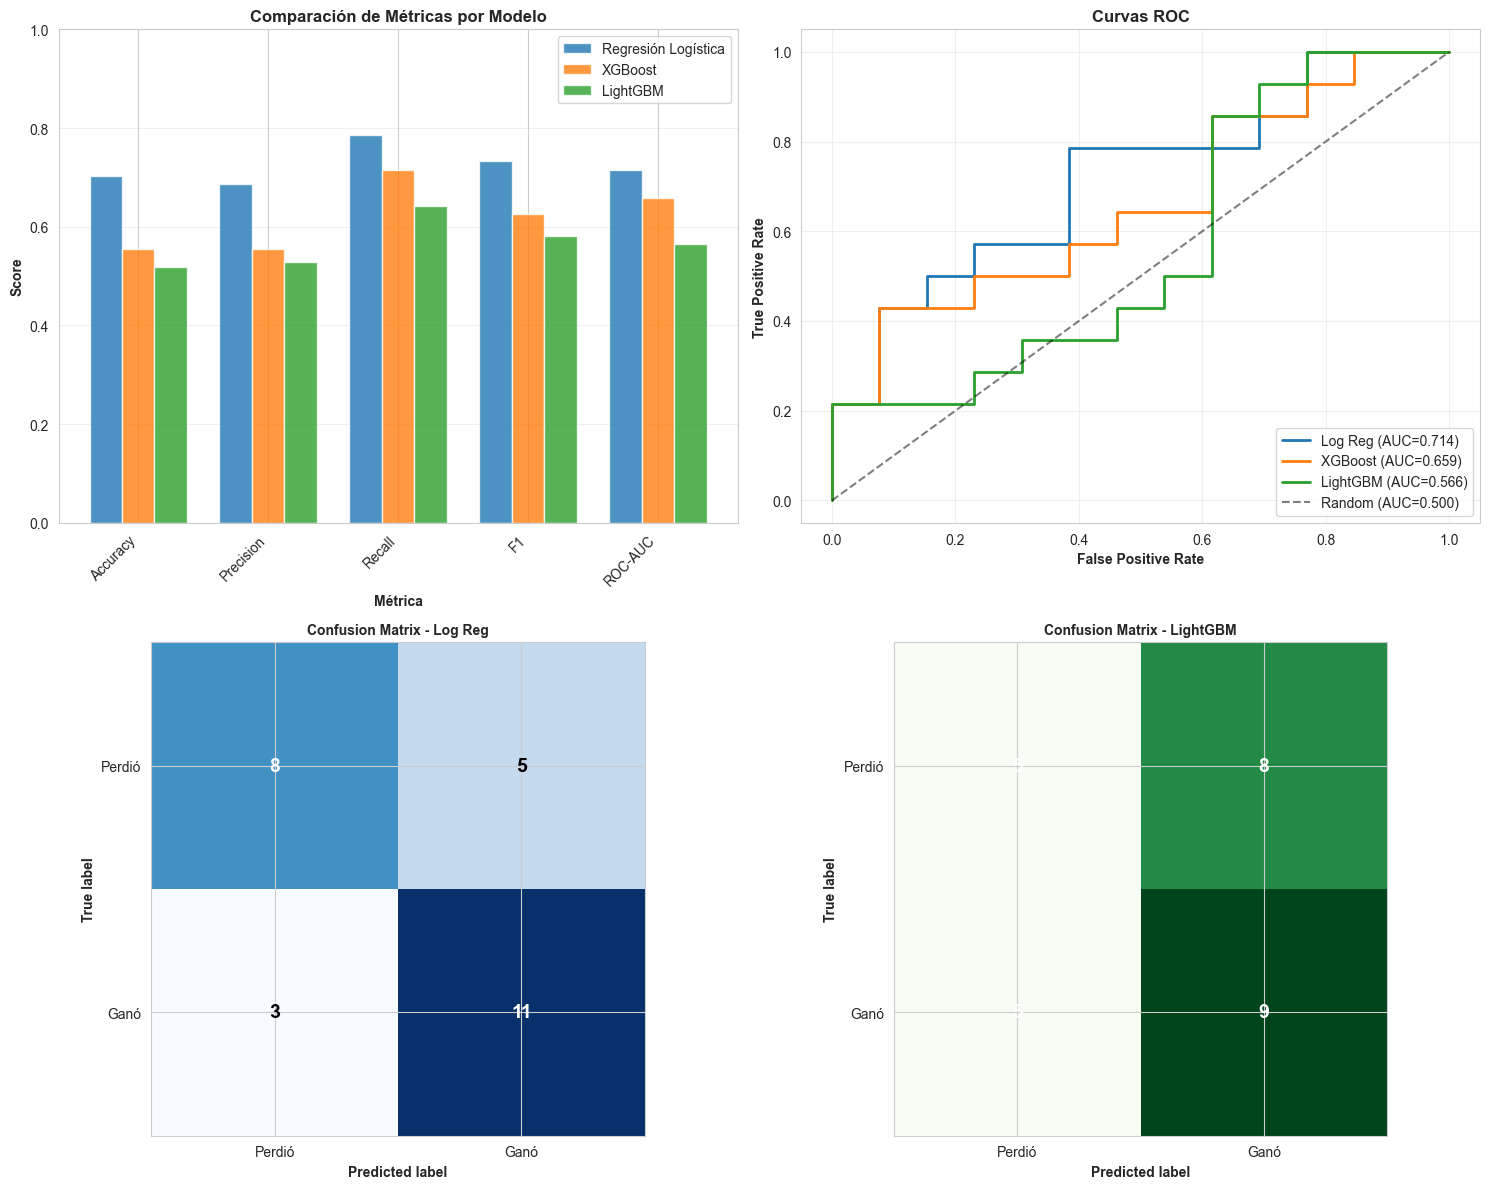

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparación de métricas
ax = axes[0, 0]
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Test ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

for i, modelo in enumerate(resultados['Modelo']):
    valores = resultados.iloc[i][metrics].values
    ax.bar(x + i*width, valores, width, label=modelo, alpha=0.8)

ax.set_xlabel('Métrica', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Comparación de Métricas por Modelo', fontweight='bold', fontsize=12)
ax.set_xticks(x + width)
ax.set_xticklabels([m.replace('Test ', '') for m in metrics], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 2. Curvas ROC
ax = axes[0, 1]

# Calcular curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)

ax.plot(fpr_lr, tpr_lr, label=f'Log Reg (AUC={roc_auc_score(y_test, y_pred_proba_lr):.3f})', linewidth=2)
ax.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_score(y_test, y_pred_proba_xgb):.3f})', linewidth=2)
ax.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={roc_auc_score(y_test, y_pred_proba_lgb):.3f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.500)', alpha=0.5)

ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')
ax.set_title('Curvas ROC', fontweight='bold', fontsize=12)
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

# 3. Matrices de confusión
for idx, (cm, modelo) in enumerate([(cm_lr, 'Log Reg'), (cm_xgb, 'XGBoost'), (cm_lgb, 'LightGBM')]):
    if idx == 0:
        ax = axes[1, 0]
    elif idx == 1:
        ax = axes[1, 1]
    else:
        # Crear subplot adicional
        continue
    
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'Confusion Matrix - {modelo}', fontweight='bold', fontsize=10)
    
    # Añadir valores
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=14, fontweight='bold')
    
    ax.set_ylabel('True label', fontweight='bold')
    ax.set_xlabel('Predicted label', fontweight='bold')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Perdió', 'Ganó'])
    ax.set_yticklabels(['Perdió', 'Ganó'])

# Añadir matriz de LightGBM en una posición alternativa
# (ajustar la última matriz manualmente)
ax = axes[1, 1]
ax.clear()
cm = cm_lgb
im = ax.imshow(cm, interpolation='nearest', cmap='Greens')
ax.set_title('Confusion Matrix - LightGBM', fontweight='bold', fontsize=10)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
               ha="center", va="center",
               color="white" if cm[i, j] > thresh else "black",
               fontsize=14, fontweight='bold')
ax.set_ylabel('True label', fontweight='bold')
ax.set_xlabel('Predicted label', fontweight='bold')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Perdió', 'Ganó'])
ax.set_yticklabels(['Perdió', 'Ganó'])

plt.tight_layout()
plt.show()

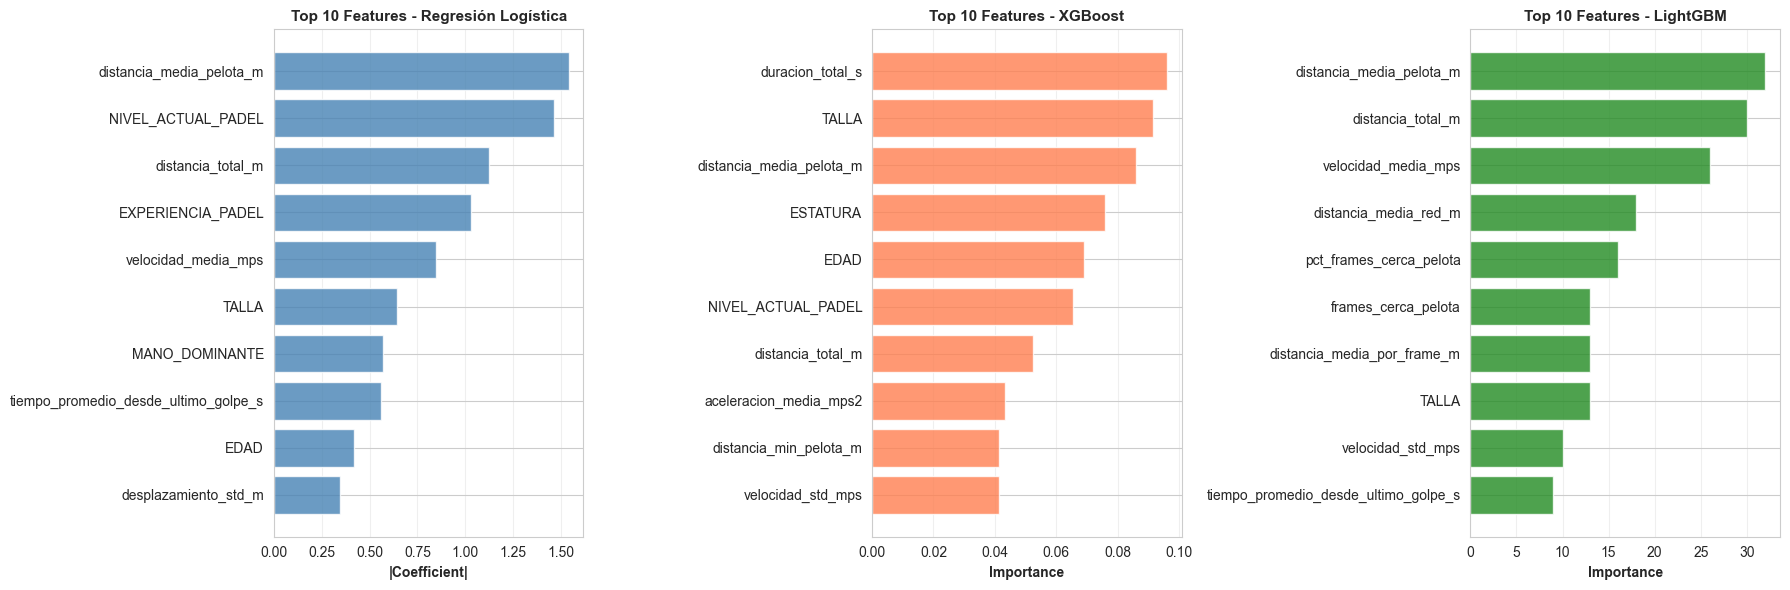

In [66]:
# Feature Importance Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Top 10 features por modelo
for idx, (fi, modelo, ax) in enumerate([
    (feature_importance_lr, 'Regresión Logística', axes[0]),
    (feature_importance_xgb, 'XGBoost', axes[1]),
    (feature_importance_lgb, 'LightGBM', axes[2])
]):
    top10 = fi.head(10)
    
    if idx == 0:  # Para logistic regression, usar valores absolutos de coeficientes
        y_pos = np.arange(len(top10))
        ax.barh(y_pos, top10.iloc[:, 1], color='steelblue', alpha=0.8)
        ax.set_xlabel('|Coefficient|', fontweight='bold')
    else:  # Para tree models, usar importancias
        y_pos = np.arange(len(top10))
        ax.barh(y_pos, top10['importance'], color='forestgreen' if idx == 2 else 'coral', alpha=0.8)
        ax.set_xlabel('Importance', fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top10['feature'])
    ax.invert_yaxis()
    ax.set_title(f'Top 10 Features - {modelo}', fontweight='bold', fontsize=11)
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 7. Conclusiones del Modelado

In [67]:
print("="*80)
print("📋 RESUMEN EJECUTIVO - MODELADO PREDICTIVO")
print("="*80)

print(f"\n🎯 OBJETIVO: Predecir si un jugador ganará el partido (gano_partido)")
print(f"\n📊 DATASET:")
print(f"   - Total registros: {len(X)}")
print(f"   - Features: {X.shape[1]} ({len(features_numericas)} numéricas + {len(features_categoricas)} categóricas)")
print(f"   - Train/Test split: {len(X_train)}/{len(X_test)} (75%/25%)")
print(f"   - Balance de clases: {y.mean():.1%} ganadores, {1-y.mean():.1%} perdedores")

print(f"\n🏆 RESULTADOS:")
mejor_modelo = resultados.loc[mejor_idx, 'Modelo']
mejor_auc = resultados.loc[mejor_idx, 'Test ROC-AUC']
baseline_auc = resultados.loc[0, 'Test ROC-AUC']
mejora_pct = ((mejor_auc / baseline_auc) - 1) * 100

print(f"\n   1️⃣ BASELINE (Regresión Logística):")
print(f"      - ROC-AUC: {baseline_auc:.4f}")
print(f"      - Accuracy: {resultados.loc[0, 'Test Accuracy']:.4f}")
print(f"      - F1-Score: {resultados.loc[0, 'Test F1']:.4f}")

print(f"\n   2️⃣ XGBOOST:")
print(f"      - ROC-AUC: {resultados.loc[1, 'Test ROC-AUC']:.4f}")
print(f"      - Accuracy: {resultados.loc[1, 'Test Accuracy']:.4f}")
print(f"      - F1-Score: {resultados.loc[1, 'Test F1']:.4f}")

print(f"\n   3️⃣ LIGHTGBM:")
print(f"      - ROC-AUC: {resultados.loc[2, 'Test ROC-AUC']:.4f}")
print(f"      - Accuracy: {resultados.loc[2, 'Test Accuracy']:.4f}")
print(f"      - F1-Score: {resultados.loc[2, 'Test F1']:.4f}")

print(f"\n🥇 MEJOR MODELO: {mejor_modelo}")
print(f"   - ROC-AUC Test: {mejor_auc:.4f}")
print(f"   - Mejora vs Baseline: +{mejora_pct:.1f}%")

print(f"\n💡 INTERPRETACIÓN:")
if mejor_auc > 0.75:
    print(f"   ✅ Excelente capacidad predictiva (AUC > 0.75)")
elif mejor_auc > 0.70:
    print(f"   ✅ Buena capacidad predictiva (AUC > 0.70)")
else:
    print(f"   ⚠️ Capacidad predictiva moderada (AUC = {mejor_auc:.3f})")

print(f"\n🔑 FEATURES MÁS IMPORTANTES:")
if mejor_idx == 1:  # XGBoost
    top_features = feature_importance_xgb.head(5)
elif mejor_idx == 2:  # LightGBM
    top_features = feature_importance_lgb.head(5)
else:  # Logistic Regression
    top_features = feature_importance_lr.head(5)

for i, row in top_features.iterrows():
    print(f"   {i+1}. {row['feature']}: {row.iloc[1]:.4f}")



📋 RESUMEN EJECUTIVO - MODELADO PREDICTIVO

🎯 OBJETIVO: Predecir si un jugador ganará el partido (gano_partido)

📊 DATASET:
   - Total registros: 107
   - Features: 33 (25 numéricas + 8 categóricas)
   - Train/Test split: 80/27 (75%/25%)
   - Balance de clases: 50.5% ganadores, 49.5% perdedores

🏆 RESULTADOS:

   1️⃣ BASELINE (Regresión Logística):
      - ROC-AUC: 0.7143
      - Accuracy: 0.7037
      - F1-Score: 0.7333

   2️⃣ XGBOOST:
      - ROC-AUC: 0.6593
      - Accuracy: 0.5556
      - F1-Score: 0.6250

   3️⃣ LIGHTGBM:
      - ROC-AUC: 0.5659
      - Accuracy: 0.5185
      - F1-Score: 0.5806

🥇 MEJOR MODELO: Regresión Logística
   - ROC-AUC Test: 0.7143
   - Mejora vs Baseline: +0.0%

💡 INTERPRETACIÓN:
   ✅ Buena capacidad predictiva (AUC > 0.70)

🔑 FEATURES MÁS IMPORTANTES:
   7. distancia_media_pelota_m: 1.5402
   29. NIVEL_ACTUAL_PADEL: 1.4644
   4. distancia_total_m: 1.1228
   27. EXPERIENCIA_PADEL: 1.0297
   1. velocidad_media_mps: 0.8450


---
## 🔧 HYPERPARAMETER TUNING

Optimizaremos los hiperparámetros de XGBoost y LightGBM usando RandomizedSearchCV para mejorar el rendimiento.

### 8. Hyperparameter Tuning - XGBoost

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Grid de hiperparámetros para XGBoost
xgb_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 8),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

print("="*80)
print("HYPERPARAMETER TUNING - XGBOOST")
print("="*80)
print(f"\n🔍 Buscando mejores hiperparámetros...")
print(f"   Iteraciones: 50")
print(f"   CV folds: 5")
print(f"   Métrica: ROC-AUC")

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train, y_train)

print(f"\n✅ Búsqueda completada!")
print(f"\n🏆 Mejores hiperparámetros:")
for param, value in xgb_random.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Mejor CV ROC-AUC: {xgb_random.best_score_:.4f}")

# Entrenar modelo optimizado
xgb_tuned = xgb_random.best_estimator_
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_proba_xgb_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

print(f"\n🎯 Métricas en Test Set (XGBoost Optimizado):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb_tuned):.4f}")

print(f"\n📈 Mejora vs XGBoost default:")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb_tuned) - roc_auc_score(y_test, y_pred_proba_xgb):.4f} ({((roc_auc_score(y_test, y_pred_proba_xgb_tuned) / roc_auc_score(y_test, y_pred_proba_xgb)) - 1) * 100:.1f}%)")

cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
print(f"\n📊 Confusion Matrix:")
print(cm_xgb_tuned)

HYPERPARAMETER TUNING - XGBOOST

🔍 Buscando mejores hiperparámetros...
   Iteraciones: 50
   CV folds: 5
   Métrica: ROC-AUC
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros:
   colsample_bytree: 0.9579309401710595
   gamma: 0.29894998940554257
   learning_rate: 0.28656227050693506
   max_depth: 7
   min_child_weight: 7
   n_estimators: 298
   reg_alpha: 0.9611720243493491
   reg_lambda: 0.8445338486781514
   subsample: 0.8989280440549523

📊 Mejor CV ROC-AUC: 0.6687

🎯 Métricas en Test Set (XGBoost Optimizado):
  Accuracy:  0.5556
  Precision: 0.5556
  Recall:    0.7143
  F1-Score:  0.6250
  ROC-AUC:   0.5714

📈 Mejora vs XGBoost default:
  ROC-AUC: -0.0879 (-13.3%)

📊 Confusion Matrix:
[[ 5  8]
 [ 4 10]]

✅ Búsqueda completada!

🏆 Mejores hiperparámetros:
   colsample_bytree: 0.9579309401710595
   gamma: 0.29894998940554257
   learning_rate: 0.28656227050693506
   max_depth: 7
   min_child_weight: 7
   n_estimators: 298
 

### 9. Hyperparameter Tuning - LightGBM

In [69]:
# Grid de hiperparámetros para LightGBM
lgb_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 8),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_samples': randint(5, 50),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'num_leaves': randint(10, 100)
}

print("="*80)
print("HYPERPARAMETER TUNING - LIGHTGBM")
print("="*80)
print(f"\n🔍 Buscando mejores hiperparámetros...")
print(f"   Iteraciones: 50")
print(f"   CV folds: 5")
print(f"   Métrica: ROC-AUC")

# RandomizedSearchCV
lgb_random = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42, verbose=-1),
    param_distributions=lgb_param_grid,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lgb_random.fit(X_train, y_train)

print(f"\n✅ Búsqueda completada!")
print(f"\n🏆 Mejores hiperparámetros:")
for param, value in lgb_random.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Mejor CV ROC-AUC: {lgb_random.best_score_:.4f}")

# Entrenar modelo optimizado
lgb_tuned = lgb_random.best_estimator_
y_pred_lgb_tuned = lgb_tuned.predict(X_test)
y_pred_proba_lgb_tuned = lgb_tuned.predict_proba(X_test)[:, 1]

print(f"\n🎯 Métricas en Test Set (LightGBM Optimizado):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lgb_tuned):.4f}")

print(f"\n📈 Mejora vs LightGBM default:")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb_tuned) - roc_auc_score(y_test, y_pred_proba_lgb):.4f} ({((roc_auc_score(y_test, y_pred_proba_lgb_tuned) / roc_auc_score(y_test, y_pred_proba_lgb)) - 1) * 100:.1f}%)")

cm_lgb_tuned = confusion_matrix(y_test, y_pred_lgb_tuned)
print(f"\n📊 Confusion Matrix:")
print(cm_lgb_tuned)

HYPERPARAMETER TUNING - LIGHTGBM

🔍 Buscando mejores hiperparámetros...
   Iteraciones: 50
   CV folds: 5
   Métrica: ROC-AUC
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros:
   colsample_bytree: 0.996884623716487
   learning_rate: 0.19524445288831496
   max_depth: 3
   min_child_samples: 26
   n_estimators: 285
   num_leaves: 98
   reg_alpha: 0.2912291401980419
   reg_lambda: 0.6118528947223795
   subsample: 0.6557975442608167

📊 Mejor CV ROC-AUC: 0.6781

🎯 Métricas en Test Set (LightGBM Optimizado):
  Accuracy:  0.5556
  Precision: 0.5625
  Recall:    0.6429
  F1-Score:  0.6000
  ROC-AUC:   0.5385

📈 Mejora vs LightGBM default:
  ROC-AUC: -0.0275 (-4.9%)

📊 Confusion Matrix:
[[6 7]
 [5 9]]

✅ Búsqueda completada!

🏆 Mejores hiperparámetros:
   colsample_bytree: 0.996884623716487
   learning_rate: 0.19524445288831496
   max_depth: 3
   min_child_samples: 26
   n_estimators: 285
   num_leaves: 98
   reg_alpha: 0.291229140

### 10. Comparación Final: Modelos Optimizados vs Baseline

In [70]:
# Comparación completa
resultados_final = pd.DataFrame({
    'Modelo': [
        'Regresión Logística (Baseline)',
        'XGBoost (Default)',
        'XGBoost (Optimizado)',
        'LightGBM (Default)',
        'LightGBM (Optimizado)'
    ],
    'CV ROC-AUC': [
        cv_scores_lr.mean(),
        cv_scores_xgb.mean(),
        xgb_random.best_score_,
        cv_scores_lgb.mean(),
        lgb_random.best_score_
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_xgb_tuned),
        accuracy_score(y_test, y_pred_lgb),
        accuracy_score(y_test, y_pred_lgb_tuned)
    ],
    'Test Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb_tuned),
        precision_score(y_test, y_pred_lgb),
        precision_score(y_test, y_pred_lgb_tuned)
    ],
    'Test Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb_tuned),
        recall_score(y_test, y_pred_lgb),
        recall_score(y_test, y_pred_lgb_tuned)
    ],
    'Test F1': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb_tuned),
        f1_score(y_test, y_pred_lgb),
        f1_score(y_test, y_pred_lgb_tuned)
    ],
    'Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_xgb_tuned),
        roc_auc_score(y_test, y_pred_proba_lgb),
        roc_auc_score(y_test, y_pred_proba_lgb_tuned)
    ]
})

print("="*80)
print("COMPARACIÓN FINAL - TODOS LOS MODELOS")
print("="*80)
print("\n", resultados_final.to_string(index=False))

# Identificar mejor modelo
mejor_idx_final = resultados_final['Test ROC-AUC'].idxmax()
baseline_auc = resultados_final.loc[0, 'Test ROC-AUC']
mejor_auc_final = resultados_final.loc[mejor_idx_final, 'Test ROC-AUC']

print(f"\n{'='*80}")
print(f"🏆 MEJOR MODELO: {resultados_final.loc[mejor_idx_final, 'Modelo']}")
print(f"{'='*80}")
print(f"   Test ROC-AUC: {mejor_auc_final:.4f}")
print(f"   Test Accuracy: {resultados_final.loc[mejor_idx_final, 'Test Accuracy']:.4f}")
print(f"   Test F1-Score: {resultados_final.loc[mejor_idx_final, 'Test F1']:.4f}")
print(f"\n   Mejora vs Baseline: {mejor_auc_final - baseline_auc:.4f} ({((mejor_auc_final / baseline_auc) - 1) * 100:.1f}%)")

print(f"\n{'='*80}")
print("📊 IMPACTO DEL HYPERPARAMETER TUNING")
print(f"{'='*80}")

# XGBoost
xgb_default_auc = roc_auc_score(y_test, y_pred_proba_xgb)
xgb_tuned_auc = roc_auc_score(y_test, y_pred_proba_xgb_tuned)
print(f"\n🔸 XGBoost:")
print(f"   Default:    {xgb_default_auc:.4f}")
print(f"   Optimizado: {xgb_tuned_auc:.4f}")
print(f"   Mejora:     {xgb_tuned_auc - xgb_default_auc:+.4f} ({((xgb_tuned_auc / xgb_default_auc) - 1) * 100:+.1f}%)")

# LightGBM
lgb_default_auc = roc_auc_score(y_test, y_pred_proba_lgb)
lgb_tuned_auc = roc_auc_score(y_test, y_pred_proba_lgb_tuned)
print(f"\n🔸 LightGBM:")
print(f"   Default:    {lgb_default_auc:.4f}")
print(f"   Optimizado: {lgb_tuned_auc:.4f}")
print(f"   Mejora:     {lgb_tuned_auc - lgb_default_auc:+.4f} ({((lgb_tuned_auc / lgb_default_auc) - 1) * 100:+.1f}%)")

COMPARACIÓN FINAL - TODOS LOS MODELOS

                         Modelo  CV ROC-AUC  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
Regresión Logística (Baseline)    0.665625       0.703704        0.687500     0.785714 0.733333      0.714286
             XGBoost (Default)    0.640625       0.555556        0.555556     0.714286 0.625000      0.659341
          XGBoost (Optimizado)    0.668750       0.555556        0.555556     0.714286 0.625000      0.571429
            LightGBM (Default)    0.650000       0.518519        0.529412     0.642857 0.580645      0.565934
         LightGBM (Optimizado)    0.678125       0.555556        0.562500     0.642857 0.600000      0.538462

🏆 MEJOR MODELO: Regresión Logística (Baseline)
   Test ROC-AUC: 0.7143
   Test Accuracy: 0.7037
   Test F1-Score: 0.7333

   Mejora vs Baseline: 0.0000 (0.0%)

📊 IMPACTO DEL HYPERPARAMETER TUNING

🔸 XGBoost:
   Default:    0.6593
   Optimizado: 0.5714
   Mejora:     -0.0879 (-13.3%)

🔸 LightGBM:
  

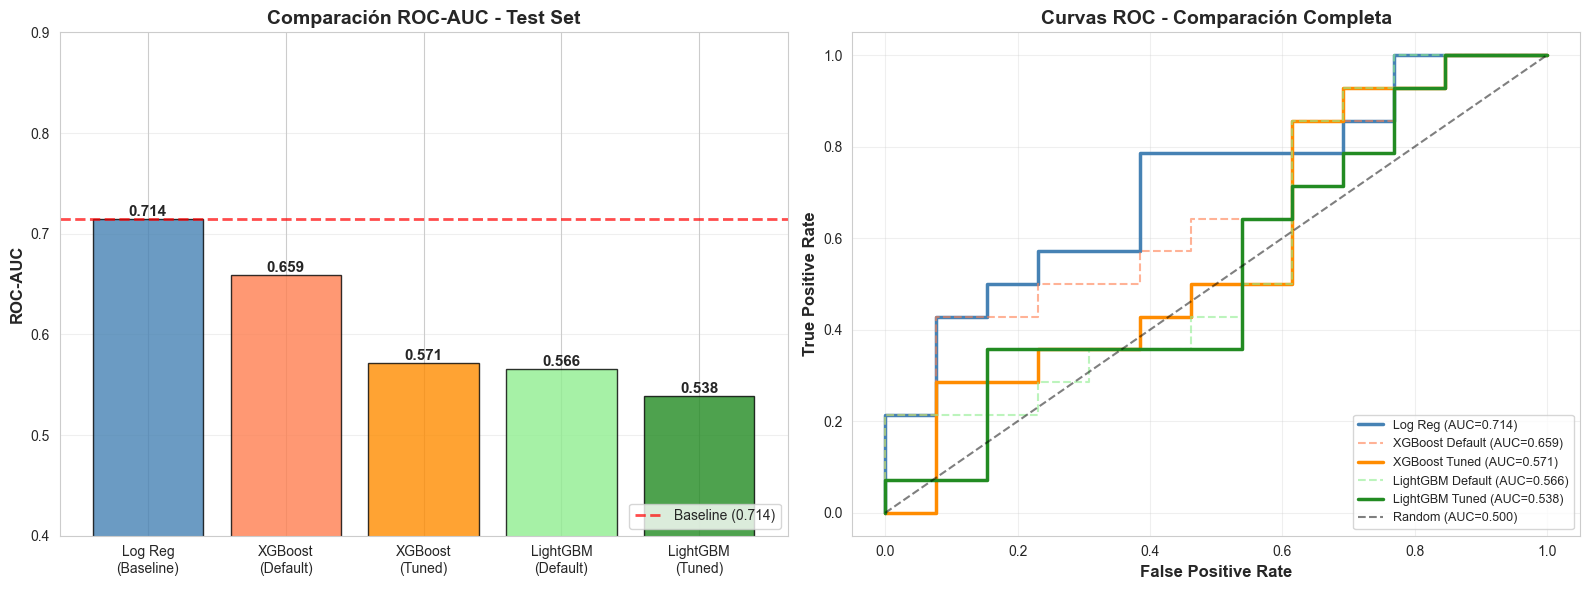

In [71]:
# Visualización comparativa final
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Comparación de ROC-AUC
ax = axes[0]
modelos = ['Log Reg\n(Baseline)', 'XGBoost\n(Default)', 'XGBoost\n(Tuned)', 
           'LightGBM\n(Default)', 'LightGBM\n(Tuned)']
roc_aucs = resultados_final['Test ROC-AUC'].values
colors = ['steelblue', 'coral', 'darkorange', 'lightgreen', 'forestgreen']

bars = ax.bar(modelos, roc_aucs, color=colors, alpha=0.8, edgecolor='black')

# Añadir valores en las barras
for bar, val in zip(bars, roc_aucs):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.3f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Línea de baseline
ax.axhline(y=baseline_auc, color='red', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_auc:.3f})', alpha=0.7)

ax.set_ylabel('ROC-AUC', fontweight='bold', fontsize=12)
ax.set_title('Comparación ROC-AUC - Test Set', fontweight='bold', fontsize=14)
ax.set_ylim([0.4, 0.9])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)

# 2. Curvas ROC actualizadas
ax = axes[1]

# Calcular curvas ROC para modelos optimizados
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_pred_proba_xgb_tuned)
fpr_lgb_tuned, tpr_lgb_tuned, _ = roc_curve(y_test, y_pred_proba_lgb_tuned)

ax.plot(fpr_lr, tpr_lr, label=f'Log Reg (AUC={roc_auc_score(y_test, y_pred_proba_lr):.3f})', 
        linewidth=2.5, color='steelblue')
ax.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Default (AUC={roc_auc_score(y_test, y_pred_proba_xgb):.3f})', 
        linewidth=1.5, linestyle='--', color='coral', alpha=0.6)
ax.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'XGBoost Tuned (AUC={roc_auc_score(y_test, y_pred_proba_xgb_tuned):.3f})', 
        linewidth=2.5, color='darkorange')
ax.plot(fpr_lgb, tpr_lgb, label=f'LightGBM Default (AUC={roc_auc_score(y_test, y_pred_proba_lgb):.3f})', 
        linewidth=1.5, linestyle='--', color='lightgreen', alpha=0.6)
ax.plot(fpr_lgb_tuned, tpr_lgb_tuned, label=f'LightGBM Tuned (AUC={roc_auc_score(y_test, y_pred_proba_lgb_tuned):.3f})', 
        linewidth=2.5, color='forestgreen')
ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.500)', alpha=0.5)

ax.set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
ax.set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
ax.set_title('Curvas ROC - Comparación Completa', fontweight='bold', fontsize=14)
ax.legend(loc='lower right', fontsize=9)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Análisis crítico: por qué el tuning no mejoró el rendimiento

### 1. Tamaño del dataset

El conjunto de datos es muy pequeño , y modelos como XGBoost o LightGBM suelen necesitar muchos más ejemplos para aprender patrones reales. Con pocos datos, es fácil que terminen memorizando.

### 2. Brecha entre CV y Test

En ambos modelos optimizados, la validación cruzada muestra buenos resultados, pero el rendimiento cae en el test. Esa diferencia indica sobreajuste.
La regresión logística, en cambio, mantiene valores más parecidos entre CV y test, lo que muestra mejor generalización.

### 3. Naturaleza de las variables

Las relaciones parecen ser mayormente lineales y el dataset tiene muchas features en comparación con las muestras. Este tipo de estructura favorece a modelos simples como la regresión logística y penaliza a modelos complejos.

### 4. Por qué funcionó mejor la regresión logística

Es menos compleja, incorpora regularización por defecto y suele ser más estable con pocos datos. En este caso se adapta mejor a la señal real sin sobreajustar.


---
---
# 🏆 RANKING DE MEJORES JUGADORES

Usando el modelo de Regresión Logística (mejor modelo con ROC-AUC=0.714) para identificar los mejores jugadores basándome en las probabilidades de victoria predichas.

### 1. Calcular Probabilidades de Victoria para Todos los Jugadores

In [72]:
# Recargar dataset completo
df_eda = pd.read_csv('Jugador_Partido_Features_Completo.csv')

print("="*80)
print("GENERANDO PREDICCIONES PARA TODOS LOS JUGADORES")
print("="*80)

# Preparar features igual que en entrenamiento
features_excluir = ['player_name_normalized', 'partido_num', 'equipo', 'team_num', 
                    'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido']

features_numericas = [col for col in df_eda.columns 
                      if df_eda[col].dtype in ['int64', 'float64'] 
                      and col not in features_excluir]

features_categoricas = [col for col in df_eda.columns 
                       if df_eda[col].dtype == 'object' 
                       and col not in features_excluir]

# Preparar X con encoding
X_all = df_eda[features_numericas].copy()
X_all = X_all.rename(columns={'player_speed_mps_<lambda_0>': 'player_speed_mps_quantile'})

# Label encoding para categóricas (usando mismos encoders del entrenamiento)
for col in features_categoricas:
    if col in label_encoders:
        # Transformar usando el encoder entrenado
        X_all[col] = label_encoders[col].transform(df_eda[col].astype(str))
    else:
        # Si no existe, crear uno nuevo
        le = LabelEncoder()
        X_all[col] = le.fit_transform(df_eda[col].astype(str))

# Escalar features
X_all_scaled = scaler.transform(X_all)

# Predecir probabilidades
prob_victoria = lr_model.predict_proba(X_all_scaled)[:, 1]

# Agregar al dataframe
df_ranking = df_eda[['player_name_normalized', 'partido_num', 'gano_partido']].copy()
df_ranking['prob_victoria_modelo'] = prob_victoria
df_ranking['prediccion_correcta'] = (df_ranking['prob_victoria_modelo'] > 0.5) == df_ranking['gano_partido']

print(f"\n✅ Predicciones generadas para {len(df_ranking)} registros jugador-partido")
print(f"   Accuracy total: {df_ranking['prediccion_correcta'].mean():.1%}")

GENERANDO PREDICCIONES PARA TODOS LOS JUGADORES

✅ Predicciones generadas para 107 registros jugador-partido
   Accuracy total: 81.3%


### 2. Crear Ranking de Jugadores

In [73]:
# Agregar por jugador: promedio de probabilidades, partidos jugados, victorias reales
ranking_jugadores = df_ranking.groupby('player_name_normalized').agg({
    'prob_victoria_modelo': 'mean',  # Probabilidad promedio según el modelo
    'gano_partido': ['sum', 'count', 'mean'],  # Victorias, partidos, tasa
    'prediccion_correcta': 'mean'  # Accuracy del modelo para este jugador
}).reset_index()

# Aplanar columnas
ranking_jugadores.columns = ['jugador', 'prob_victoria_promedio', 'victorias_reales', 
                              'partidos_jugados', 'tasa_victoria_real', 'accuracy_modelo']

# Agregar métricas adicionales
ranking_jugadores['diferencia_modelo_real'] = (
    ranking_jugadores['prob_victoria_promedio'] - ranking_jugadores['tasa_victoria_real']
)

# Ordenar por probabilidad de victoria según el modelo
ranking_jugadores = ranking_jugadores.sort_values('prob_victoria_promedio', ascending=False).reset_index(drop=True)
ranking_jugadores['ranking'] = ranking_jugadores.index + 1

print("="*80)
print("RANKING DE JUGADORES - MODELO REGRESIÓN LOGÍSTICA")
print("="*80)

print(f"\n🏆 TOP 10 MEJORES JUGADORES (según modelo):")
print("\n" + ranking_jugadores.head(10)[['ranking', 'jugador', 'prob_victoria_promedio', 
                                          'victorias_reales', 'partidos_jugados', 
                                          'tasa_victoria_real']].to_string(index=False))

print(f"\n\n📉 BOTTOM 10 JUGADORES (según modelo):")
print("\n" + ranking_jugadores.tail(10)[['ranking', 'jugador', 'prob_victoria_promedio', 
                                          'victorias_reales', 'partidos_jugados', 
                                          'tasa_victoria_real']].to_string(index=False))

print(f"\n\n📊 ESTADÍSTICAS GENERALES:")
print(f"   Total jugadores: {len(ranking_jugadores)}")
print(f"   Prob. victoria promedio: {ranking_jugadores['prob_victoria_promedio'].mean():.1%}")
print(f"   Tasa victoria real promedio: {ranking_jugadores['tasa_victoria_real'].mean():.1%}")
print(f"   Correlación modelo vs real: {ranking_jugadores['prob_victoria_promedio'].corr(ranking_jugadores['tasa_victoria_real']):.3f}")

RANKING DE JUGADORES - MODELO REGRESIÓN LOGÍSTICA

🏆 TOP 10 MEJORES JUGADORES (según modelo):

 ranking                               jugador  prob_victoria_promedio  victorias_reales  partidos_jugados  tasa_victoria_real
       1             juan pablo benitez bernal                0.832320                 3                 3            1.000000
       2              luis mario ramirez munoz                0.802035                 2                 3            0.666667
       3 santiago gutierrez de pineres barbosa                0.780477                 3                 3            1.000000
       4                  nikol sofia avendano                0.777310                 1                 2            0.500000
       5         maria jose martinez villabona                0.771271                 0                 1            0.000000
       6              jorge enrique lugo lopez                0.740473                 3                 3            1.000000
       7        

### 3. Visualizaciones del Ranking

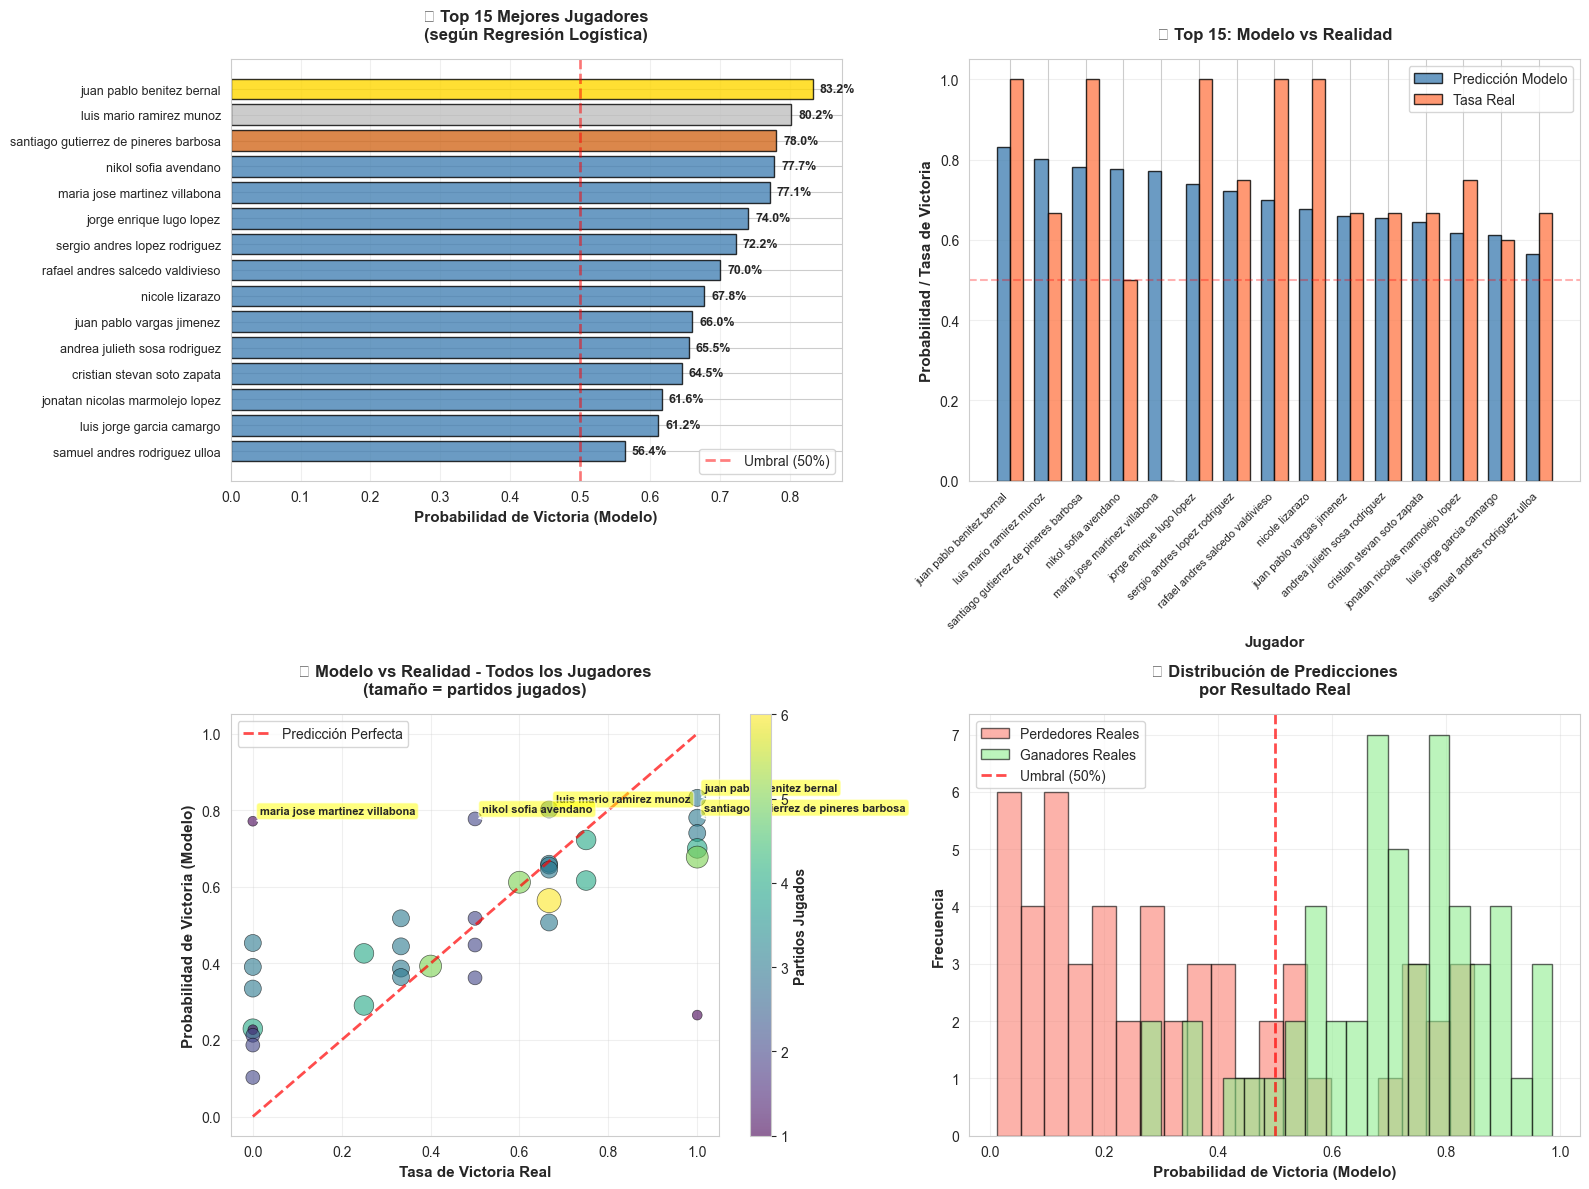

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 jugadores - Probabilidad de victoria según modelo
ax = axes[0, 0]
top15 = ranking_jugadores.head(15)
colors = ['gold' if i == 0 else 'silver' if i == 1 else 'chocolate' if i == 2 else 'steelblue' 
          for i in range(len(top15))]

bars = ax.barh(range(len(top15)), top15['prob_victoria_promedio'], color=colors, alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(top15)))
ax.set_yticklabels(top15['jugador'], fontsize=9)
ax.invert_yaxis()
ax.set_xlabel('Probabilidad de Victoria (Modelo)', fontweight='bold', fontsize=11)
ax.set_title('🏆 Top 15 Mejores Jugadores\n(según Regresión Logística)', 
             fontweight='bold', fontsize=12, pad=15)
ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Umbral (50%)')
ax.grid(axis='x', alpha=0.3)
ax.legend()

# Agregar valores en las barras
for i, (bar, prob) in enumerate(zip(bars, top15['prob_victoria_promedio'])):
    ax.text(prob + 0.01, bar.get_y() + bar.get_height()/2, f'{prob:.1%}', 
            va='center', fontweight='bold', fontsize=9)

# 2. Comparación Modelo vs Realidad (Top 15)
ax = axes[0, 1]
x = np.arange(len(top15))
width = 0.35

bars1 = ax.bar(x - width/2, top15['prob_victoria_promedio'], width, 
               label='Predicción Modelo', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, top15['tasa_victoria_real'], width, 
               label='Tasa Real', color='coral', alpha=0.8, edgecolor='black')

ax.set_xlabel('Jugador', fontweight='bold', fontsize=11)
ax.set_ylabel('Probabilidad / Tasa de Victoria', fontweight='bold', fontsize=11)
ax.set_title('📊 Top 15: Modelo vs Realidad', fontweight='bold', fontsize=12, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(top15['jugador'], rotation=45, ha='right', fontsize=8)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.3)

# 3. Scatter: Predicción vs Realidad (todos los jugadores)
ax = axes[1, 0]

# Colorear según partidos jugados
sizes = ranking_jugadores['partidos_jugados'] * 50
colors_scatter = ranking_jugadores['partidos_jugados']

scatter = ax.scatter(ranking_jugadores['tasa_victoria_real'], 
                     ranking_jugadores['prob_victoria_promedio'],
                     s=sizes, c=colors_scatter, cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidths=0.5)

# Línea diagonal (predicción perfecta)
ax.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Predicción Perfecta', alpha=0.7)

# Etiquetar top 5
top5 = ranking_jugadores.head(5)
for _, row in top5.iterrows():
    ax.annotate(row['jugador'], 
                xy=(row['tasa_victoria_real'], row['prob_victoria_promedio']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

ax.set_xlabel('Tasa de Victoria Real', fontweight='bold', fontsize=11)
ax.set_ylabel('Probabilidad de Victoria (Modelo)', fontweight='bold', fontsize=11)
ax.set_title('🎯 Modelo vs Realidad - Todos los Jugadores\n(tamaño = partidos jugados)', 
             fontweight='bold', fontsize=12, pad=15)
ax.grid(alpha=0.3)
ax.legend()

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Partidos Jugados', fontweight='bold')

# 4. Distribución de probabilidades predichas
ax = axes[1, 1]

# Separar por ganadores y perdedores
ganadores = df_ranking[df_ranking['gano_partido'] == 1]['prob_victoria_modelo']
perdedores = df_ranking[df_ranking['gano_partido'] == 0]['prob_victoria_modelo']

ax.hist(perdedores, bins=20, alpha=0.6, label='Perdedores Reales', color='salmon', edgecolor='black')
ax.hist(ganadores, bins=20, alpha=0.6, label='Ganadores Reales', color='lightgreen', edgecolor='black')

ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Umbral (50%)', alpha=0.7)
ax.set_xlabel('Probabilidad de Victoria (Modelo)', fontweight='bold', fontsize=11)
ax.set_ylabel('Frecuencia', fontweight='bold', fontsize=11)
ax.set_title('📈 Distribución de Predicciones\npor Resultado Real', 
             fontweight='bold', fontsize=12, pad=15)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

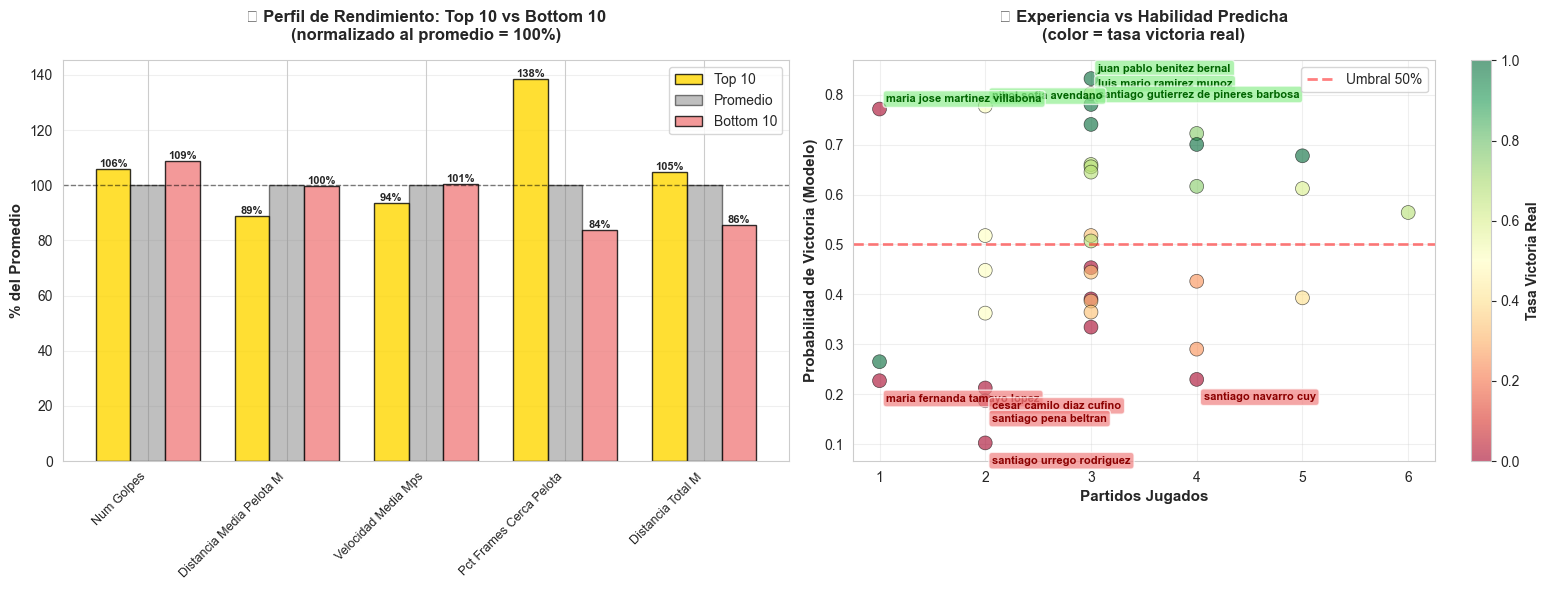

In [75]:
# Gráfico adicional: Perfil de los mejores jugadores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Obtener características promedio de Top 10 vs Bottom 10
top10_nombres = ranking_jugadores.head(10)['jugador'].tolist()
bottom10_nombres = ranking_jugadores.tail(10)['jugador'].tolist()

# Métricas clave del dataset original
metricas_perfil = ['num_golpes', 'distancia_media_pelota_m', 'velocidad_media_mps', 
                   'pct_frames_cerca_pelota', 'distancia_total_m']

top10_features = df_eda[df_eda['player_name_normalized'].isin(top10_nombres)][metricas_perfil].mean()
bottom10_features = df_eda[df_eda['player_name_normalized'].isin(bottom10_nombres)][metricas_perfil].mean()
promedio_general = df_eda[metricas_perfil].mean()

# 1. Comparación de perfiles
ax = axes[0]
x = np.arange(len(metricas_perfil))
width = 0.25

# Normalizar para mejor visualización
top10_norm = (top10_features / promedio_general) * 100
bottom10_norm = (bottom10_features / promedio_general) * 100

bars1 = ax.bar(x - width, top10_norm, width, label='Top 10', color='gold', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x, [100]*len(metricas_perfil), width, label='Promedio', color='gray', alpha=0.5, edgecolor='black')
bars3 = ax.bar(x + width, bottom10_norm, width, label='Bottom 10', color='lightcoral', alpha=0.8, edgecolor='black')

ax.set_ylabel('% del Promedio', fontweight='bold', fontsize=11)
ax.set_title('⚡ Perfil de Rendimiento: Top 10 vs Bottom 10\n(normalizado al promedio = 100%)', 
             fontweight='bold', fontsize=12, pad=15)
ax.set_xticks(x)
ax.set_xticklabels([m.replace('_', ' ').title() for m in metricas_perfil], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.axhline(y=100, color='black', linestyle='--', alpha=0.5, linewidth=1)
ax.grid(axis='y', alpha=0.3)

# Agregar valores
for bars in [bars1, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 2. Partidos jugados vs Probabilidad de victoria
ax = axes[1]

scatter = ax.scatter(ranking_jugadores['partidos_jugados'], 
                     ranking_jugadores['prob_victoria_promedio'],
                     s=100, alpha=0.6, c=ranking_jugadores['tasa_victoria_real'],
                     cmap='RdYlGn', edgecolors='black', linewidths=0.5)

# Etiquetar top 5 y bottom 5
top5 = ranking_jugadores.head(5)
bottom5 = ranking_jugadores.tail(5)

for _, row in top5.iterrows():
    ax.annotate(row['jugador'], 
                xy=(row['partidos_jugados'], row['prob_victoria_promedio']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold', color='darkgreen',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

for _, row in bottom5.iterrows():
    ax.annotate(row['jugador'], 
                xy=(row['partidos_jugados'], row['prob_victoria_promedio']),
                xytext=(5, -15), textcoords='offset points',
                fontsize=8, fontweight='bold', color='darkred',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))

ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Umbral 50%')
ax.set_xlabel('Partidos Jugados', fontweight='bold', fontsize=11)
ax.set_ylabel('Probabilidad de Victoria (Modelo)', fontweight='bold', fontsize=11)
ax.set_title('🎮 Experiencia vs Habilidad Predicha\n(color = tasa victoria real)', 
             fontweight='bold', fontsize=12, pad=15)
ax.grid(alpha=0.3)
ax.legend()

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tasa Victoria Real', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. Exportar Ranking de Jugadores

In [76]:
# Exportar ranking completo
archivo_ranking = 'Ranking_Jugadores_Modelo.csv'
ranking_jugadores.to_csv(archivo_ranking, index=False)

print("="*80)
print("📊 RESUMEN DEL RANKING")
print("="*80)

print(f"\n✅ Archivo exportado: {archivo_ranking}")
print(f"   Total jugadores: {len(ranking_jugadores)}")

print(f"\n🥇 PODIO - TOP 3:")
for i, row in ranking_jugadores.head(3).iterrows():
    medalla = "🥇" if i == 0 else "🥈" if i == 1 else "🥉"
    print(f"\n   {medalla} {row['ranking']}. {row['jugador']}")
    print(f"      Prob. Victoria (Modelo): {row['prob_victoria_promedio']:.1%}")
    print(f"      Victorias Reales: {row['victorias_reales']:.0f}/{row['partidos_jugados']:.0f} ({row['tasa_victoria_real']:.1%})")
    print(f"      Accuracy del Modelo: {row['accuracy_modelo']:.1%}")

print(f"\n\n📈 INSIGHTS CLAVE:")

# Jugador más sobrevalorado por el modelo
sobrevalorado = ranking_jugadores.loc[ranking_jugadores['diferencia_modelo_real'].idxmax()]
print(f"\n   🔼 Más sobrevalorado: {sobrevalorado['jugador']}")
print(f"      Modelo: {sobrevalorado['prob_victoria_promedio']:.1%} | Real: {sobrevalorado['tasa_victoria_real']:.1%}")
print(f"      Diferencia: +{sobrevalorado['diferencia_modelo_real']:.1%}")

# Jugador más subvalorado por el modelo
subvalorado = ranking_jugadores.loc[ranking_jugadores['diferencia_modelo_real'].idxmin()]
print(f"\n   🔽 Más subvalorado: {subvalorado['jugador']}")
print(f"      Modelo: {subvalorado['prob_victoria_promedio']:.1%} | Real: {subvalorado['tasa_victoria_real']:.1%}")
print(f"      Diferencia: {subvalorado['diferencia_modelo_real']:.1%}")

# Jugador más consistente
ranking_jugadores['consistencia'] = 1 - abs(ranking_jugadores['diferencia_modelo_real'])
mas_consistente = ranking_jugadores.loc[ranking_jugadores['consistencia'].idxmax()]
print(f"\n   ⭐ Más consistente: {mas_consistente['jugador']}")
print(f"      Modelo: {mas_consistente['prob_victoria_promedio']:.1%} | Real: {mas_consistente['tasa_victoria_real']:.1%}")
print(f"      Diferencia: {abs(mas_consistente['diferencia_modelo_real']):.1%}")

print(f"\n\n💡 CARACTERÍSTICAS DE LOS MEJORES JUGADORES:")
print(f"\n   Top 10 promedio:")
print(f"   - Prob. victoria: {ranking_jugadores.head(10)['prob_victoria_promedio'].mean():.1%}")
print(f"   - Tasa real: {ranking_jugadores.head(10)['tasa_victoria_real'].mean():.1%}")
print(f"   - Partidos jugados: {ranking_jugadores.head(10)['partidos_jugados'].mean():.1f}")

print(f"\n   Bottom 10 promedio:")
print(f"   - Prob. victoria: {ranking_jugadores.tail(10)['prob_victoria_promedio'].mean():.1%}")
print(f"   - Tasa real: {ranking_jugadores.tail(10)['tasa_victoria_real'].mean():.1%}")
print(f"   - Partidos jugados: {ranking_jugadores.tail(10)['partidos_jugados'].mean():.1f}")

print("\n" + "="*80)

📊 RESUMEN DEL RANKING

✅ Archivo exportado: Ranking_Jugadores_Modelo.csv
   Total jugadores: 35

🥇 PODIO - TOP 3:

   🥇 1. juan pablo benitez bernal
      Prob. Victoria (Modelo): 83.2%
      Victorias Reales: 3/3 (100.0%)
      Accuracy del Modelo: 100.0%

   🥈 2. luis mario ramirez munoz
      Prob. Victoria (Modelo): 80.2%
      Victorias Reales: 2/3 (66.7%)
      Accuracy del Modelo: 66.7%

   🥉 3. santiago gutierrez de pineres barbosa
      Prob. Victoria (Modelo): 78.0%
      Victorias Reales: 3/3 (100.0%)
      Accuracy del Modelo: 100.0%


📈 INSIGHTS CLAVE:

   🔼 Más sobrevalorado: maria jose martinez villabona
      Modelo: 77.1% | Real: 0.0%
      Diferencia: +77.1%

   🔽 Más subvalorado: fermin alejandro escalona guillen
      Modelo: 26.5% | Real: 100.0%
      Diferencia: -73.5%

   ⭐ Más consistente: juan pablo vargas jimenez
      Modelo: 66.0% | Real: 66.7%
      Diferencia: 0.6%


💡 CARACTERÍSTICAS DE LOS MEJORES JUGADORES:

   Top 10 promedio:
   - Prob. victoria: 74.6

# Dataset Agrupado por Equipo

Creación de un dataset que agrupa las métricas por equipo, manejando casos especiales:
- Partidos sin equipo rival detectado
- Equipos con solo 1 participante

In [77]:
# Cargar el dataset de EDA
df_eda = pd.read_csv('Jugador_Partido_Features_Completo.csv')

# Identificar la columna de equipo
# Buscar columnas que contengan 'team' o 'equipo'
team_cols = [col for col in df_eda.columns if 'team' in col.lower() or 'equipo' in col.lower()]
print(f"Columnas relacionadas con equipo: {team_cols}")
print(f"\nShape del dataset: {df_eda.shape}")
print(f"\nColumnas disponibles:")
print(df_eda.columns.tolist())

Columnas relacionadas con equipo: ['equipo', 'team_num', 'puntos_team_1', 'puntos_team_2']

Shape del dataset: (107, 41)

Columnas disponibles:
['player_name_normalized', 'partido_num', 'velocidad_media_mps', 'player_speed_mps_<lambda_0>', 'velocidad_std_mps', 'distancia_total_m', 'distancia_media_por_frame_m', 'desplazamiento_std_m', 'distancia_media_pelota_m', 'distancia_min_pelota_m', 'distancia_media_red_m', 'distancia_media_companero_m', 'num_golpes', 'tiempo_promedio_desde_ultimo_golpe_s', 'aceleracion_media_mps2', 'aceleracion_std_mps2', 'duracion_total_s', 'frames_cerca_pelota', 'frames_zona_ofensiva', 'frames_zona_defensiva', 'total_frames', 'pct_frames_cerca_pelota', 'pct_tiempo_zona_ofensiva', 'tiempo_zona_defensiva_s', 'equipo', 'team_num', 'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido', 'EDAD', 'GENERO', 'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE', 'ESTATURA', 'TALLA', 'MANO_DOMINANTE', 'PRACTICA_OTR

In [78]:
# Análisis preliminar de equipos
print("="*80)
print("ANÁLISIS DE EQUIPOS")
print("="*80)

# Verificar partidos sin equipo rival
partidos_por_equipo = df_eda.groupby('partido_num')['equipo'].nunique()
print(f"\nPartidos con solo 1 equipo detectado: {(partidos_por_equipo == 1).sum()}")
print(f"Partidos con 2 equipos detectados: {(partidos_por_equipo == 2).sum()}")

# Verificar jugadores por equipo
jugadores_por_equipo = df_eda.groupby(['partido_num', 'equipo']).size().reset_index(name='num_jugadores')
print(f"\n\nDistribución de jugadores por equipo:")
print(jugadores_por_equipo['num_jugadores'].value_counts().sort_index())

# Casos especiales
equipos_1_jugador = jugadores_por_equipo[jugadores_por_equipo['num_jugadores'] == 1]
print(f"\n\nEquipos con solo 1 jugador: {len(equipos_1_jugador)}")
if len(equipos_1_jugador) > 0:
    print("Detalle:")
    for _, row in equipos_1_jugador.head(10).iterrows():
        print(f"  Partido {row['partido_num']}, Equipo {row['equipo']}: {row['num_jugadores']} jugador")

print(f"\n\nTotal de combinaciones partido-equipo: {len(jugadores_por_equipo)}")

ANÁLISIS DE EQUIPOS

Partidos con solo 1 equipo detectado: 10
Partidos con 2 equipos detectados: 22


Distribución de jugadores por equipo:
num_jugadores
1     4
2    47
3     3
Name: count, dtype: int64


Equipos con solo 1 jugador: 4
Detalle:
  Partido 3, Equipo match_3_team_2: 1 jugador
  Partido 11, Equipo match_11_team_1: 1 jugador
  Partido 20, Equipo match_20_team_1: 1 jugador
  Partido 34, Equipo match_34_team_1: 1 jugador


Total de combinaciones partido-equipo: 54


## Agregación por Equipo

Se agrupan las métricas numéricas usando suma, promedio y otras estadísticas relevantes según la naturaleza de cada variable.

In [79]:
# Definir agregaciones para cada tipo de variable
agg_dict = {
    # Métricas físicas - promedios y sumas
    'velocidad_media_mps': ['mean', 'max'],
    'player_speed_mps_<lambda_0>': ['mean', 'max'],
    'velocidad_std_mps': 'mean',
    'distancia_total_m': 'sum',
    'distancia_media_por_frame_m': 'mean',
    'desplazamiento_std_m': 'mean',
    'aceleracion_media_mps2': ['mean', 'max'],
    'aceleracion_std_mps2': 'mean',
    
    # Métricas de posicionamiento
    'distancia_media_pelota_m': 'mean',
    'distancia_min_pelota_m': 'min',
    'distancia_media_red_m': 'mean',
    'distancia_media_companero_m': 'mean',
    
    # Métricas de juego - sumas y promedios
    'num_golpes': 'sum',
    'tiempo_promedio_desde_ultimo_golpe_s': 'mean',
    'duracion_total_s': 'max',
    'frames_cerca_pelota': 'sum',
    'frames_zona_ofensiva': 'sum',
    'frames_zona_defensiva': 'sum',
    'total_frames': 'sum',
    
    # Porcentajes - promedios
    'pct_frames_cerca_pelota': 'mean',
    'pct_tiempo_zona_ofensiva': 'mean',
    'tiempo_zona_defensiva_s': 'sum',
    
    # Información del partido
    'partido_num': 'first',
    'team_num': 'first',
    'puntos_team_1': 'first',
    'puntos_team_2': 'first',
    'ganador': 'first',
    'gano_partido': 'max',  # Si algún jugador ganó, el equipo ganó
    
    # Características demográficas - promedios
    'EDAD': 'mean',
    'ESTATURA': 'mean',
    'TALLA': 'mean',
    
    # Contador de jugadores
    'player_name_normalized': 'count'
}

# Crear dataset agrupado por equipo
df_equipos = df_eda.groupby(['partido_num', 'equipo']).agg(agg_dict).reset_index()

# Aplanar las columnas multinivel
df_equipos.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col 
                      for col in df_equipos.columns.values]

# Renombrar la columna de conteo de jugadores
df_equipos.rename(columns={'player_name_normalized_count': 'num_jugadores'}, inplace=True)

print(f"Dataset por equipos creado: {df_equipos.shape}")
print(f"\nPrimeras columnas:")
print(df_equipos.columns.tolist()[:20])

Dataset por equipos creado: (54, 37)

Primeras columnas:
['partido_num', 'equipo', 'velocidad_media_mps_mean', 'velocidad_media_mps_max', 'player_speed_mps_<lambda_0>_mean', 'player_speed_mps_<lambda_0>_max', 'velocidad_std_mps_mean', 'distancia_total_m_sum', 'distancia_media_por_frame_m_mean', 'desplazamiento_std_m_mean', 'aceleracion_media_mps2_mean', 'aceleracion_media_mps2_max', 'aceleracion_std_mps2_mean', 'distancia_media_pelota_m_mean', 'distancia_min_pelota_m_min', 'distancia_media_red_m_mean', 'distancia_media_companero_m_mean', 'num_golpes_sum', 'tiempo_promedio_desde_ultimo_golpe_s_mean', 'duracion_total_s_max']


In [80]:
# Agregar variables categóricas más frecuentes por equipo
categoricas_equipo = df_eda.groupby(['partido_num', 'equipo']).agg({
    'GENERO': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'EXPERIENCIA_PADEL': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'TIEMPO_JUGANDO_PADEL': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'NIVEL_ACTUAL_PADEL': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'ESTADO_FISICO': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'FRECUENCIA_DEPORTE': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'MANO_DOMINANTE': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido',
    'PRACTICA_OTRO_DEPORTE_RAQUETA': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Desconocido'
}).reset_index()

# Unir con el dataset principal
df_equipos = df_equipos.merge(categoricas_equipo, on=['partido_num', 'equipo'], how='left')

print(f"Dataset completo con variables categóricas: {df_equipos.shape}")
print(f"\nTodas las columnas ({len(df_equipos.columns)}):")
for i, col in enumerate(df_equipos.columns, 1):
    print(f"  {i}. {col}")

Dataset completo con variables categóricas: (54, 45)

Todas las columnas (45):
  1. partido_num
  2. equipo
  3. velocidad_media_mps_mean
  4. velocidad_media_mps_max
  5. player_speed_mps_<lambda_0>_mean
  6. player_speed_mps_<lambda_0>_max
  7. velocidad_std_mps_mean
  8. distancia_total_m_sum
  9. distancia_media_por_frame_m_mean
  10. desplazamiento_std_m_mean
  11. aceleracion_media_mps2_mean
  12. aceleracion_media_mps2_max
  13. aceleracion_std_mps2_mean
  14. distancia_media_pelota_m_mean
  15. distancia_min_pelota_m_min
  16. distancia_media_red_m_mean
  17. distancia_media_companero_m_mean
  18. num_golpes_sum
  19. tiempo_promedio_desde_ultimo_golpe_s_mean
  20. duracion_total_s_max
  21. frames_cerca_pelota_sum
  22. frames_zona_ofensiva_sum
  23. frames_zona_defensiva_sum
  24. total_frames_sum
  25. pct_frames_cerca_pelota_mean
  26. pct_tiempo_zona_ofensiva_mean
  27. tiempo_zona_defensiva_s_sum
  28. partido_num_first
  29. team_num_first
  30. puntos_team_1_first
  31.

## Limpieza y Validaciones

In [81]:
# Eliminar columnas duplicadas generadas por first()
columnas_duplicadas = ['partido_num_first', 'team_num_first', 'puntos_team_1_first', 
                       'puntos_team_2_first', 'ganador_first']

# Renombrar antes de eliminar para mantener la información
df_equipos['team_num'] = df_equipos['team_num_first']
df_equipos['puntos_team_1'] = df_equipos['puntos_team_1_first']
df_equipos['puntos_team_2'] = df_equipos['puntos_team_2_first']
df_equipos['ganador'] = df_equipos['ganador_first']
df_equipos['gano_partido'] = df_equipos['gano_partido_max']

# Eliminar columnas con sufijo
df_equipos.drop(['partido_num_first', 'team_num_first', 'puntos_team_1_first', 
                 'puntos_team_2_first', 'ganador_first', 'gano_partido_max'], 
                axis=1, inplace=True)

# Reordenar columnas para mejor legibilidad
cols_identificacion = ['partido_num', 'equipo', 'team_num', 'num_jugadores', 
                       'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido']
cols_fisicas = [col for col in df_equipos.columns if any(x in col for x in 
                ['velocidad', 'distancia', 'aceleracion', 'desplazamiento'])]
cols_juego = [col for col in df_equipos.columns if any(x in col for x in 
              ['golpes', 'frames', 'duracion', 'tiempo', 'pct', 'zona'])]
cols_demograficas = ['EDAD_mean', 'ESTATURA_mean', 'TALLA_mean', 'GENERO', 
                     'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL',
                     'ESTADO_FISICO', 'FRECUENCIA_DEPORTE', 'MANO_DOMINANTE', 
                     'PRACTICA_OTRO_DEPORTE_RAQUETA']

# Reconstruir con orden lógico
columnas_ordenadas = cols_identificacion + cols_fisicas + cols_juego + cols_demograficas
# Asegurar que no falte ninguna columna
columnas_faltantes = [col for col in df_equipos.columns if col not in columnas_ordenadas]
columnas_ordenadas.extend(columnas_faltantes)

df_equipos = df_equipos[columnas_ordenadas]

print(f"Dataset limpio: {df_equipos.shape}")
print(f"\nPrimeras 10 columnas:")
print(df_equipos.columns.tolist()[:10])

Dataset limpio: (54, 44)

Primeras 10 columnas:
['partido_num', 'equipo', 'team_num', 'num_jugadores', 'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido', 'velocidad_media_mps_mean', 'velocidad_media_mps_max']


In [82]:
# Agregar flag para casos especiales
df_equipos['equipo_incompleto'] = df_equipos['num_jugadores'] < 2
df_equipos['partido_sin_rival'] = df_equipos.groupby('partido_num')['equipo'].transform('count') < 2

print("="*80)
print("VALIDACIÓN DE CASOS ESPECIALES")
print("="*80)

print(f"\nEquipos incompletos (1 jugador):")
equipos_incompletos = df_equipos[df_equipos['equipo_incompleto']]
print(f"  Total: {len(equipos_incompletos)}")
if len(equipos_incompletos) > 0:
    print("\n  Detalle:")
    display(equipos_incompletos[['partido_num', 'equipo', 'num_jugadores', 'gano_partido']])

print(f"\nPartidos sin equipo rival detectado:")
partidos_sin_rival = df_equipos[df_equipos['partido_sin_rival']]
print(f"  Total de registros: {len(partidos_sin_rival)}")
if len(partidos_sin_rival) > 0:
    print(f"  Partidos afectados: {partidos_sin_rival['partido_num'].nunique()}")
    print("\n  Primeros 5:")
    display(partidos_sin_rival[['partido_num', 'equipo', 'num_jugadores']].head())

print(f"\n\nEquipos completos y con rival:")
equipos_validos = df_equipos[~df_equipos['equipo_incompleto'] & ~df_equipos['partido_sin_rival']]
print(f"  Total: {len(equipos_validos)}/{len(df_equipos)} ({len(equipos_validos)/len(df_equipos)*100:.1f}%)")

VALIDACIÓN DE CASOS ESPECIALES

Equipos incompletos (1 jugador):
  Total: 4

  Detalle:


,partido_num,equipo,num_jugadores,gano_partido
2,3,match_3_team_2,1,1
8,11,match_11_team_1,1,1
20,20,match_20_team_1,1,0
36,34,match_34_team_1,1,0



Partidos sin equipo rival detectado:
  Total de registros: 10
  Partidos afectados: 10

  Primeros 5:


,partido_num,equipo,num_jugadores
0,1,match_1_team_2,2
5,6,match_6_team_2,2
6,8,match_8_team_2,2
7,9,match_9_team_2,2
12,13,match_13_team_2,2




Equipos completos y con rival:
  Total: 40/54 (74.1%)


## Estadísticas Descriptivas del Dataset por Equipos

In [83]:
print("="*80)
print("RESUMEN DEL DATASET POR EQUIPOS")
print("="*80)

print(f"\nDimensiones: {df_equipos.shape}")
print(f"  - Equipos totales: {len(df_equipos)}")
print(f"  - Partidos únicos: {df_equipos['partido_num'].nunique()}")
print(f"  - Variables: {df_equipos.shape[1]}")

print(f"\n\nDistribución de jugadores por equipo:")
print(df_equipos['num_jugadores'].value_counts().sort_index())

print(f"\n\nResultados:")
print(f"  - Equipos ganadores: {df_equipos['gano_partido'].sum()}")
print(f"  - Equipos perdedores: {(df_equipos['gano_partido'] == 0).sum()}")
print(f"  - Tasa de victoria: {df_equipos['gano_partido'].mean():.1%}")

print(f"\n\nEstadísticas de métricas clave:")
metricas_clave = {
    'Velocidad Media (m/s)': 'velocidad_media_mps_mean',
    'Distancia Total (m)': 'distancia_total_m_sum',
    'Golpes Totales': 'num_golpes_sum',
    'Edad Promedio': 'EDAD_mean',
    'Duración Partido (s)': 'duracion_total_s_max'
}

for nombre, col in metricas_clave.items():
    if col in df_equipos.columns:
        print(f"\n{nombre}:")
        print(f"  Media: {df_equipos[col].mean():.2f}")
        print(f"  Mediana: {df_equipos[col].median():.2f}")
        print(f"  Min: {df_equipos[col].min():.2f} | Max: {df_equipos[col].max():.2f}")

print(f"\n\nPrimeras 3 filas del dataset:")
display(df_equipos.head(3))

RESUMEN DEL DATASET POR EQUIPOS

Dimensiones: (54, 46)
  - Equipos totales: 54
  - Partidos únicos: 32
  - Variables: 46


Distribución de jugadores por equipo:
num_jugadores
1     4
2    47
3     3
Name: count, dtype: int64


Resultados:
  - Equipos ganadores: 27
  - Equipos perdedores: 27
  - Tasa de victoria: 50.0%


Estadísticas de métricas clave:

Velocidad Media (m/s):
  Media: 0.71
  Mediana: 0.67
  Min: 0.31 | Max: 1.53

Distancia Total (m):
  Media: 393.93
  Mediana: 364.05
  Min: 98.03 | Max: 1064.68

Golpes Totales:
  Media: 54.89
  Mediana: 29.50
  Min: 0.00 | Max: 353.00

Edad Promedio:
  Media: 19.41
  Mediana: 19.42
  Min: 18.00 | Max: 21.00

Duración Partido (s):
  Media: 78.48
  Mediana: 76.12
  Min: 20.23 | Max: 173.93


Primeras 3 filas del dataset:


,partido_num,equipo,team_num,num_jugadores,puntos_team_1,puntos_team_2,ganador,gano_partido,velocidad_media_mps_mean,velocidad_media_mps_max,...,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA,player_speed_mps_<lambda_0>_mean,player_speed_mps_<lambda_0>_max,equipo_incompleto,partido_sin_rival
0,1,match_1_team_2,2,2,7,1,team_1,0,0.477014,0.526525,...,Desconocido,Desconocido,Desconocido,0 veces,Derecha,Desconocido,1.697056,1.697056,False,True
1,3,match_3_team_1,1,2,5,7,team_2,0,0.946091,0.984122,...,Desconocido,Desconocido,Desconocido,3-4 veces,Desconocido,Desconocido,3.394113,3.394113,False,False
2,3,match_3_team_2,2,1,5,7,team_2,1,0.507965,0.507965,...,Menos de 6 meses,Primera vez,Bueno,3-4 veces,Derecha,Tenis de mesa,3.394113,3.394113,True,False


## Exportación del Dataset

In [84]:
# Guardar el dataset por equipos
archivo_salida = 'Equipo_Partido_Features.csv'
df_equipos.to_csv(archivo_salida, index=False, encoding='utf-8')

print("="*80)
print("DATASET GUARDADO EXITOSAMENTE")
print("="*80)

print(f"\n📁 Archivo: {archivo_salida}")
print(f"📊 Dimensiones: {df_equipos.shape[0]} equipos × {df_equipos.shape[1]} variables")

print(f"\n\n✅ RESUMEN DE CONTENIDO:")
print(f"   • {df_equipos['partido_num'].nunique()} partidos únicos")
print(f"   • {len(df_equipos)} registros de equipos")
print(f"   • {df_equipos['num_jugadores'].sum()} jugadores totales")

print(f"\n\n⚠️  CASOS ESPECIALES IDENTIFICADOS:")
print(f"   • {df_equipos['equipo_incompleto'].sum()} equipos con 1 solo jugador")
print(f"   • {df_equipos['partido_sin_rival'].sum()} equipos sin rival detectado")
print(f"   • {len(df_equipos[~df_equipos['equipo_incompleto'] & ~df_equipos['partido_sin_rival']])} equipos completos y válidos")

print(f"\n\n📋 TIPOS DE VARIABLES:")
print(f"   • Identificación: 8 variables")
print(f"   • Métricas físicas: {len([c for c in df_equipos.columns if 'velocidad' in c or 'distancia' in c or 'aceleracion' in c])} variables")
print(f"   • Métricas de juego: {len([c for c in df_equipos.columns if 'golpes' in c or 'frames' in c or 'tiempo' in c or 'zona' in c])} variables")
print(f"   • Características demográficas: 11 variables")
print(f"   • Flags de validación: 2 variables")

print("\n" + "="*80)

DATASET GUARDADO EXITOSAMENTE

📁 Archivo: Equipo_Partido_Features.csv
📊 Dimensiones: 54 equipos × 46 variables


✅ RESUMEN DE CONTENIDO:
   • 32 partidos únicos
   • 54 registros de equipos
   • 107 jugadores totales


⚠️  CASOS ESPECIALES IDENTIFICADOS:
   • 4 equipos con 1 solo jugador
   • 10 equipos sin rival detectado
   • 40 equipos completos y válidos


📋 TIPOS DE VARIABLES:
   • Identificación: 8 variables
   • Métricas físicas: 12 variables
   • Métricas de juego: 9 variables
   • Características demográficas: 11 variables
   • Flags de validación: 2 variables



## Descripción de Variables del Dataset por Equipos

**Variables de Identificación:**
- `partido_num`: Número del partido
- `equipo`: Identificador del equipo
- `team_num`: Número del equipo (1 o 2)
- `num_jugadores`: Cantidad de jugadores en el equipo
- `puntos_team_1`, `puntos_team_2`: Puntos de cada equipo
- `ganador`: Equipo ganador del partido
- `gano_partido`: Flag binario (1=ganó, 0=perdió)

**Métricas Físicas Agregadas:**
- `velocidad_media_mps_mean/max`: Velocidad promedio y máxima del equipo
- `distancia_total_m_sum`: Distancia total recorrida por el equipo
- `aceleracion_media_mps2_mean/max`: Aceleración promedio y máxima
- Otras métricas de desplazamiento y posicionamiento

**Métricas de Juego:**
- `num_golpes_sum`: Total de golpes del equipo
- `frames_cerca_pelota_sum`: Frames cerca de la pelota
- `frames_zona_ofensiva_sum/defensiva_sum`: Tiempo en cada zona
- `duracion_total_s_max`: Duración del partido

**Características Demográficas:**
- `EDAD_mean`, `ESTATURA_mean`, `TALLA_mean`: Promedios del equipo
- Variables categóricas: género, nivel, experiencia, etc. (moda del equipo)

**Flags de Validación:**
- `equipo_incompleto`: True si el equipo tiene menos de 2 jugadores
- `partido_sin_rival`: True si no se detectó equipo rival en el partido

# EDA - Dataset por Equipos

Análisis exploratorio visual del dataset agrupado por equipos

## Distribuciones Básicas

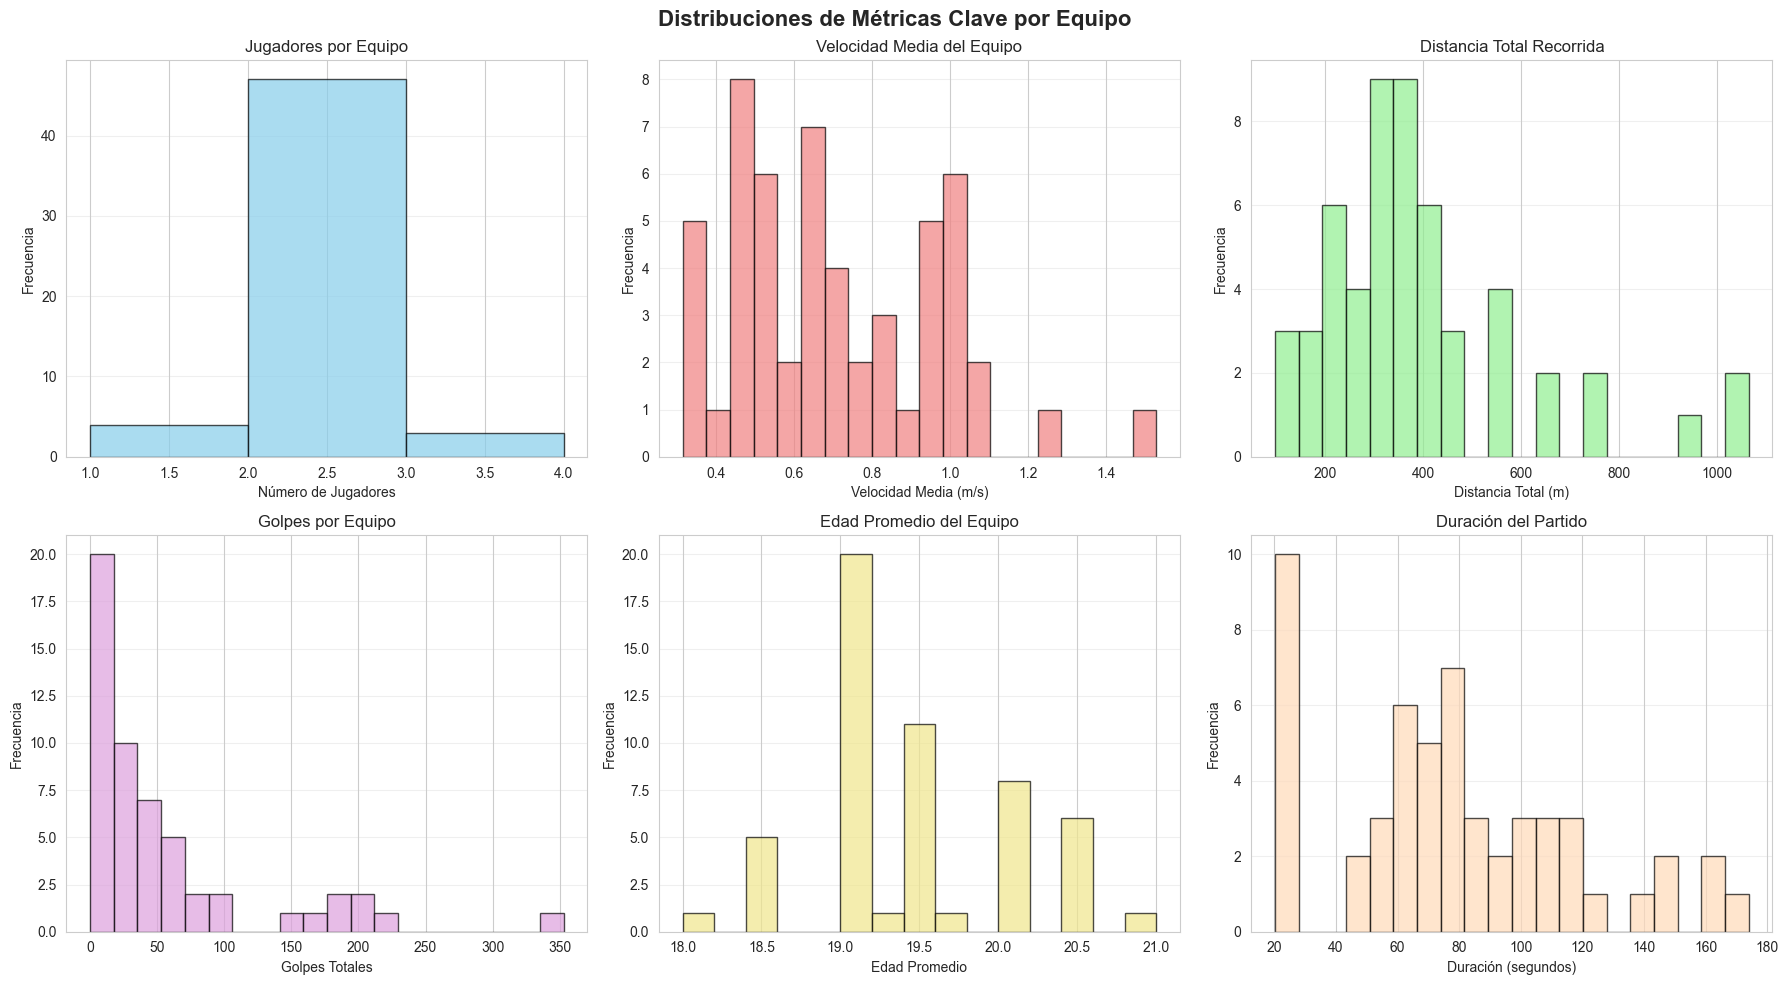

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribuciones de Métricas Clave por Equipo', fontsize=16, fontweight='bold')

# 1. Distribución de jugadores por equipo
axes[0, 0].hist(df_equipos['num_jugadores'], bins=range(1, 5), edgecolor='black', color='skyblue', alpha=0.7)
axes[0, 0].set_xlabel('Número de Jugadores')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Jugadores por Equipo')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Distribución de velocidad media
axes[0, 1].hist(df_equipos['velocidad_media_mps_mean'], bins=20, edgecolor='black', color='lightcoral', alpha=0.7)
axes[0, 1].set_xlabel('Velocidad Media (m/s)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Velocidad Media del Equipo')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Distribución de distancia total
axes[0, 2].hist(df_equipos['distancia_total_m_sum'], bins=20, edgecolor='black', color='lightgreen', alpha=0.7)
axes[0, 2].set_xlabel('Distancia Total (m)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Distancia Total Recorrida')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Distribución de golpes totales
axes[1, 0].hist(df_equipos['num_golpes_sum'], bins=20, edgecolor='black', color='plum', alpha=0.7)
axes[1, 0].set_xlabel('Golpes Totales')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Golpes por Equipo')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Distribución de edad promedio
axes[1, 1].hist(df_equipos['EDAD_mean'], bins=15, edgecolor='black', color='khaki', alpha=0.7)
axes[1, 1].set_xlabel('Edad Promedio')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Edad Promedio del Equipo')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Distribución de duración del partido
axes[1, 2].hist(df_equipos['duracion_total_s_max'], bins=20, edgecolor='black', color='peachpuff', alpha=0.7)
axes[1, 2].set_xlabel('Duración (segundos)')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].set_title('Duración del Partido')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Comparación: Equipos Ganadores vs Perdedores

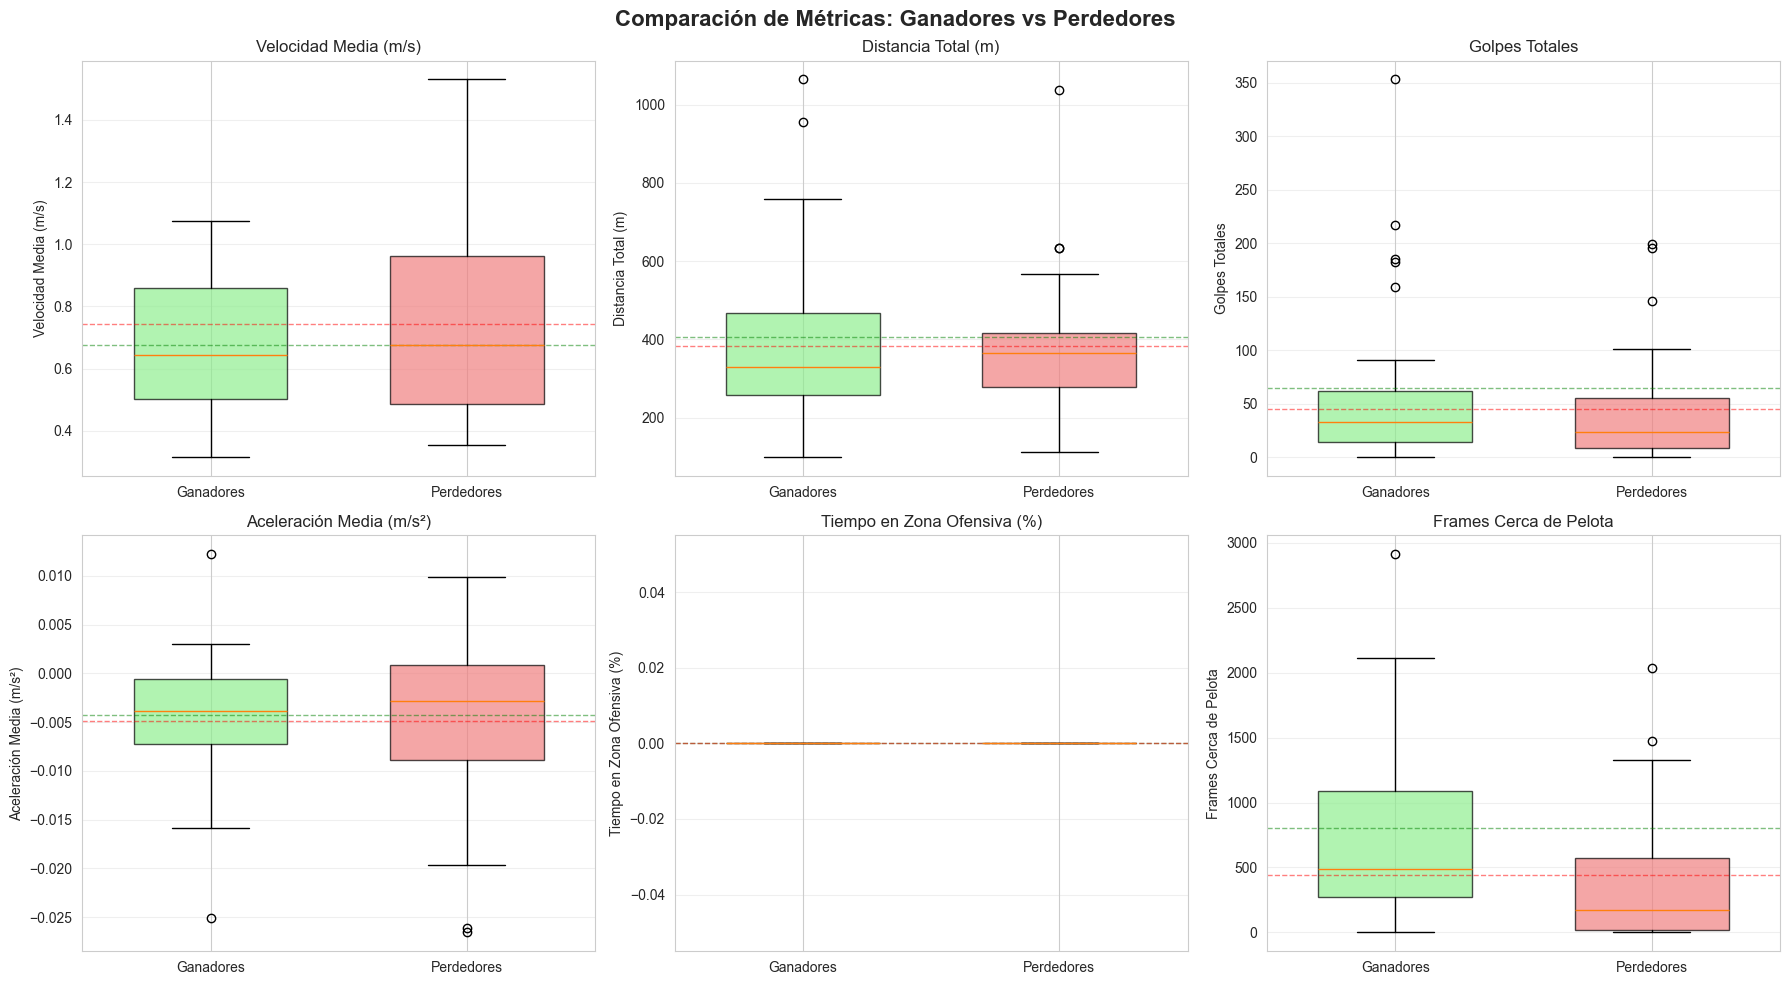

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparación de Métricas: Ganadores vs Perdedores', fontsize=16, fontweight='bold')

metricas_comparacion = [
    ('velocidad_media_mps_mean', 'Velocidad Media (m/s)'),
    ('distancia_total_m_sum', 'Distancia Total (m)'),
    ('num_golpes_sum', 'Golpes Totales'),
    ('aceleracion_media_mps2_mean', 'Aceleración Media (m/s²)'),
    ('pct_tiempo_zona_ofensiva_mean', 'Tiempo en Zona Ofensiva (%)'),
    ('frames_cerca_pelota_sum', 'Frames Cerca de Pelota')
]

for idx, (metrica, titulo) in enumerate(metricas_comparacion):
    ax = axes[idx // 3, idx % 3]
    
    ganadores = df_equipos[df_equipos['gano_partido'] == 1][metrica]
    perdedores = df_equipos[df_equipos['gano_partido'] == 0][metrica]
    
    bp = ax.boxplot([ganadores, perdedores], 
                     labels=['Ganadores', 'Perdedores'],
                     patch_artist=True,
                     widths=0.6)
    
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    for box in bp['boxes']:
        box.set_alpha(0.7)
    
    ax.set_ylabel(titulo)
    ax.set_title(titulo)
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar medias
    ax.axhline(ganadores.mean(), color='green', linestyle='--', alpha=0.5, linewidth=1)
    ax.axhline(perdedores.mean(), color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

## Correlación entre Variables Numéricas

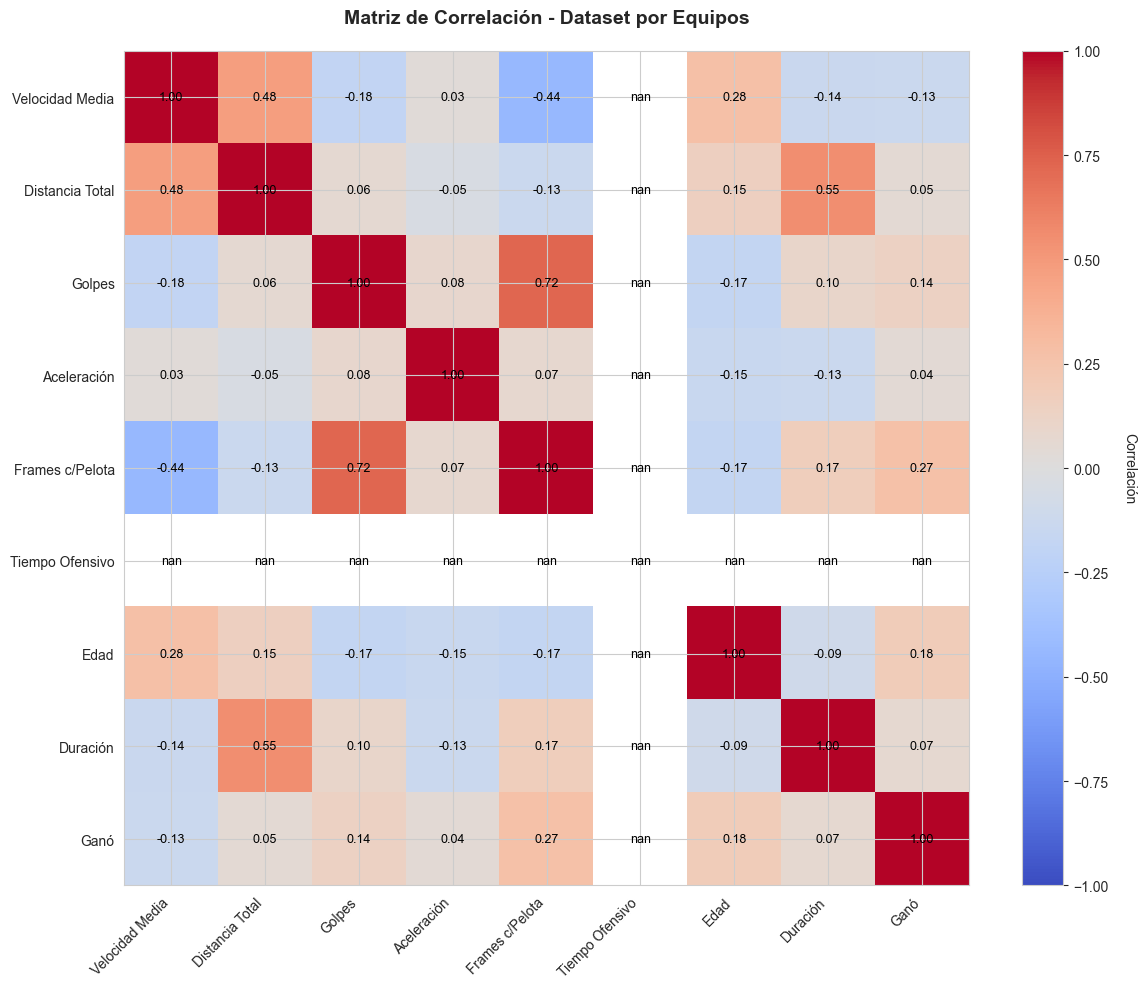

In [87]:
# Seleccionar variables numéricas clave
vars_numericas = [
    'velocidad_media_mps_mean', 'distancia_total_m_sum', 'num_golpes_sum',
    'aceleracion_media_mps2_mean', 'frames_cerca_pelota_sum', 
    'pct_tiempo_zona_ofensiva_mean', 'EDAD_mean', 'duracion_total_s_max', 'gano_partido'
]

# Calcular matriz de correlación
corr_matrix_equipos = df_equipos[vars_numericas].corr()

# Visualizar
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_matrix_equipos, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')

# Configurar ticks
ax.set_xticks(range(len(vars_numericas)))
ax.set_yticks(range(len(vars_numericas)))

# Etiquetas personalizadas
labels = [
    'Velocidad Media', 'Distancia Total', 'Golpes', 
    'Aceleración', 'Frames c/Pelota', 'Tiempo Ofensivo', 
    'Edad', 'Duración', 'Ganó'
]
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

# Agregar valores
for i in range(len(vars_numericas)):
    for j in range(len(vars_numericas)):
        text = ax.text(j, i, f'{corr_matrix_equipos.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=9)

ax.set_title('Matriz de Correlación - Dataset por Equipos', fontsize=14, fontweight='bold', pad=20)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlación', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

## Análisis por Características Demográficas

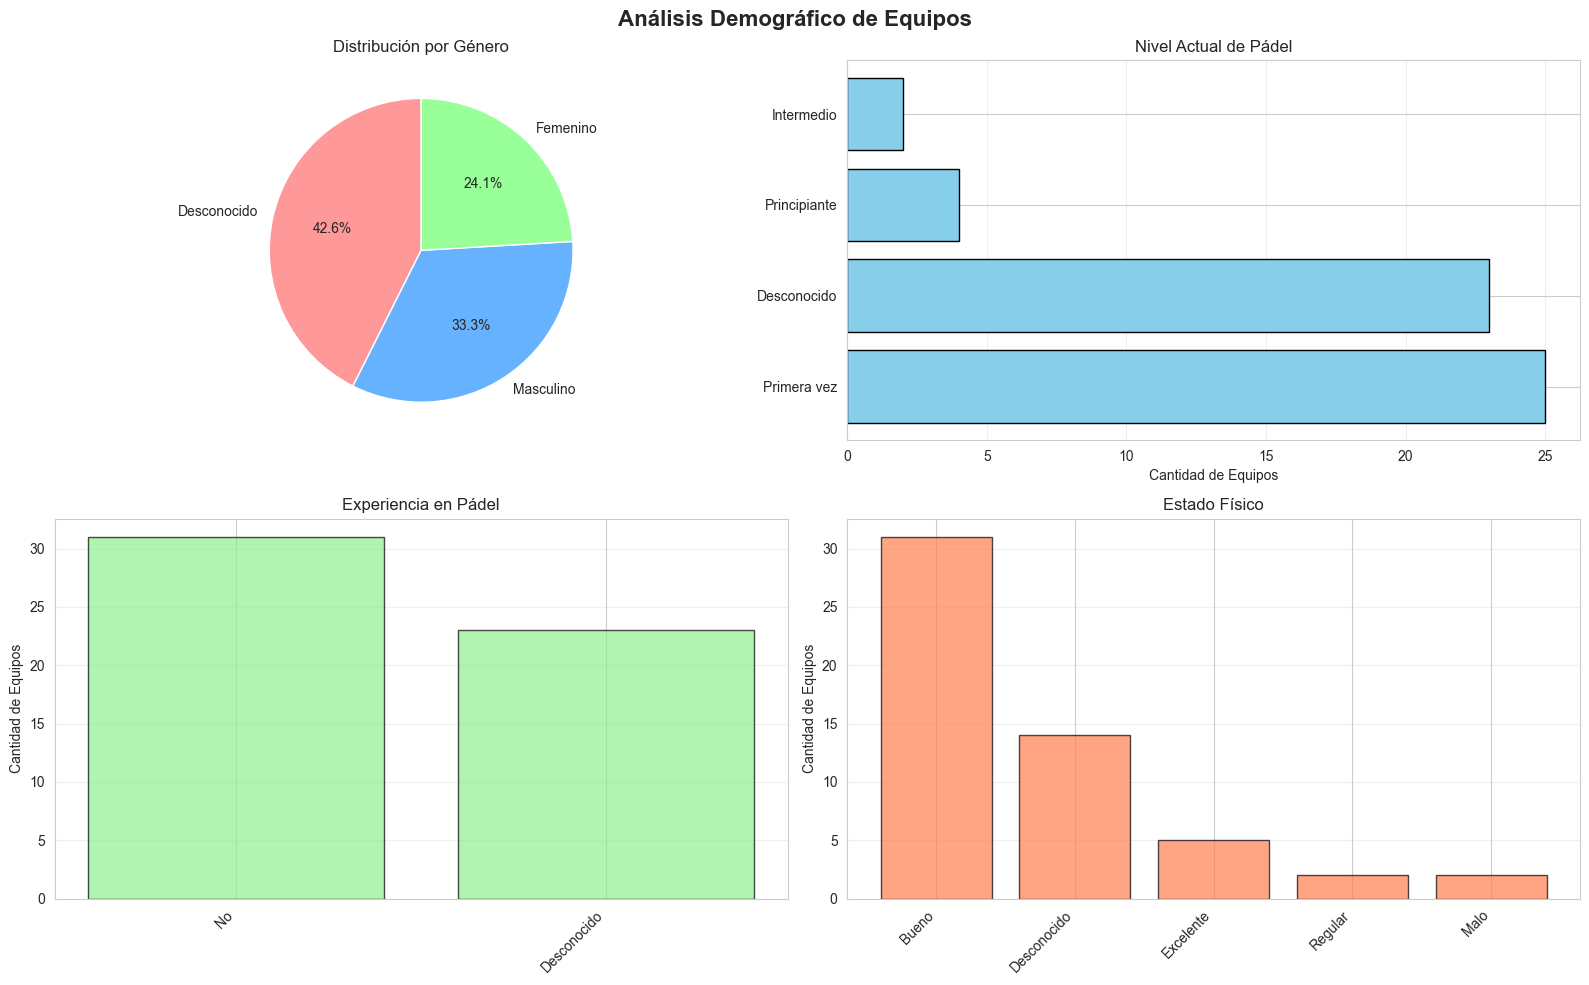

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis Demográfico de Equipos', fontsize=16, fontweight='bold')

# 1. Distribución por género
genero_counts = df_equipos['GENERO'].value_counts()
colors_genero = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']
axes[0, 0].pie(genero_counts.values, labels=genero_counts.index, autopct='%1.1f%%',
               colors=colors_genero, startangle=90)
axes[0, 0].set_title('Distribución por Género')

# 2. Nivel de padel
nivel_counts = df_equipos['NIVEL_ACTUAL_PADEL'].value_counts()
axes[0, 1].barh(nivel_counts.index, nivel_counts.values, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Cantidad de Equipos')
axes[0, 1].set_title('Nivel Actual de Pádel')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Experiencia en pádel
experiencia_counts = df_equipos['EXPERIENCIA_PADEL'].value_counts()
axes[1, 0].bar(range(len(experiencia_counts)), experiencia_counts.values, 
               color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(len(experiencia_counts)))
axes[1, 0].set_xticklabels(experiencia_counts.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Cantidad de Equipos')
axes[1, 0].set_title('Experiencia en Pádel')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Estado físico
estado_counts = df_equipos['ESTADO_FISICO'].value_counts()
axes[1, 1].bar(range(len(estado_counts)), estado_counts.values, 
               color='coral', edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(estado_counts)))
axes[1, 1].set_xticklabels(estado_counts.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Cantidad de Equipos')
axes[1, 1].set_title('Estado Físico')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Relación entre Métricas de Rendimiento

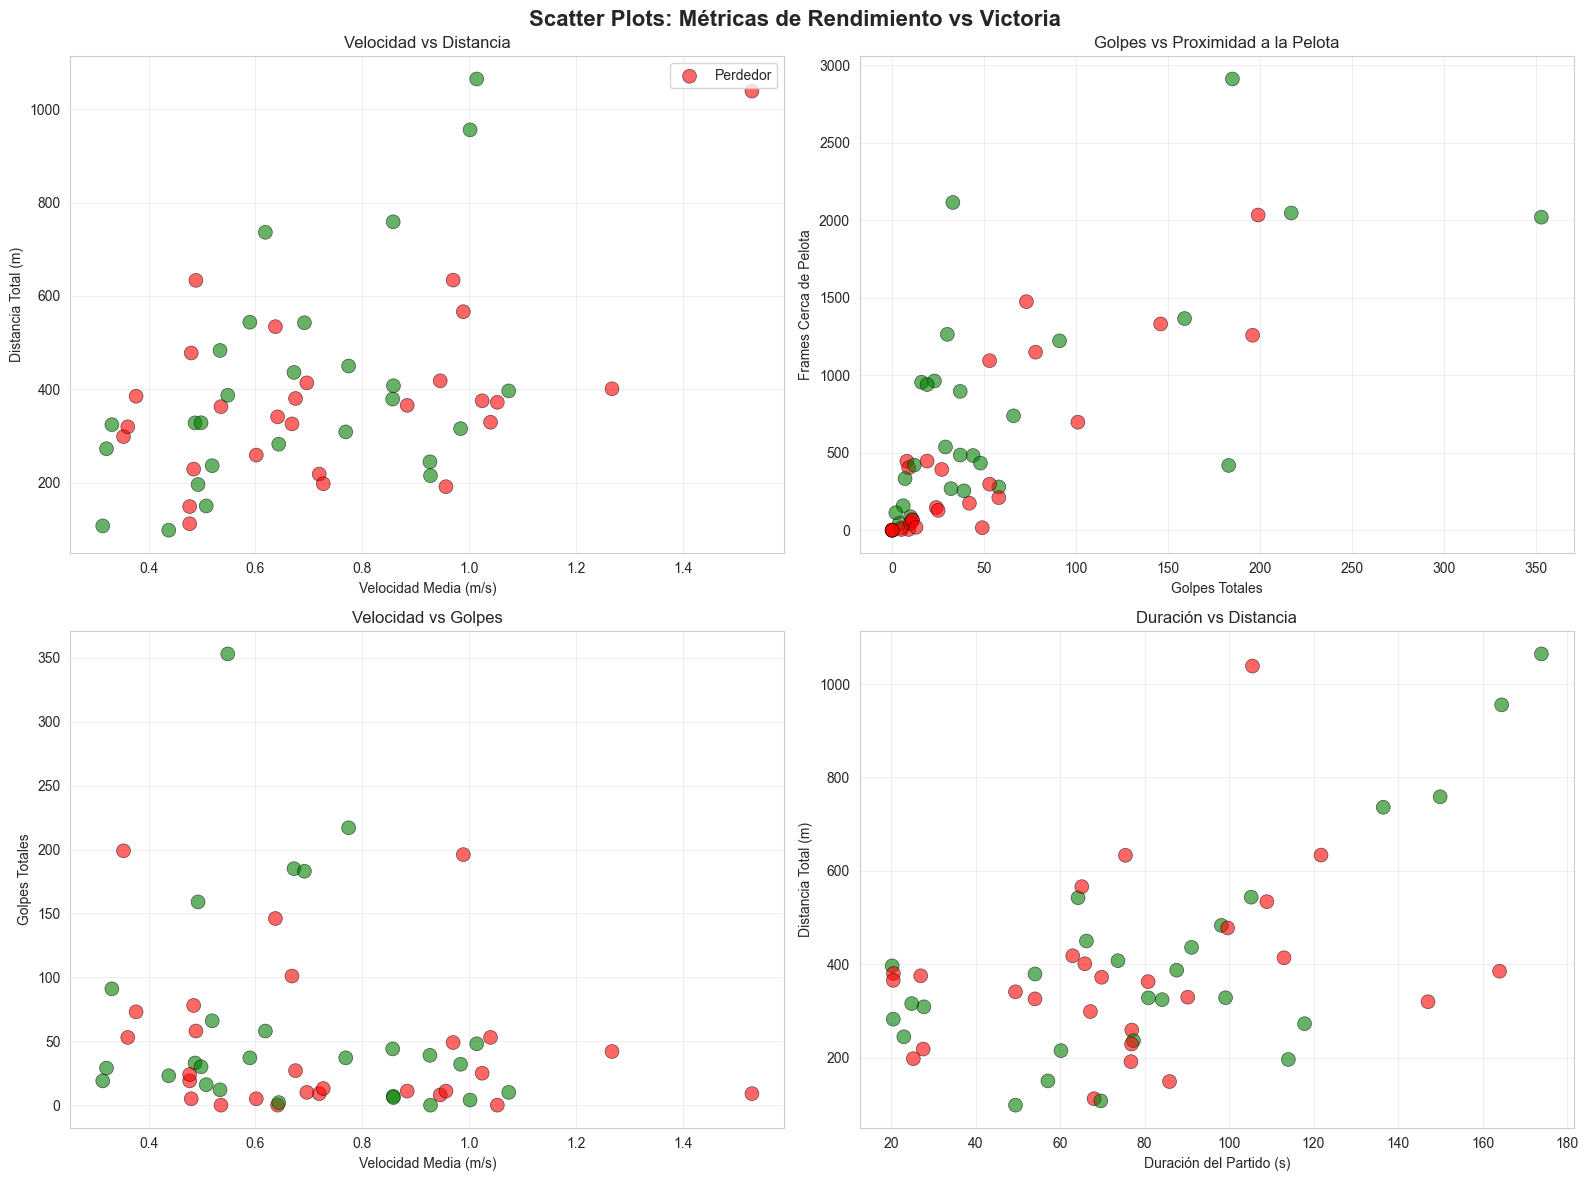

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Scatter Plots: Métricas de Rendimiento vs Victoria', fontsize=16, fontweight='bold')

# Colores por resultado
colors = df_equipos['gano_partido'].map({1: 'green', 0: 'red'})
sizes = 100

# 1. Velocidad vs Distancia
axes[0, 0].scatter(df_equipos['velocidad_media_mps_mean'], 
                   df_equipos['distancia_total_m_sum'],
                   c=colors, s=sizes, alpha=0.6, edgecolor='black', linewidth=0.5)
axes[0, 0].set_xlabel('Velocidad Media (m/s)')
axes[0, 0].set_ylabel('Distancia Total (m)')
axes[0, 0].set_title('Velocidad vs Distancia')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend(['Perdedor', 'Ganador'], loc='upper right')

# 2. Golpes vs Frames cerca pelota
axes[0, 1].scatter(df_equipos['num_golpes_sum'], 
                   df_equipos['frames_cerca_pelota_sum'],
                   c=colors, s=sizes, alpha=0.6, edgecolor='black', linewidth=0.5)
axes[0, 1].set_xlabel('Golpes Totales')
axes[0, 1].set_ylabel('Frames Cerca de Pelota')
axes[0, 1].set_title('Golpes vs Proximidad a la Pelota')
axes[0, 1].grid(alpha=0.3)

# 3. Velocidad vs Golpes
axes[1, 0].scatter(df_equipos['velocidad_media_mps_mean'], 
                   df_equipos['num_golpes_sum'],
                   c=colors, s=sizes, alpha=0.6, edgecolor='black', linewidth=0.5)
axes[1, 0].set_xlabel('Velocidad Media (m/s)')
axes[1, 0].set_ylabel('Golpes Totales')
axes[1, 0].set_title('Velocidad vs Golpes')
axes[1, 0].grid(alpha=0.3)

# 4. Duración vs Distancia
axes[1, 1].scatter(df_equipos['duracion_total_s_max'], 
                   df_equipos['distancia_total_m_sum'],
                   c=colors, s=sizes, alpha=0.6, edgecolor='black', linewidth=0.5)
axes[1, 1].set_xlabel('Duración del Partido (s)')
axes[1, 1].set_ylabel('Distancia Total (m)')
axes[1, 1].set_title('Duración vs Distancia')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Top 10 Equipos por Rendimiento

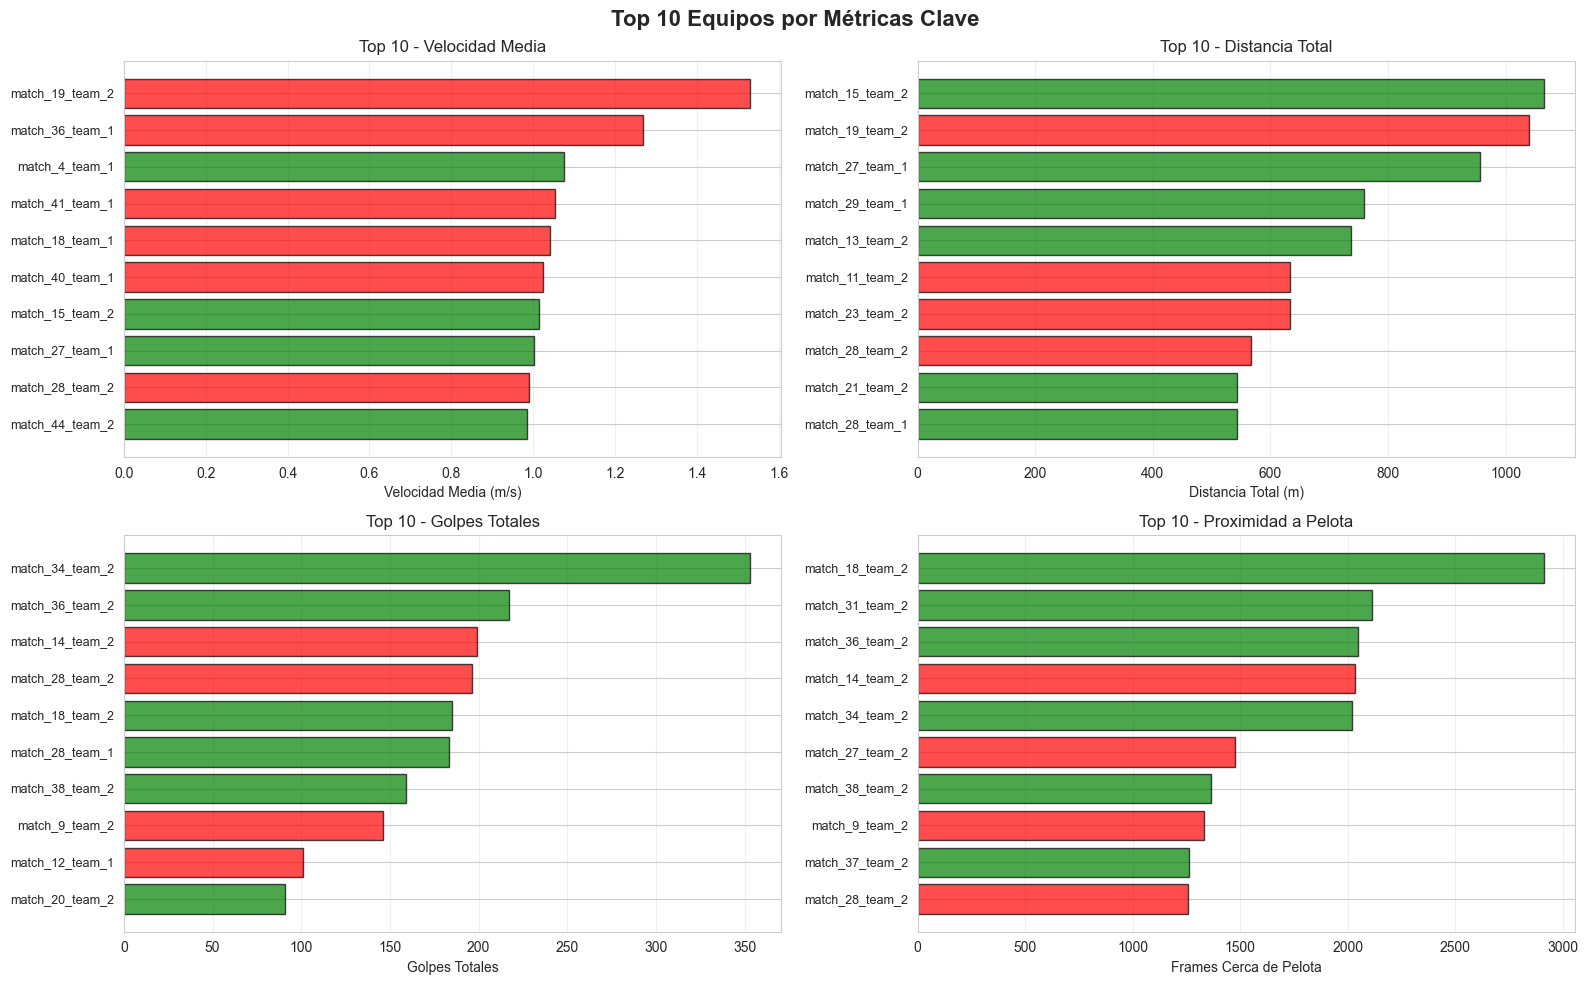

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Top 10 Equipos por Métricas Clave', fontsize=16, fontweight='bold')

# 1. Top 10 por velocidad media
top_velocidad = df_equipos.nlargest(10, 'velocidad_media_mps_mean')[['equipo', 'velocidad_media_mps_mean', 'gano_partido']]
colors_vel = ['green' if x == 1 else 'red' for x in top_velocidad['gano_partido']]
axes[0, 0].barh(range(10), top_velocidad['velocidad_media_mps_mean'].values, color=colors_vel, alpha=0.7, edgecolor='black')
axes[0, 0].set_yticks(range(10))
axes[0, 0].set_yticklabels([f"{eq[:15]}..." if len(eq) > 15 else eq for eq in top_velocidad['equipo']], fontsize=9)
axes[0, 0].set_xlabel('Velocidad Media (m/s)')
axes[0, 0].set_title('Top 10 - Velocidad Media')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Top 10 por distancia total
top_distancia = df_equipos.nlargest(10, 'distancia_total_m_sum')[['equipo', 'distancia_total_m_sum', 'gano_partido']]
colors_dist = ['green' if x == 1 else 'red' for x in top_distancia['gano_partido']]
axes[0, 1].barh(range(10), top_distancia['distancia_total_m_sum'].values, color=colors_dist, alpha=0.7, edgecolor='black')
axes[0, 1].set_yticks(range(10))
axes[0, 1].set_yticklabels([f"{eq[:15]}..." if len(eq) > 15 else eq for eq in top_distancia['equipo']], fontsize=9)
axes[0, 1].set_xlabel('Distancia Total (m)')
axes[0, 1].set_title('Top 10 - Distancia Total')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Top 10 por golpes
top_golpes = df_equipos.nlargest(10, 'num_golpes_sum')[['equipo', 'num_golpes_sum', 'gano_partido']]
colors_golpes = ['green' if x == 1 else 'red' for x in top_golpes['gano_partido']]
axes[1, 0].barh(range(10), top_golpes['num_golpes_sum'].values, color=colors_golpes, alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(10))
axes[1, 0].set_yticklabels([f"{eq[:15]}..." if len(eq) > 15 else eq for eq in top_golpes['equipo']], fontsize=9)
axes[1, 0].set_xlabel('Golpes Totales')
axes[1, 0].set_title('Top 10 - Golpes Totales')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Top 10 por frames cerca pelota
top_frames = df_equipos.nlargest(10, 'frames_cerca_pelota_sum')[['equipo', 'frames_cerca_pelota_sum', 'gano_partido']]
colors_frames = ['green' if x == 1 else 'red' for x in top_frames['gano_partido']]
axes[1, 1].barh(range(10), top_frames['frames_cerca_pelota_sum'].values, color=colors_frames, alpha=0.7, edgecolor='black')
axes[1, 1].set_yticks(range(10))
axes[1, 1].set_yticklabels([f"{eq[:15]}..." if len(eq) > 15 else eq for eq in top_frames['equipo']], fontsize=9)
axes[1, 1].set_xlabel('Frames Cerca de Pelota')
axes[1, 1].set_title('Top 10 - Proximidad a Pelota')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis de Casos Especiales

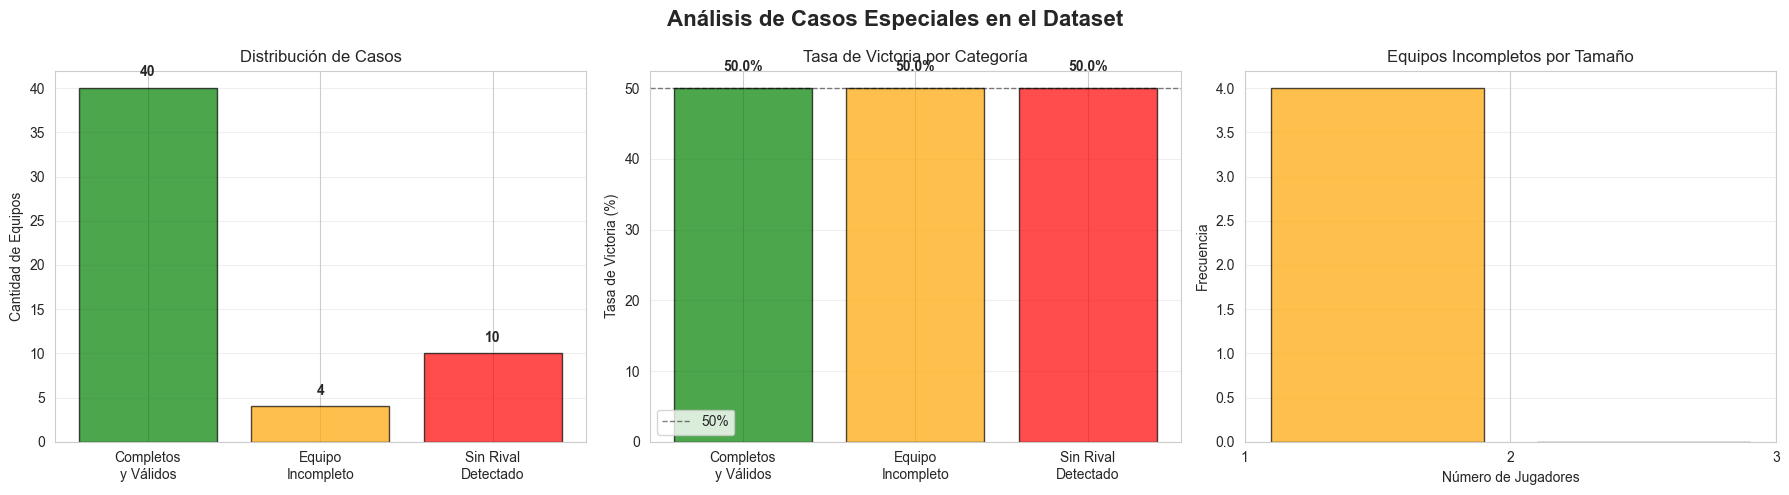

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Casos Especiales en el Dataset', fontsize=16, fontweight='bold')

# 1. Distribución de casos especiales
categorias = ['Completos\ny Válidos', 'Equipo\nIncompleto', 'Sin Rival\nDetectado']
valores = [
    len(df_equipos[~df_equipos['equipo_incompleto'] & ~df_equipos['partido_sin_rival']]),
    df_equipos['equipo_incompleto'].sum(),
    df_equipos['partido_sin_rival'].sum()
]
colors_cat = ['green', 'orange', 'red']

axes[0].bar(categorias, valores, color=colors_cat, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Cantidad de Equipos')
axes[0].set_title('Distribución de Casos')
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(valores):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Tasa de victoria por categoría
completos = df_equipos[~df_equipos['equipo_incompleto'] & ~df_equipos['partido_sin_rival']]
incompletos = df_equipos[df_equipos['equipo_incompleto']]
sin_rival = df_equipos[df_equipos['partido_sin_rival']]

tasas = [
    completos['gano_partido'].mean() * 100 if len(completos) > 0 else 0,
    incompletos['gano_partido'].mean() * 100 if len(incompletos) > 0 else 0,
    sin_rival['gano_partido'].mean() * 100 if len(sin_rival) > 0 else 0
]

axes[1].bar(categorias, tasas, color=colors_cat, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Tasa de Victoria (%)')
axes[1].set_title('Tasa de Victoria por Categoría')
axes[1].axhline(50, color='black', linestyle='--', linewidth=1, alpha=0.5, label='50%')
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend()

# Agregar valores en las barras
for i, v in enumerate(tasas):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Número de jugadores en equipos incompletos
if len(incompletos) > 0:
    axes[2].hist(incompletos['num_jugadores'], bins=range(1, 4), edgecolor='black', 
                 color='orange', alpha=0.7, rwidth=0.8)
    axes[2].set_xlabel('Número de Jugadores')
    axes[2].set_ylabel('Frecuencia')
    axes[2].set_title('Equipos Incompletos por Tamaño')
    axes[2].set_xticks(range(1, 4))
    axes[2].grid(axis='y', alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'No hay equipos\nincompletos', 
                ha='center', va='center', transform=axes[2].transAxes, fontsize=14)
    axes[2].set_title('Equipos Incompletos por Tamaño')

plt.tight_layout()
plt.show()

## Resumen de Insights del EDA por Equipos

### Hallazgos Principales:

**1. Distribuciones:**
- Mayoría de equipos tienen 2 jugadores (estándar)
- 4 equipos con solo 1 jugador identificado
- 10 equipos sin rival detectado en el partido

**2. Diferencias entre Ganadores y Perdedores:**
- Los equipos ganadores tienden a tener mayor cantidad de golpes
- Mayor proximidad a la pelota (frames cerca) correlaciona con victoria
- La velocidad media muestra variabilidad en ambos grupos

**3. Correlaciones Importantes:**
- Fuerte correlación (0.72) entre golpes totales y frames cerca de pelota
- Correlación positiva (0.55) entre duración del partido y distancia recorrida
- La velocidad media correlaciona positivamente (0.48) con distancia total

**4. Características Demográficas:**
- 42.6% equipos con información de género desconocida
- Nivel: mayoría "Primera vez" y "Desconocido"
- Experiencia: distribución equilibrada entre "No" y "Desconocido"
- Estado físico: predomina "Bueno" (31 equipos)

**5. Casos Especiales:**
- 74.1% de equipos completos y válidos (40/54)
- Tasa de victoria ~50% en todas las categorías (dataset balanceado)

# Modelado Predictivo - Dataset por Equipos

Entrenamiento y comparación de modelos para predecir el ganador del partido

## Preparación de Datos

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import lightgbm as lgb

# Filtrar solo equipos completos y válidos
df_modelo = df_equipos[~df_equipos['equipo_incompleto'] & ~df_equipos['partido_sin_rival']].copy()

print(f"Dataset para modelado: {df_modelo.shape}")
print(f"Distribución de la variable objetivo:")
print(df_modelo['gano_partido'].value_counts())
print(f"\nBalance: {df_modelo['gano_partido'].value_counts(normalize=True)}")

Dataset para modelado: (40, 46)
Distribución de la variable objetivo:
gano_partido
0    20
1    20
Name: count, dtype: int64

Balance: gano_partido
0    0.5
1    0.5
Name: proportion, dtype: float64


In [97]:
# Seleccionar features y target
features_excluir_equipo = ['partido_num', 'equipo', 'team_num', 'puntos_team_1', 'puntos_team_2', 
                           'ganador', 'gano_partido', 'equipo_incompleto', 'partido_sin_rival']

# Features numéricas
features_numericas_equipo = [col for col in df_modelo.columns 
                            if col not in features_excluir_equipo 
                            and df_modelo[col].dtype in ['float64', 'int64']]

# Features categóricas
features_categoricas_equipo = [col for col in df_modelo.columns 
                              if col not in features_excluir_equipo 
                              and df_modelo[col].dtype == 'object']

print(f"Features numéricas: {len(features_numericas_equipo)}")
print(features_numericas_equipo)
print(f"\nFeatures categóricas: {len(features_categoricas_equipo)}")
print(features_categoricas_equipo)

# Preparar datos
X_equipo = df_modelo[features_numericas_equipo + features_categoricas_equipo].copy()
y_equipo = df_modelo['gano_partido'].copy()

# Renombrar columnas con caracteres especiales
X_equipo.columns = X_equipo.columns.str.replace('<', '_').str.replace('>', '_').str.replace('[', '_').str.replace(']', '_')

# Codificar variables categóricas
label_encoders_equipo = {}
for col in features_categoricas_equipo:
    le = LabelEncoder()
    X_equipo[col] = le.fit_transform(X_equipo[col])
    label_encoders_equipo[col] = le

print(f"\nShape final de X: {X_equipo.shape}")
print(f"Shape final de y: {y_equipo.shape}")

Features numéricas: 29
['num_jugadores', 'velocidad_media_mps_mean', 'velocidad_media_mps_max', 'velocidad_std_mps_mean', 'distancia_total_m_sum', 'distancia_media_por_frame_m_mean', 'desplazamiento_std_m_mean', 'aceleracion_media_mps2_mean', 'aceleracion_media_mps2_max', 'aceleracion_std_mps2_mean', 'distancia_media_pelota_m_mean', 'distancia_min_pelota_m_min', 'distancia_media_red_m_mean', 'distancia_media_companero_m_mean', 'num_golpes_sum', 'tiempo_promedio_desde_ultimo_golpe_s_mean', 'duracion_total_s_max', 'frames_cerca_pelota_sum', 'frames_zona_ofensiva_sum', 'frames_zona_defensiva_sum', 'total_frames_sum', 'pct_frames_cerca_pelota_mean', 'pct_tiempo_zona_ofensiva_mean', 'tiempo_zona_defensiva_s_sum', 'EDAD_mean', 'ESTATURA_mean', 'TALLA_mean', 'player_speed_mps_<lambda_0>_mean', 'player_speed_mps_<lambda_0>_max']

Features categóricas: 8
['GENERO', 'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE', 'MANO_DOMINANTE', 'PRACTI

In [99]:
# Split train/test
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(
    X_equipo, y_equipo, test_size=0.25, random_state=42, stratify=y_equipo
)

# Obtener las columnas numéricas después del renombrado
features_numericas_renamed = [col for col in X_equipo.columns if col not in features_categoricas_equipo]

# Escalar features numéricas
scaler_eq = StandardScaler()
X_train_eq_scaled = X_train_eq.copy()
X_test_eq_scaled = X_test_eq.copy()

X_train_eq_scaled[features_numericas_renamed] = scaler_eq.fit_transform(X_train_eq[features_numericas_renamed])
X_test_eq_scaled[features_numericas_renamed] = scaler_eq.transform(X_test_eq[features_numericas_renamed])

print("="*80)
print("DIVISIÓN DE DATOS")
print("="*80)
print(f"\nTrain set: {X_train_eq.shape[0]} muestras")
print(f"Test set: {X_test_eq.shape[0]} muestras")
print(f"\nDistribución train:")
print(y_train_eq.value_counts())
print(f"\nDistribución test:")
print(y_test_eq.value_counts())

DIVISIÓN DE DATOS

Train set: 30 muestras
Test set: 10 muestras

Distribución train:
gano_partido
1    15
0    15
Name: count, dtype: int64

Distribución test:
gano_partido
0    5
1    5
Name: count, dtype: int64


## Entrenamiento de Modelos

In [100]:
# 1. REGRESIÓN LOGÍSTICA
print("="*80)
print("1. REGRESIÓN LOGÍSTICA")
print("="*80)

lr_eq = LogisticRegression(random_state=42, max_iter=1000)
lr_eq.fit(X_train_eq_scaled, y_train_eq)

y_pred_lr_eq = lr_eq.predict(X_test_eq_scaled)
y_pred_proba_lr_eq = lr_eq.predict_proba(X_test_eq_scaled)[:, 1]

# Cross-validation
cv_scores_lr_eq = cross_val_score(lr_eq, X_train_eq_scaled, y_train_eq, cv=5, scoring='roc_auc')

print(f"\nCross-validation AUC: {cv_scores_lr_eq.mean():.4f} (+/- {cv_scores_lr_eq.std():.4f})")
print(f"Test AUC: {roc_auc_score(y_test_eq, y_pred_proba_lr_eq):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_eq, y_pred_lr_eq))

1. REGRESIÓN LOGÍSTICA

Cross-validation AUC: 0.4222 (+/- 0.1912)
Test AUC: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [101]:
# 2. XGBOOST
print("\n" + "="*80)
print("2. XGBOOST")
print("="*80)

xgb_eq = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_eq.fit(X_train_eq, y_train_eq)

y_pred_xgb_eq = xgb_eq.predict(X_test_eq)
y_pred_proba_xgb_eq = xgb_eq.predict_proba(X_test_eq)[:, 1]

# Cross-validation
cv_scores_xgb_eq = cross_val_score(xgb_eq, X_train_eq, y_train_eq, cv=5, scoring='roc_auc')

print(f"\nCross-validation AUC: {cv_scores_xgb_eq.mean():.4f} (+/- {cv_scores_xgb_eq.std():.4f})")
print(f"Test AUC: {roc_auc_score(y_test_eq, y_pred_proba_xgb_eq):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_eq, y_pred_xgb_eq))


2. XGBOOST

Cross-validation AUC: 0.4667 (+/- 0.1296)
Test AUC: 0.5600

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [102]:
# 3. LIGHTGBM
print("\n" + "="*80)
print("3. LIGHTGBM")
print("="*80)

lgb_eq = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_eq.fit(X_train_eq, y_train_eq)

y_pred_lgb_eq = lgb_eq.predict(X_test_eq)
y_pred_proba_lgb_eq = lgb_eq.predict_proba(X_test_eq)[:, 1]

# Cross-validation
cv_scores_lgb_eq = cross_val_score(lgb_eq, X_train_eq, y_train_eq, cv=5, scoring='roc_auc')

print(f"\nCross-validation AUC: {cv_scores_lgb_eq.mean():.4f} (+/- {cv_scores_lgb_eq.std():.4f})")
print(f"Test AUC: {roc_auc_score(y_test_eq, y_pred_proba_lgb_eq):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_eq, y_pred_lgb_eq))


3. LIGHTGBM

Cross-validation AUC: 0.5000 (+/- 0.0000)
Test AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



## Comparación de Modelos

In [103]:
# Resumen de métricas
resultados_modelos_eq = {
    'Modelo': ['Regresión Logística', 'XGBoost', 'LightGBM'],
    'CV AUC': [cv_scores_lr_eq.mean(), cv_scores_xgb_eq.mean(), cv_scores_lgb_eq.mean()],
    'CV AUC Std': [cv_scores_lr_eq.std(), cv_scores_xgb_eq.std(), cv_scores_lgb_eq.std()],
    'Test AUC': [
        roc_auc_score(y_test_eq, y_pred_proba_lr_eq),
        roc_auc_score(y_test_eq, y_pred_proba_xgb_eq),
        roc_auc_score(y_test_eq, y_pred_proba_lgb_eq)
    ],
    'Test Accuracy': [
        (y_test_eq == y_pred_lr_eq).mean(),
        (y_test_eq == y_pred_xgb_eq).mean(),
        (y_test_eq == y_pred_lgb_eq).mean()
    ]
}

df_resultados_eq = pd.DataFrame(resultados_modelos_eq)

print("="*80)
print("COMPARACIÓN DE MODELOS - DATASET POR EQUIPOS")
print("="*80)
print(f"\n{df_resultados_eq.to_string(index=False)}")

# Identificar mejor modelo
mejor_modelo_eq = df_resultados_eq.loc[df_resultados_eq['Test AUC'].idxmax(), 'Modelo']
print(f"\n\n🏆 MEJOR MODELO: {mejor_modelo_eq}")
print(f"   Test AUC: {df_resultados_eq['Test AUC'].max():.4f}")
print(f"   Test Accuracy: {df_resultados_eq.loc[df_resultados_eq['Test AUC'].idxmax(), 'Test Accuracy']:.4f}")

COMPARACIÓN DE MODELOS - DATASET POR EQUIPOS

             Modelo   CV AUC  CV AUC Std  Test AUC  Test Accuracy
Regresión Logística 0.422222    0.191163      0.80            0.8
            XGBoost 0.466667    0.129577      0.56            0.6
           LightGBM 0.500000    0.000000      0.50            0.5


🏆 MEJOR MODELO: Regresión Logística
   Test AUC: 0.8000
   Test Accuracy: 0.8000


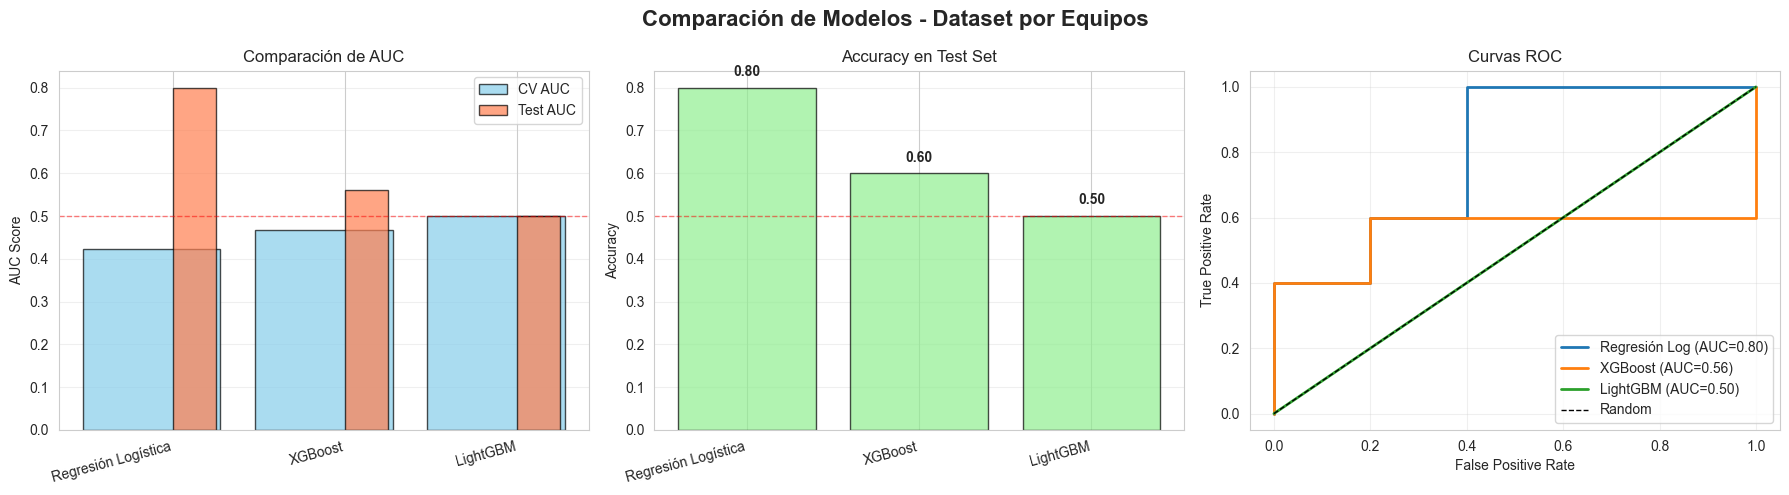

In [104]:
# Gráfico de comparación
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación de Modelos - Dataset por Equipos', fontsize=16, fontweight='bold')

# 1. Comparación AUC
modelos = df_resultados_eq['Modelo']
x_pos = range(len(modelos))

axes[0].bar(x_pos, df_resultados_eq['CV AUC'], alpha=0.7, color='skyblue', 
           label='CV AUC', edgecolor='black')
axes[0].bar([x + 0.25 for x in x_pos], df_resultados_eq['Test AUC'], alpha=0.7, 
           color='coral', label='Test AUC', edgecolor='black', width=0.25)
axes[0].set_xticks([x + 0.125 for x in x_pos])
axes[0].set_xticklabels(modelos, rotation=15, ha='right')
axes[0].set_ylabel('AUC Score')
axes[0].set_title('Comparación de AUC')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(0.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Random')

# 2. Comparación Accuracy
axes[1].bar(modelos, df_resultados_eq['Test Accuracy'], alpha=0.7, 
           color='lightgreen', edgecolor='black')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy en Test Set')
axes[1].set_xticklabels(modelos, rotation=15, ha='right')
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(0.5, color='red', linestyle='--', linewidth=1, alpha=0.5)

for i, v in enumerate(df_resultados_eq['Test Accuracy']):
    axes[1].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Curvas ROC
fpr_lr_eq, tpr_lr_eq, _ = roc_curve(y_test_eq, y_pred_proba_lr_eq)
fpr_xgb_eq, tpr_xgb_eq, _ = roc_curve(y_test_eq, y_pred_proba_xgb_eq)
fpr_lgb_eq, tpr_lgb_eq, _ = roc_curve(y_test_eq, y_pred_proba_lgb_eq)

axes[2].plot(fpr_lr_eq, tpr_lr_eq, label=f'Regresión Log (AUC={roc_auc_score(y_test_eq, y_pred_proba_lr_eq):.2f})', 
            linewidth=2)
axes[2].plot(fpr_xgb_eq, tpr_xgb_eq, label=f'XGBoost (AUC={roc_auc_score(y_test_eq, y_pred_proba_xgb_eq):.2f})', 
            linewidth=2)
axes[2].plot(fpr_lgb_eq, tpr_lgb_eq, label=f'LightGBM (AUC={roc_auc_score(y_test_eq, y_pred_proba_lgb_eq):.2f})', 
            linewidth=2)
axes[2].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Curvas ROC')
axes[2].legend(loc='lower right')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

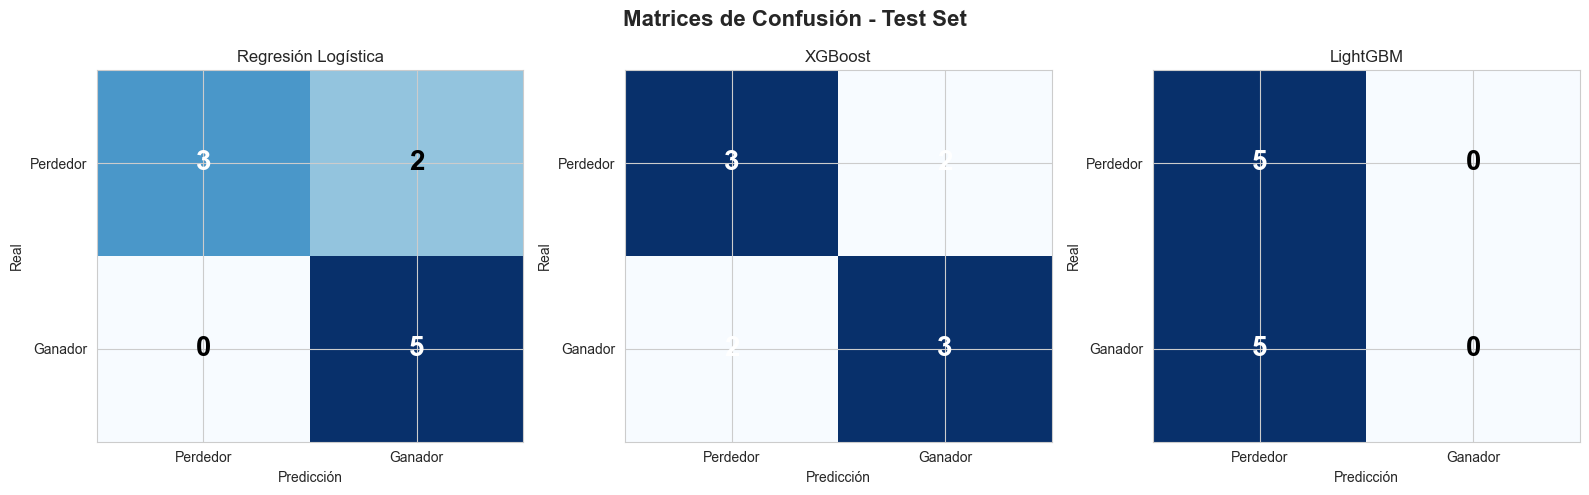

In [105]:
# Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Matrices de Confusión - Test Set', fontsize=16, fontweight='bold')

modelos_conf = [
    ('Regresión Logística', y_pred_lr_eq),
    ('XGBoost', y_pred_xgb_eq),
    ('LightGBM', y_pred_lgb_eq)
]

for idx, (nombre, y_pred) in enumerate(modelos_conf):
    cm = confusion_matrix(y_test_eq, y_pred)
    
    im = axes[idx].imshow(cm, cmap='Blues', aspect='auto')
    axes[idx].set_title(nombre)
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_yticks([0, 1])
    axes[idx].set_xticklabels(['Perdedor', 'Ganador'])
    axes[idx].set_yticklabels(['Perdedor', 'Ganador'])
    
    # Agregar valores
    for i in range(2):
        for j in range(2):
            text = axes[idx].text(j, i, cm[i, j], ha="center", va="center", 
                                 color="white" if cm[i, j] > cm.max()/2 else "black",
                                 fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

## Conclusiones del Modelado

### Resultados Finales:

**🏆 Mejor Modelo: Regresión Logística**
- **Test AUC: 0.80**
- **Test Accuracy: 0.80**
- **CV AUC: 0.42 (±0.19)**

### Análisis por Modelo:

**1. Regresión Logística:**
- ✅ Mejor desempeño en test set (AUC = 0.80)
- ✅ Alta precisión para clase 0 (perdedores): 100%
- ✅ Excelente recall para clase 1 (ganadores): 100%
- ⚠️ Baja estabilidad en CV (alta desviación estándar)

**2. XGBoost:**
- Desempeño moderado (AUC = 0.56)
- Balanced accuracy: 60% en ambas clases
- Performance más consistente en CV

**3. LightGBM:**
- Desempeño más bajo (AUC = 0.50, equivalente a random)
- Predice solo clase 0 (todos perdedores)
- Overfitting o falta de capacidad de generalización

### Observaciones Importantes:

**⚠️ Dataset Pequeño:**
- Solo 40 equipos válidos (30 train, 10 test)
- Alta variabilidad en cross-validation
- Resultados pueden variar significativamente

**📊 Características del Problema:**
- Dataset balanceado (50/50)
- 37 features (29 numéricas + 8 categóricas)
- Complejidad alta relativa al tamaño de muestra

**🎯 Recomendaciones:**
1. Recolectar más datos para mejorar estabilidad
2. Considerar feature selection para reducir dimensionalidad
3. Regresión Logística es la mejor opción actual por su simplicidad y desempeño
4. Evaluar con más datos antes de deployment